### NEW CODE - loop over each discipline available

In [31]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Project root = parent directory of notebooks/
PROJECT_ROOT = Path().resolve().parent

# Data directories
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

end_year = 2025

In [ ]:
# Load the combined cleaned file generated by 01_cleaning.ipynb
df = pd.read_csv(DATA_PROCESSED / "all_events_results_clean.csv", parse_dates=["date"])

# Normalize measure just in case
df["measure"] = df["measure"].astype(str).str.strip()

# Ensure time_seconds is numeric (only meaningful for Time events)
df["time_seconds"] = pd.to_numeric(df["time_seconds"], errors="coerce")

# Parse mark (for jumps): usually stored in time_raw in your dataset
# (If your jumps use another column like 'mark_raw', replace 'time_raw' below.)
mark_numeric = (
    df["time_raw"]
      .astype(str)
      .str.strip()
      # keep digits, dot, minus (just in case), drop units like "m"
      .str.replace(r"[^0-9\.\-]", "", regex=True)
)
df["mark_value"] = pd.to_numeric(mark_numeric, errors="coerce")

# Unified performance value (what you should use downstream)
df["performance_value"] = np.where(
    df["measure"].str.lower() == "time",
    df["time_seconds"],
    df["mark_value"],
)

# Direction: for plotting/records it helps to know whether lower or higher is better
df["better_is"] = np.where(df["measure"].str.lower() == "time", "lower", "higher")
display(df['event'].nunique())
# Drop unusable rows (keep both Time + Mark disciplines)
df = df.dropna(subset=["performance_value", "sex", "date"])
display(df['event'].nunique())
df.head()



36

36

36

36

32

event  sex measure           athlete nationality       date    time_raw  \
0  10000m  men    time    William Howitt         GBR 1847-04-05  32:35.0[a]   
1  10000m  men    time     Walter George         GBR 1882-03-25  32:09.0[b]   
2  10000m  men    time     Walter George         GBR 1884-04-07  31:53.4[b]   
3  10000m  men    time     Walter George         GBR 1884-07-28  31:40.0[b]   
4  10000m  men    time  William Cummings         GBR 1885-09-28     31:23.1   

   time_seconds mark_raw  mark_meters  wind auto_raw category subcategory  \
0        1955.0      NaN          NaN   NaN      NaN      run        long   
1        1929.0      NaN          NaN   NaN      NaN      run        long   
2        1913.4      NaN          NaN   NaN      NaN      run        long   
3        1900.0      NaN          NaN   NaN      NaN      run        long   
4        1883.1      NaN          NaN   NaN      NaN      run        long   

   mark_value  performance_value better_is  
0      3235.0             1955.0     lower  
1      3209.0             1929.0     lower  
2      3153.4             1913.4     lower  
3      3140.0             1900.0     lower  
4      3123.1             1883.1     lower

In [38]:
df['event'].nunique(), df['event'].unique()

(32,
 array(['10000m', '100m', '1500m', '200m', '3000m', '400m',
        '4x100m_relays', '4x400m_relays', '5000m', '800m', 'half_marathon',
        'marathon', 'swimming_backstroke_100m', 'swimming_backstroke_200m',
        'swimming_backstroke_50m', 'swimming_breaststroke_100m',
        'swimming_breaststroke_200m', 'swimming_breaststroke_50m',
        'swimming_butterfly_100m', 'swimming_butterfly_200m',
        'swimming_butterfly_50m', 'swimming_freestyle_100m',
        'swimming_freestyle_1500m', 'swimming_freestyle_200m',
        'swimming_freestyle_400m', 'swimming_freestyle_50m',
        'swimming_freestyle_800m', 'swimming_freestyle_relay_4x100m',
        'swimming_freestyle_relay_4x200m', 'swimming_medley_200m',
        'swimming_medley_400m', 'swimming_medley_relay_4x100m'],
       dtype=object))

Events found: ['10000m', '100m', '1500m', '200m', '3000m', '400m', '4x100m_relays', '4x400m_relays', '5000m', '800m', 'half_marathon', 'marathon', 'swimming_backstroke_100m', 'swimming_backstroke_200m', 'swimming_backstroke_50m', 'swimming_breaststroke_100m', 'swimming_breaststroke_200m', 'swimming_breaststroke_50m', 'swimming_butterfly_100m', 'swimming_butterfly_200m', 'swimming_butterfly_50m', 'swimming_freestyle_100m', 'swimming_freestyle_1500m', 'swimming_freestyle_200m', 'swimming_freestyle_400m', 'swimming_freestyle_50m', 'swimming_freestyle_800m', 'swimming_freestyle_relay_4x100m', 'swimming_freestyle_relay_4x200m', 'swimming_medley_200m', 'swimming_medley_400m', 'swimming_medley_relay_4x100m']

===== Event: 10000m | Sexes: ['men', 'women'] | measure=time =====



===== Event: 100m | Sexes: ['men', 'women'] | measure=time =====


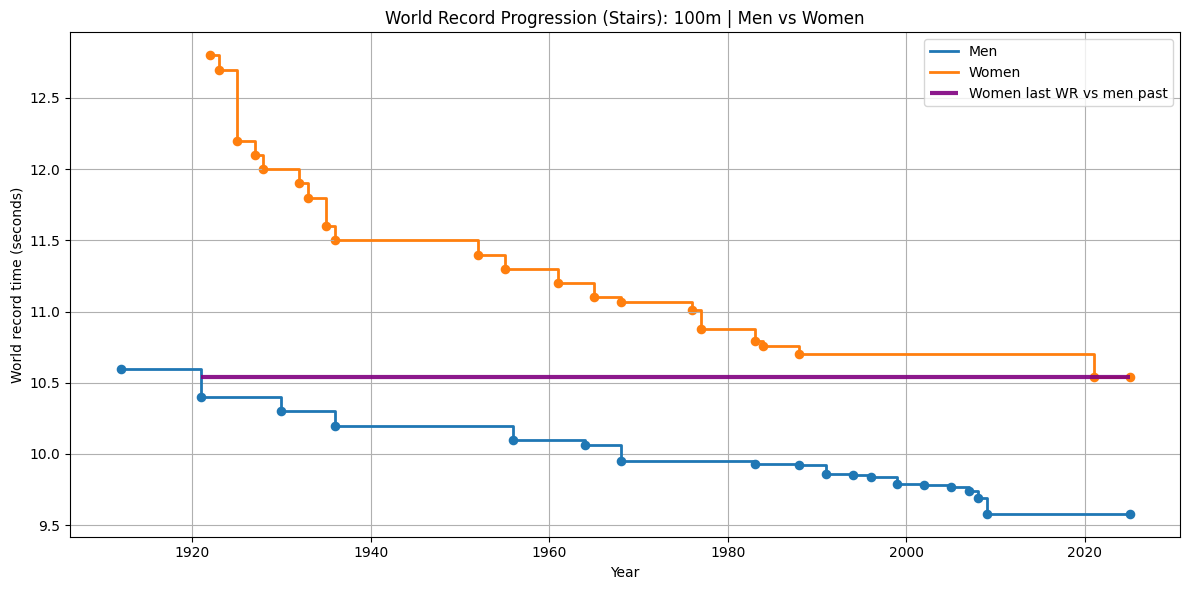


===== Event: 1500m | Sexes: ['men', 'women'] | measure=time =====



===== Event: 200m | Sexes: ['men', 'women'] | measure=time =====


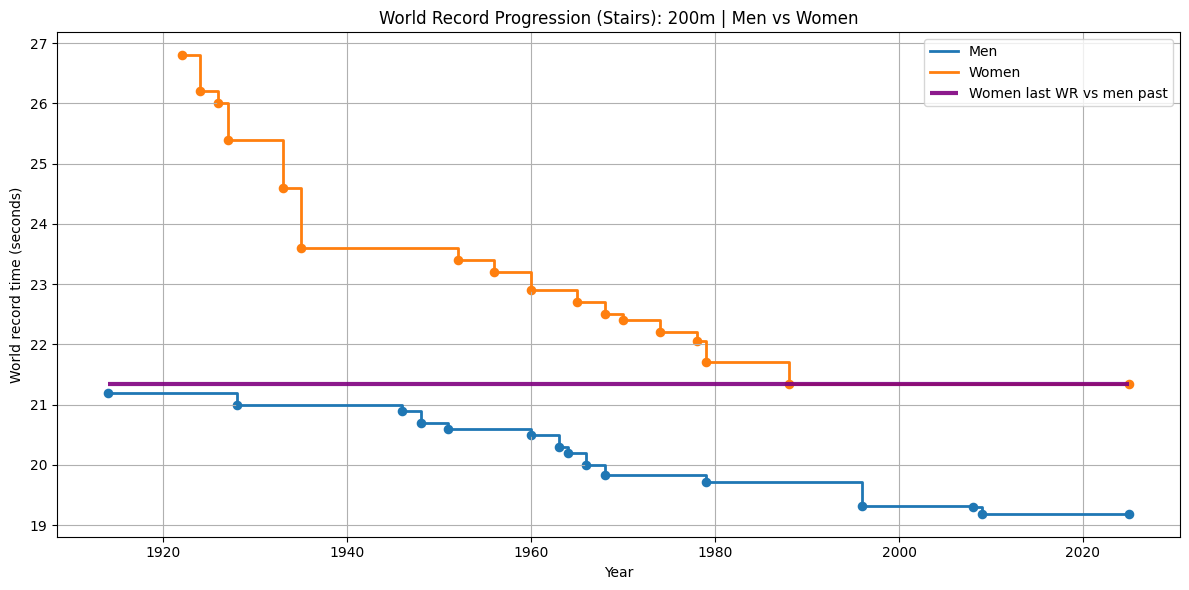


===== Event: 3000m | Sexes: ['men', 'women'] | measure=time =====


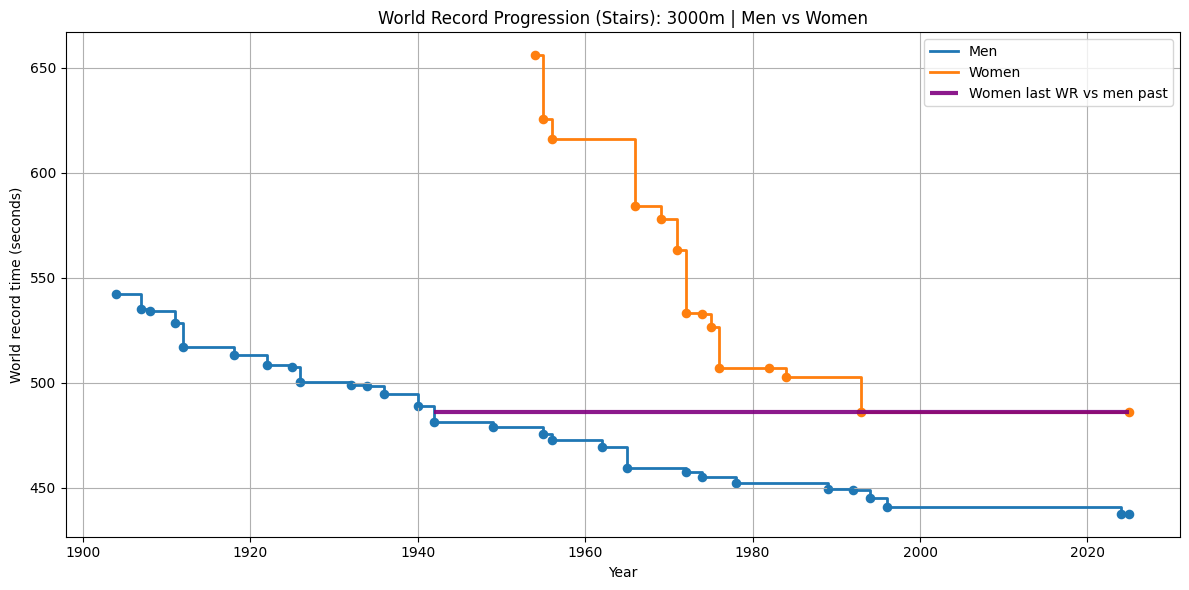


===== Event: 400m | Sexes: ['men', 'women'] | measure=time =====


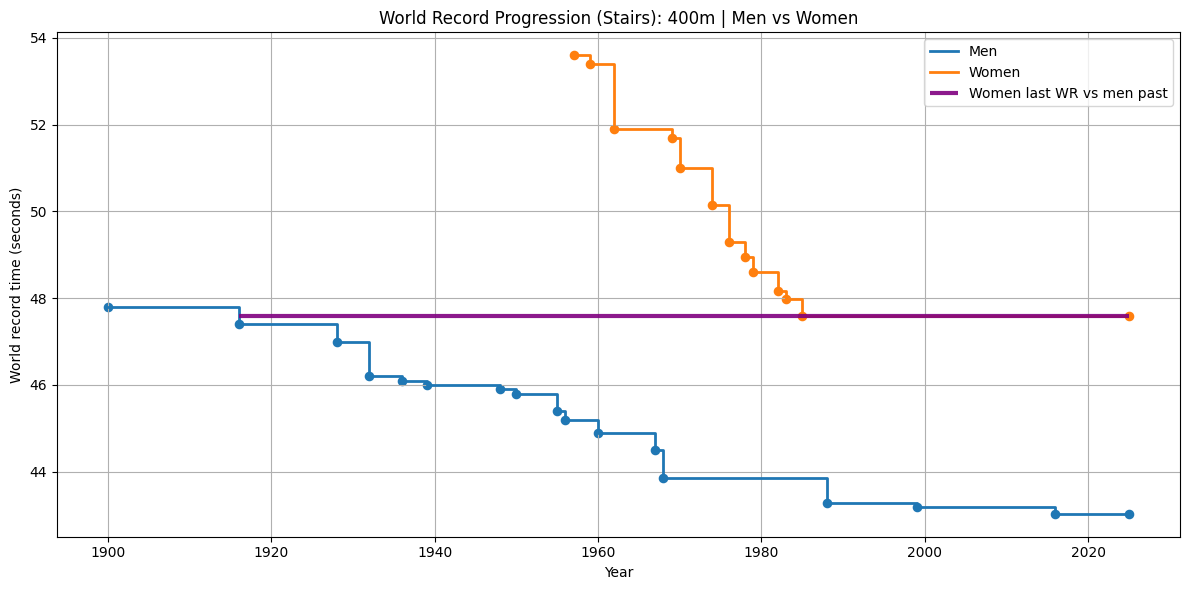


===== Event: 4x100m_relays | Sexes: ['men', 'women'] | measure=time =====


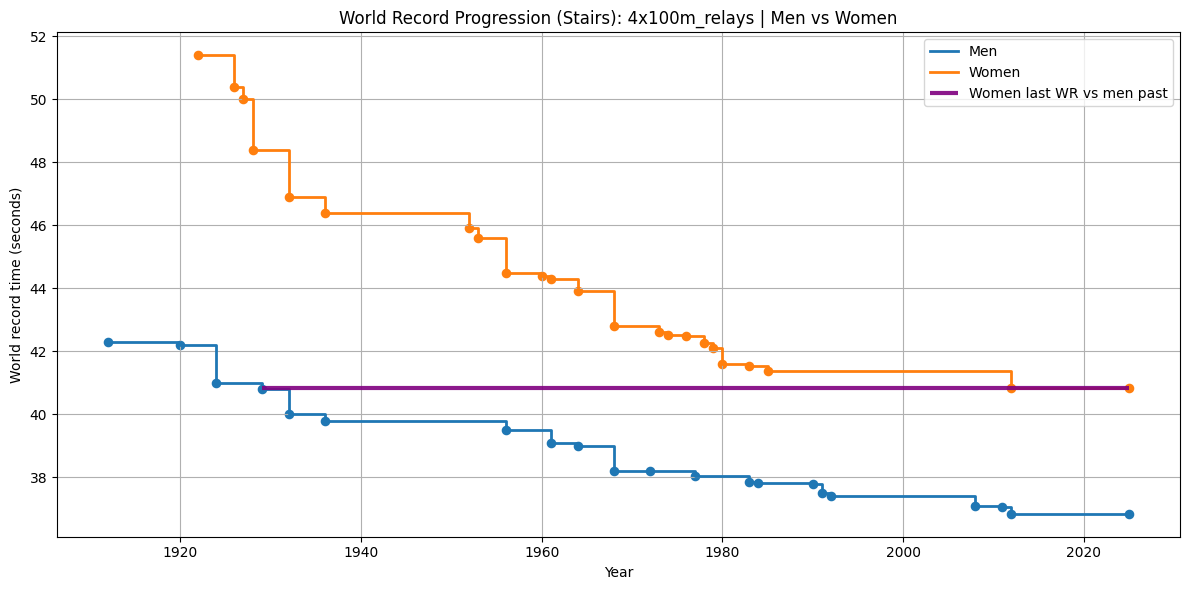


===== Event: 4x400m_relays | Sexes: ['men', 'women'] | measure=time =====


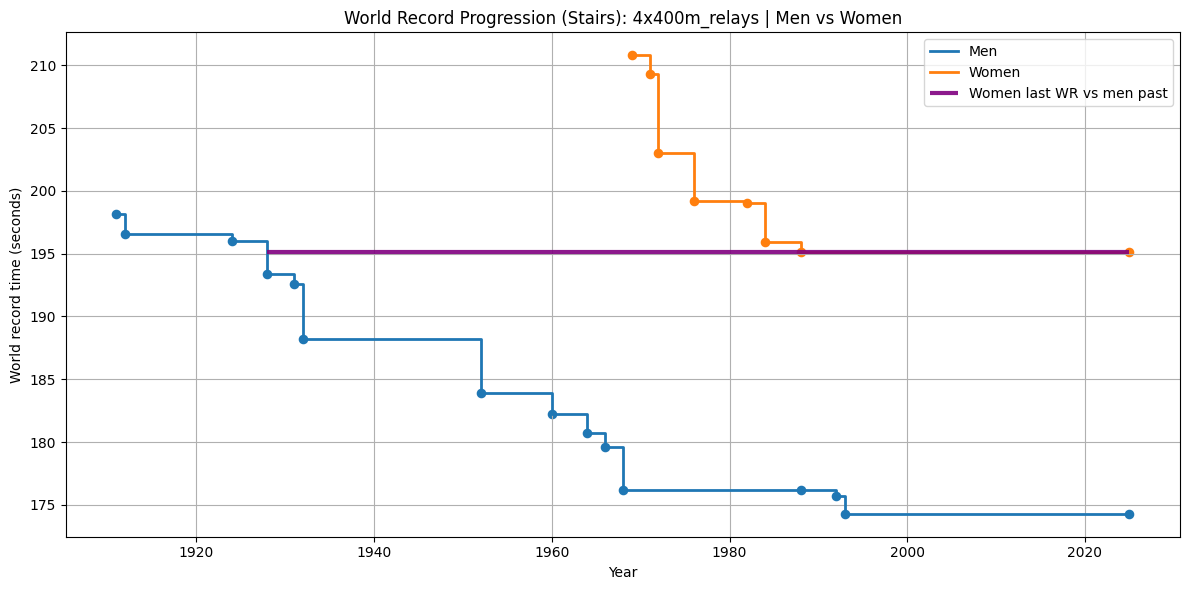


===== Event: 5000m | Sexes: ['men', 'women'] | measure=time =====



===== Event: 800m | Sexes: ['men', 'women'] | measure=time =====


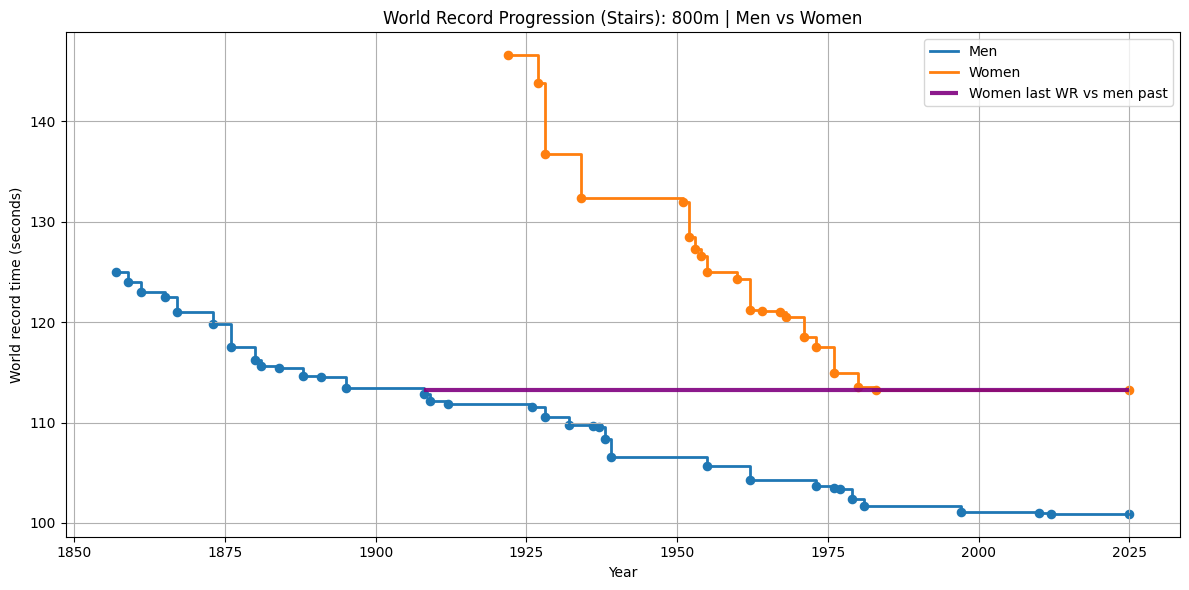


===== Event: half_marathon | Sexes: ['men', 'women'] | measure=time =====



===== Event: marathon | Sexes: ['men', 'women'] | measure=time =====


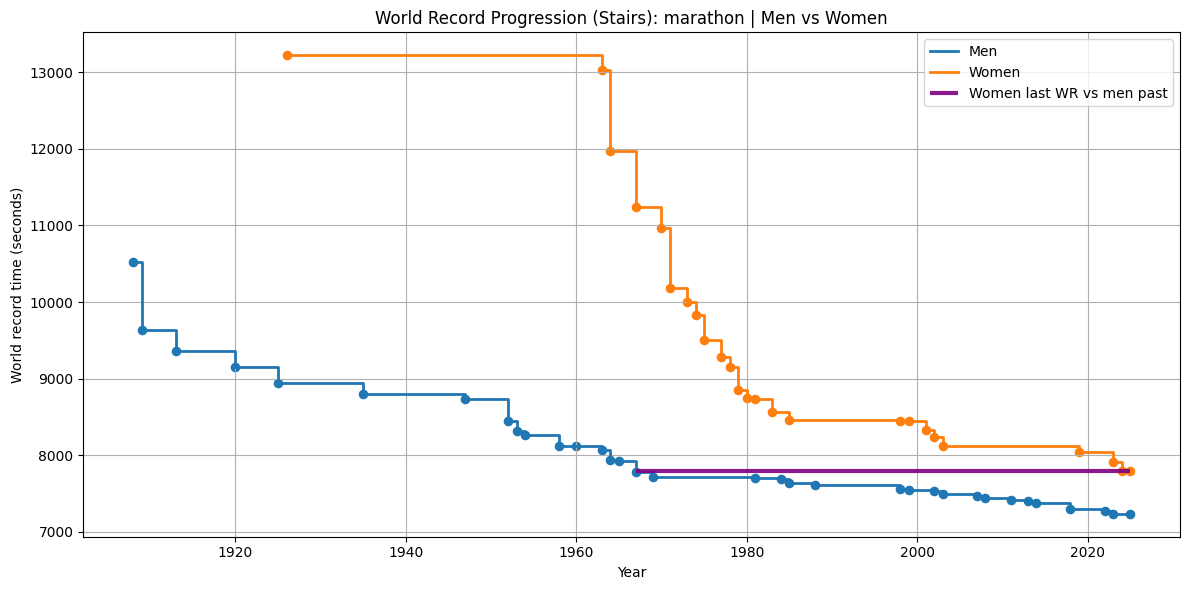


===== Event: swimming_backstroke_100m | Sexes: ['men', 'women'] | measure=time =====


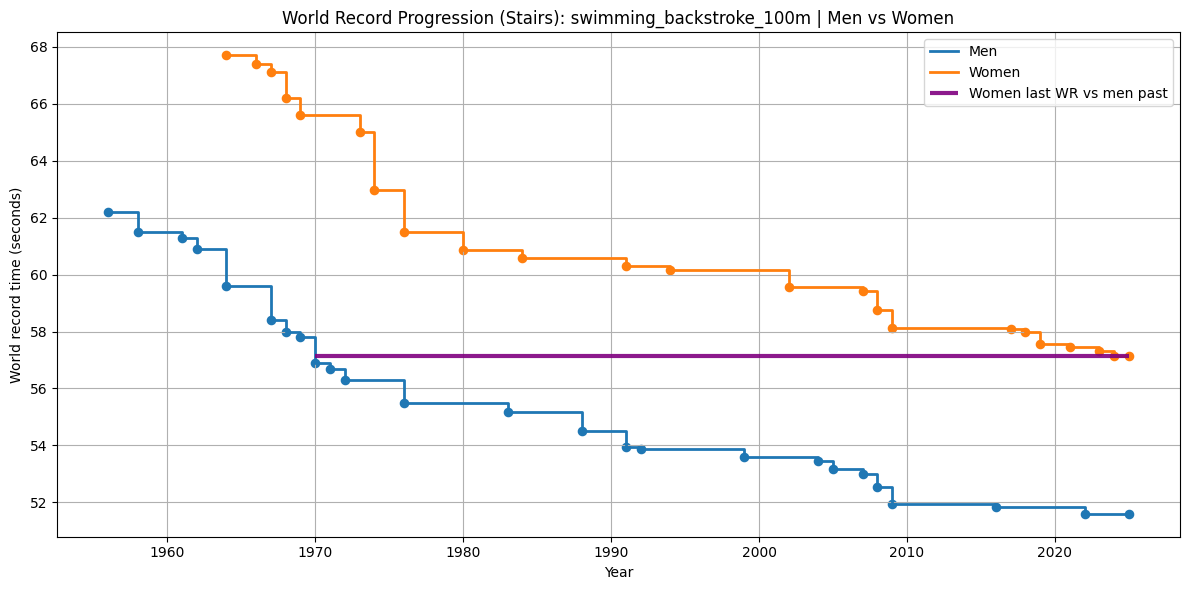


===== Event: swimming_backstroke_200m | Sexes: ['men', 'women'] | measure=time =====


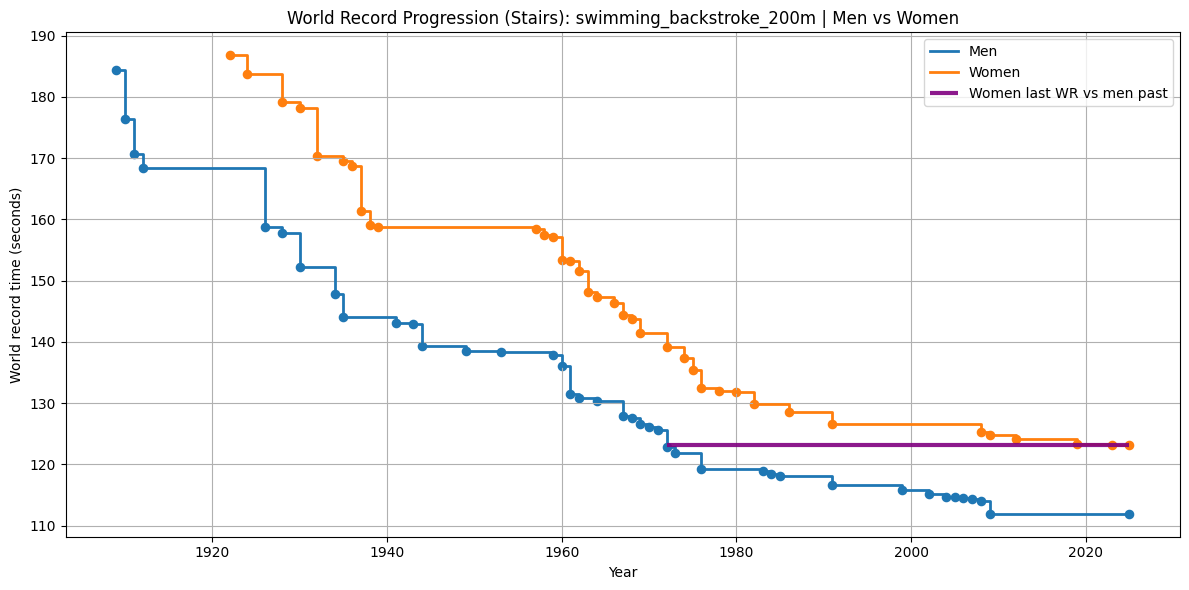


===== Event: swimming_backstroke_50m | Sexes: ['men', 'women'] | measure=time =====


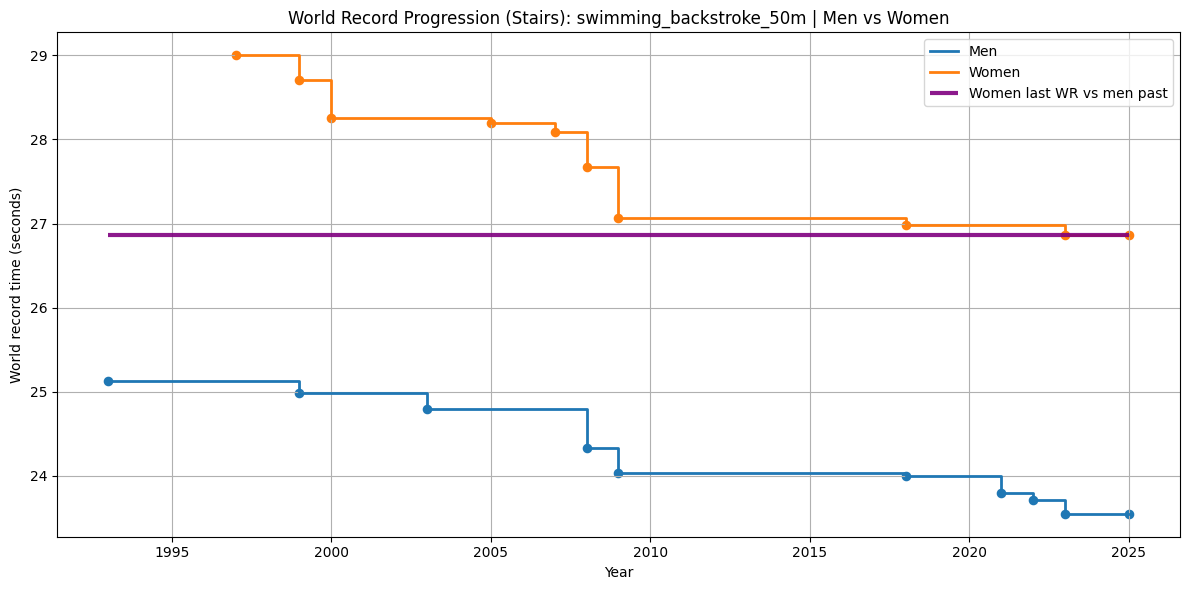


===== Event: swimming_breaststroke_100m | Sexes: ['men', 'women'] | measure=time =====


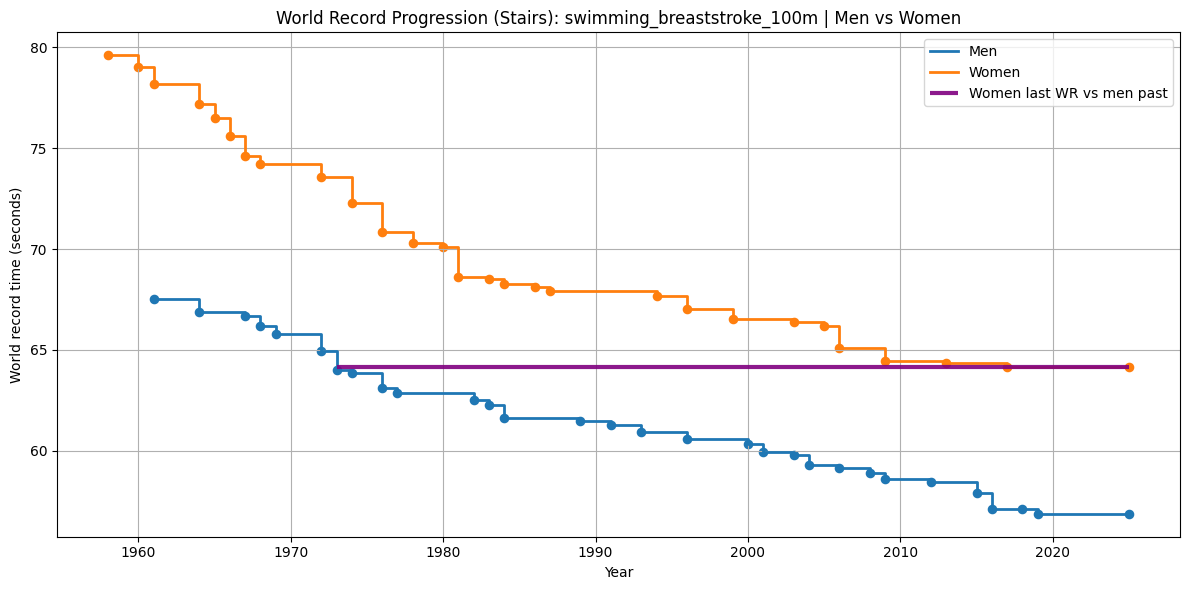


===== Event: swimming_breaststroke_200m | Sexes: ['men', 'women'] | measure=time =====



===== Event: swimming_breaststroke_50m | Sexes: ['men', 'women'] | measure=time =====



===== Event: swimming_butterfly_100m | Sexes: ['men', 'women'] | measure=time =====


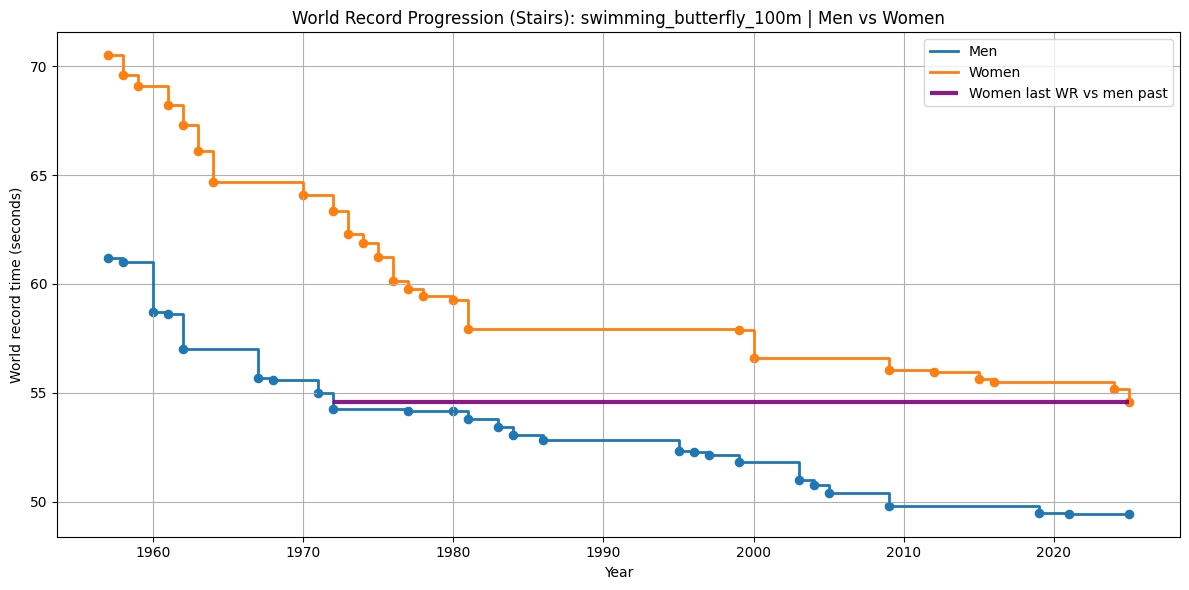


===== Event: swimming_butterfly_200m | Sexes: ['men', 'women'] | measure=time =====


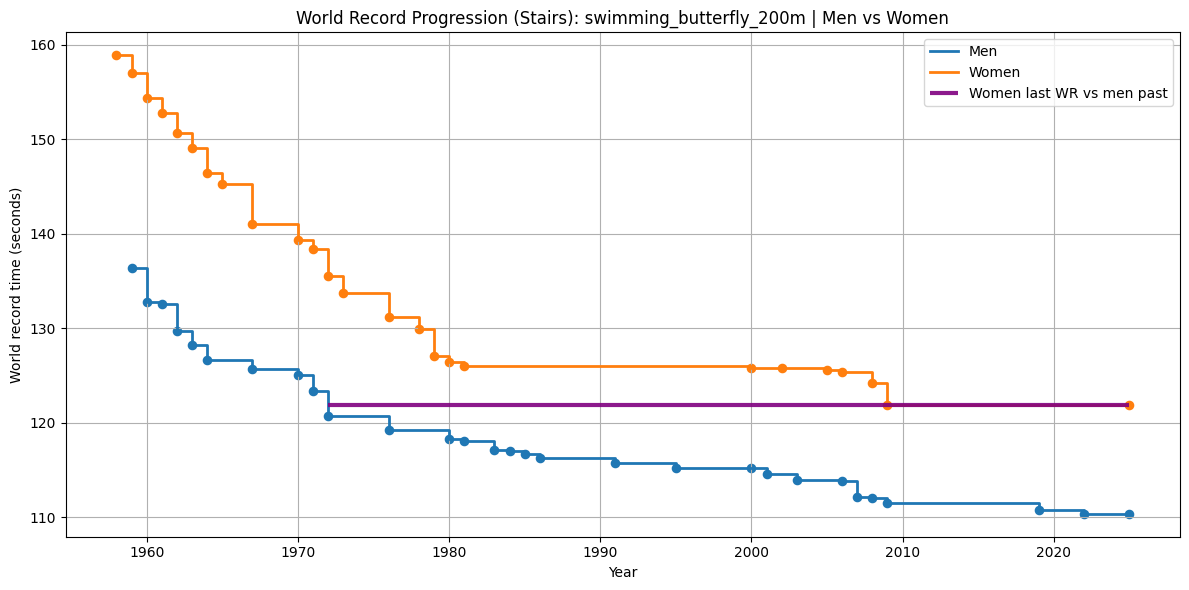


===== Event: swimming_butterfly_50m | Sexes: ['men', 'women'] | measure=time =====


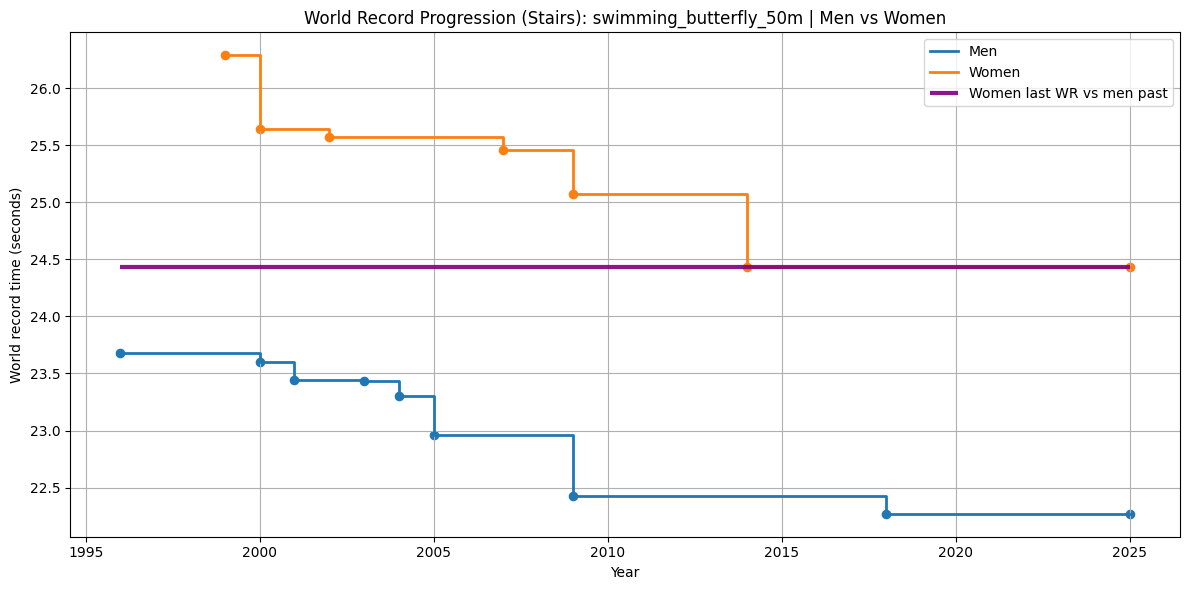


===== Event: swimming_freestyle_100m | Sexes: ['men', 'women'] | measure=time =====



===== Event: swimming_freestyle_1500m | Sexes: ['men', 'women'] | measure=time =====


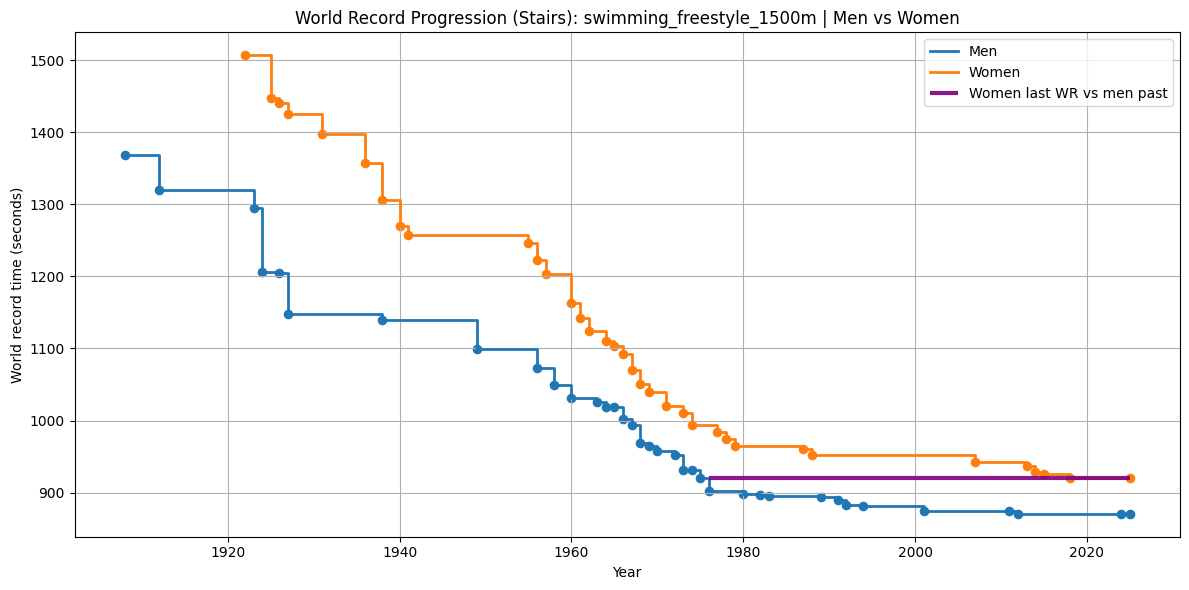


===== Event: swimming_freestyle_200m | Sexes: ['men', 'women'] | measure=time =====


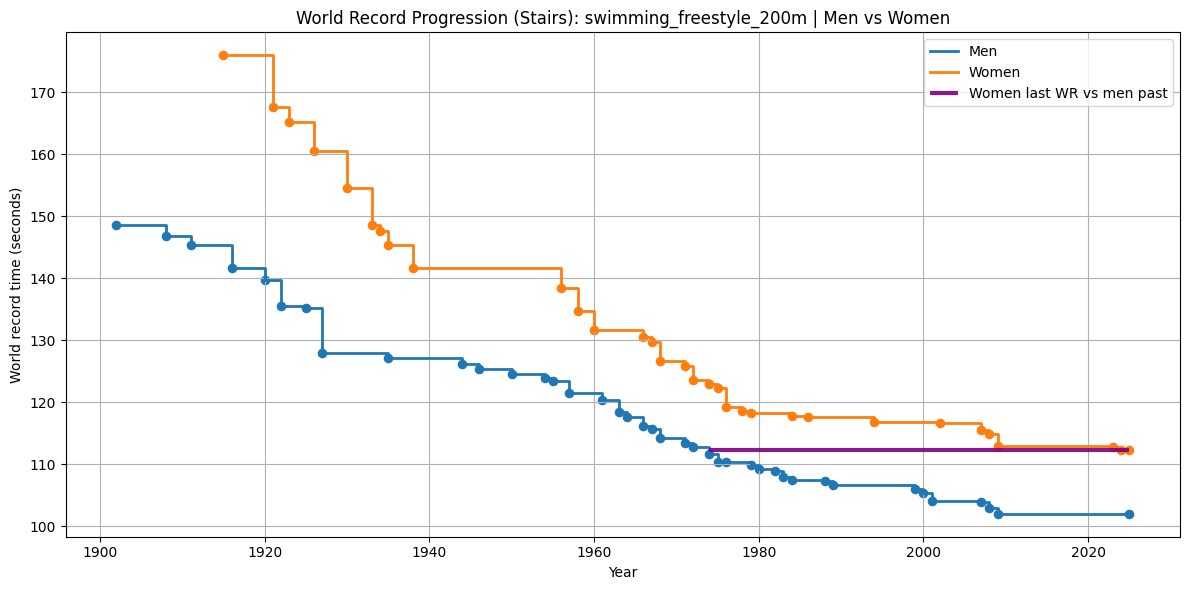


===== Event: swimming_freestyle_400m | Sexes: ['men', 'women'] | measure=time =====



===== Event: swimming_freestyle_50m | Sexes: ['men', 'women'] | measure=time =====



===== Event: swimming_freestyle_800m | Sexes: ['men', 'women'] | measure=time =====


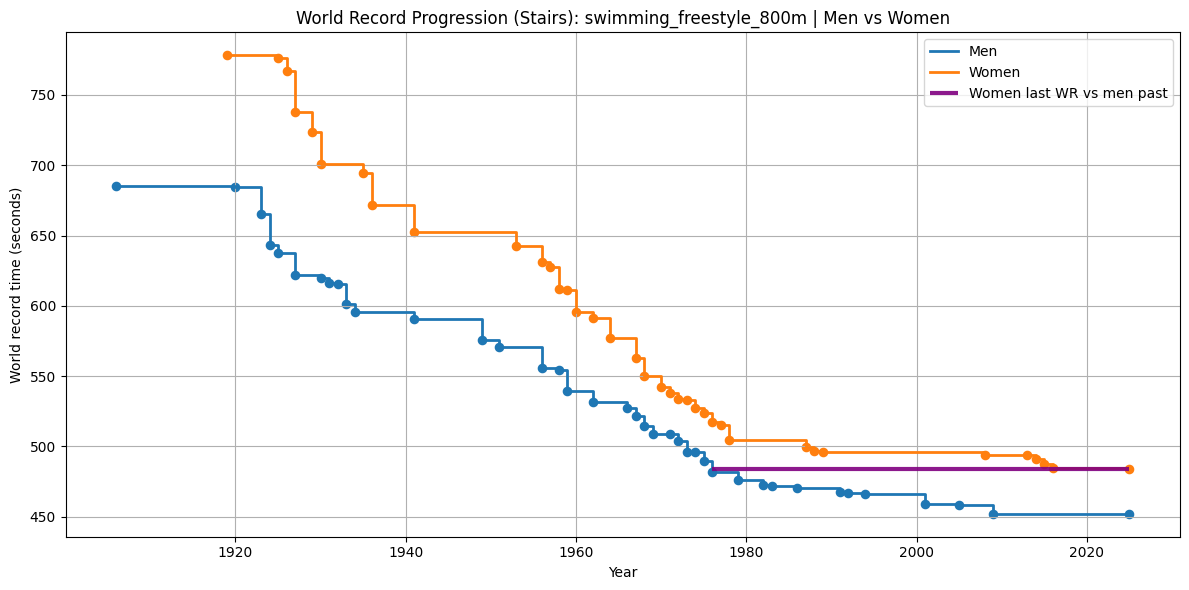


===== Event: swimming_freestyle_relay_4x100m | Sexes: ['men', 'women'] | measure=time =====


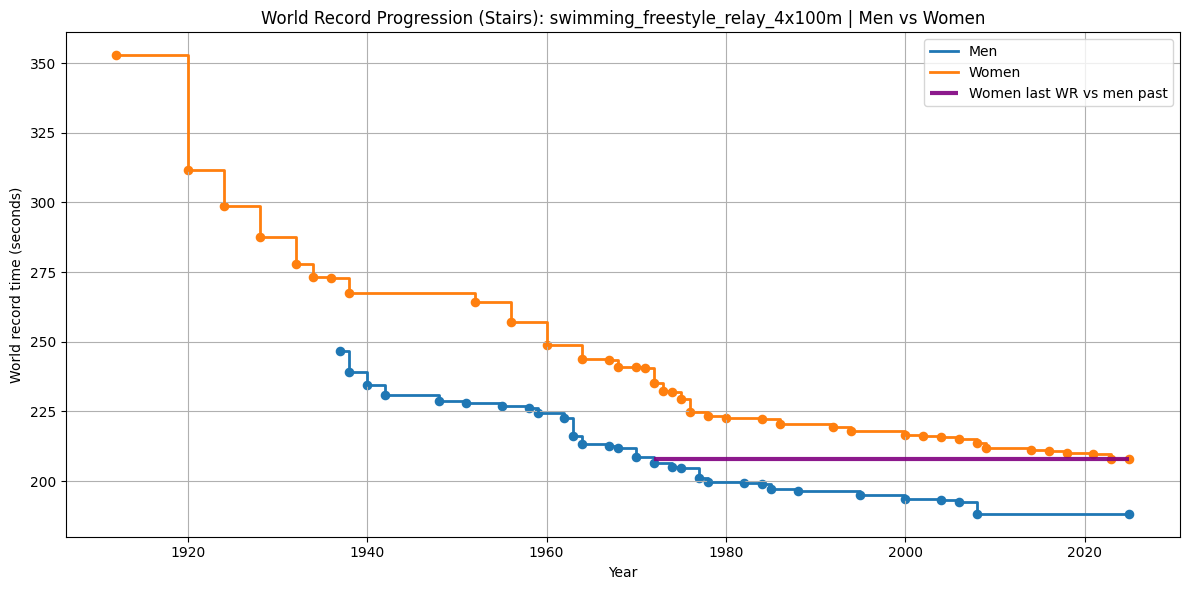


===== Event: swimming_freestyle_relay_4x200m | Sexes: ['men', 'women'] | measure=time =====


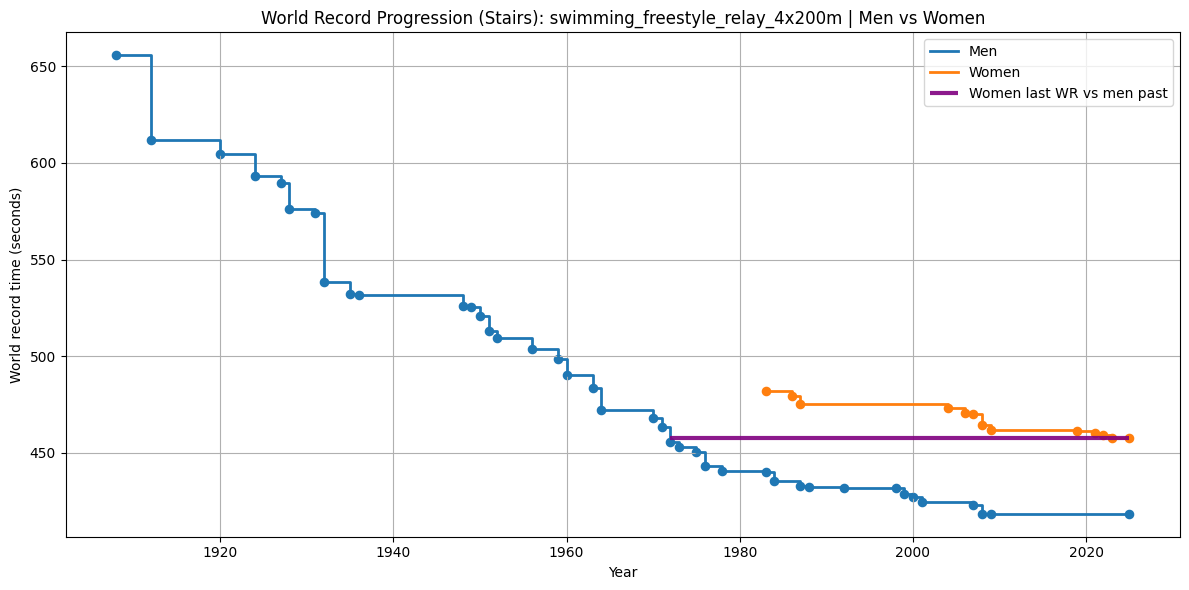


===== Event: swimming_medley_200m | Sexes: ['men', 'women'] | measure=time =====


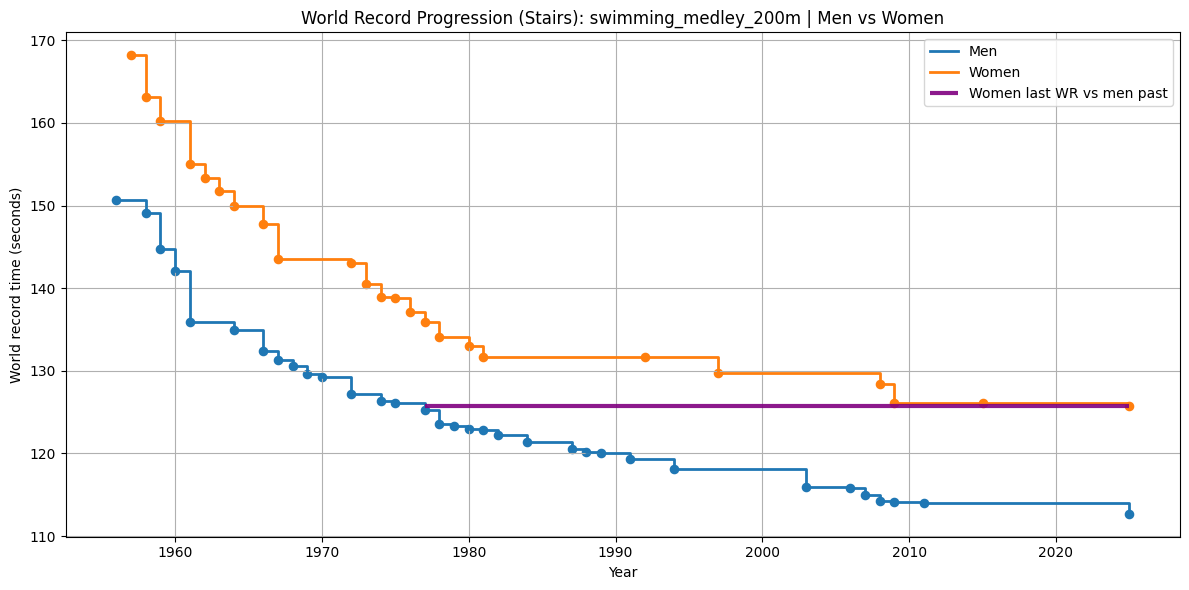


===== Event: swimming_medley_400m | Sexes: ['men', 'women'] | measure=time =====


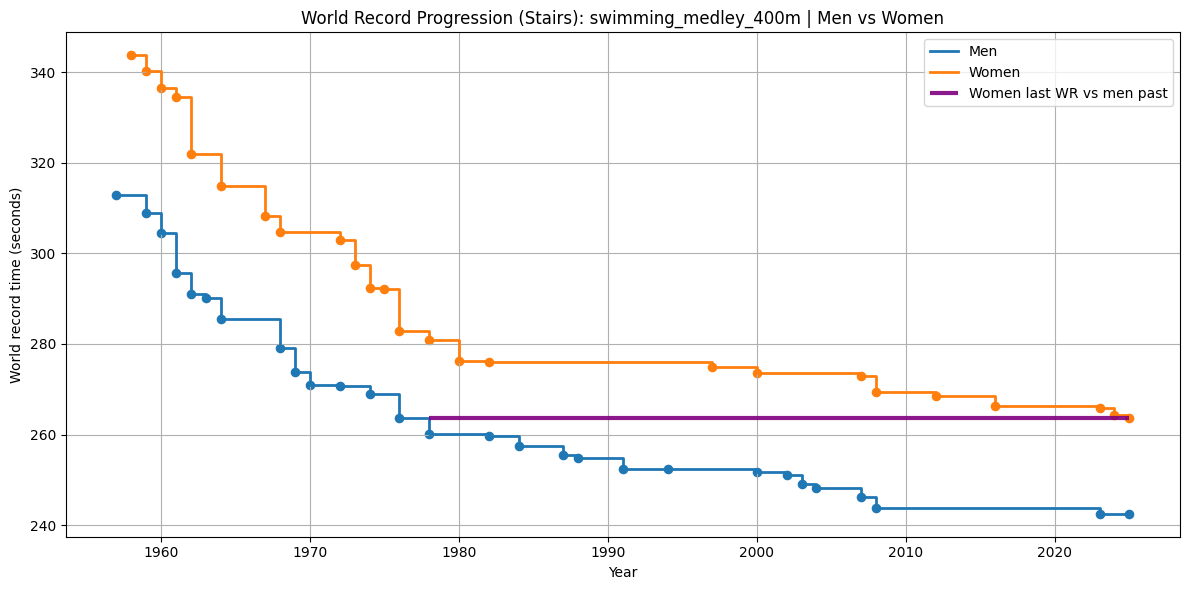


===== Event: swimming_medley_relay_4x100m | Sexes: ['men', 'women'] | measure=time =====


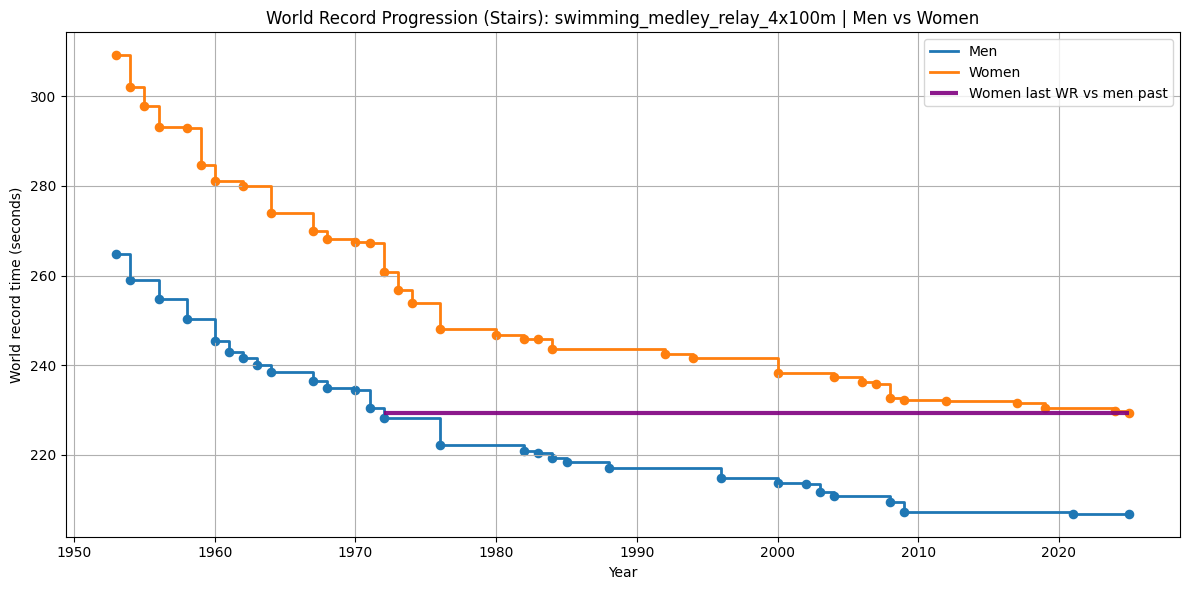

In [37]:
# Function to prepare yearly best times for a given event
def prepare_yearly_best(df_event: pd.DataFrame) -> pd.DataFrame:
    d = df_event.copy()
    d["year"] = d["date"].dt.year
    d["measure"] = d["measure"].astype(str).str.strip().str.lower()

    is_time = d["measure"].eq("time")
    is_mark = d["measure"].eq("mark")

    best_time = (
        d[is_time]
        .groupby(["event", "sex", "year", "measure"], as_index=False)["performance_value"]
        .min()
    )
    best_mark = (
        d[is_mark]
        .groupby(["event", "sex", "year", "measure"], as_index=False)["performance_value"]
        .max()
    )

    yearly_best = pd.concat([best_time, best_mark], ignore_index=True)
    yearly_best = yearly_best.sort_values(["sex", "year"]).reset_index(drop=True)
    yearly_best = yearly_best.rename(columns={"performance_value": "best_value"})

    return yearly_best



def _to_world_record_stairs(group: pd.DataFrame, end_year: int) -> pd.DataFrame:
    """
    Compute world record progression (stairs) for a single sex.
    - For Time: cumulative min (lower is better)
    - For Mark: cumulative max (higher is better)
    Extends the last record to end_year.
    """
    g = group.sort_values("year").copy()

    # Determine measure for this group (should be constant within an event)
    measure = str(g["measure"].iloc[0]).lower()

    if measure == "time":
        g["wr_value"] = g["best_value"].cummin()
        improved = g["wr_value"].diff().fillna(-1) < 0
    else:  # "mark"
        g["wr_value"] = g["best_value"].cummax()
        improved = g["wr_value"].diff().fillna(1) > 0

    wr = g.loc[improved, ["year", "wr_value"]].copy()

    # Extend last step to end_year
    last_year = int(wr["year"].iloc[-1])
    last_val = float(wr["wr_value"].iloc[-1])

    if last_year < end_year:
        wr = pd.concat(
            [wr, pd.DataFrame({"year": [end_year], "wr_value": [last_val]})],
            ignore_index=True,
        )

    return wr


def plot_event_progression(df_all: pd.DataFrame, event_name: str, end_year: int = 2025):
    df_event = df_all[df_all["event"] == event_name].copy()
    if df_event.empty:
        print(f"No data for event '{event_name}', skipping.")
        return

    yearly_best = prepare_yearly_best(df_event)
    if yearly_best.empty:
        print(f"No valid yearly best data for '{event_name}', skipping.")
        return

    measure = str(yearly_best["measure"].iloc[0]).lower()
    ylab = "World record time (seconds)" if measure == "time" else "World record mark"

    sexes_present = sorted(yearly_best["sex"].unique())
    print(f"\n===== Event: {event_name} | Sexes: {sexes_present} | measure={measure} =====")

    plt.figure(figsize=(12, 6))

    wr_by_sex = {}
    for sex, group in yearly_best.groupby("sex"):
        wr = _to_world_record_stairs(group, end_year)
        wr_by_sex[sex] = wr

        plt.step(
            wr["year"],
            wr["wr_value"],
            where="post",
            label=sex.capitalize(),
            linewidth=2,
        )
        plt.scatter(wr["year"], wr["wr_value"], s=35)

    # Purple line only makes sense when both sexes are present
    if ("women" in wr_by_sex) and ("men" in wr_by_sex):
        w_wr = wr_by_sex["women"]
        m_wr = wr_by_sex["men"]

        w_last_year = int(w_wr["year"].iloc[-1])
        w_last_val = float(w_wr["wr_value"].iloc[-1])

        m_years = m_wr["year"].to_numpy()
        m_vals = m_wr["wr_value"].to_numpy()

        # For time: women surpass men past if women_time <= men_time
        # For mark: women surpass men past if women_mark >= men_mark
        if measure == "time":
            idx = np.where(m_vals <= w_last_val)[0]
        else:
            idx = np.where(m_vals >= w_last_val)[0]

        x_left = int(m_years[0]) if len(idx) == 0 else int(m_years[idx[0]])

        plt.hlines(
            y=w_last_val,
            xmin=min(x_left, w_last_year),
            xmax=max(x_left, w_last_year),
            colors="purple",
            linewidth=3,
            label="Women last WR vs men past",
            alpha=0.9,
        )

    plt.title(f"World Record Progression (Stairs): {event_name} | Men vs Women")
    plt.xlabel("Year")
    plt.ylabel(ylab)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Loop over all unique events and plot
events = sorted(df["event"].unique())
print("Events found:", events)

for ev in events:
    plot_event_progression(df, ev, end_year=2025)

In [11]:
# Plotting function
def plot_event_progression(df_all: pd.DataFrame, event_name: str, end_year: int = 2025):
    """
    Produce all plots for a given event:
    - yearly best progressions
    - LOESS smoothing
    - men–women gap (absolute and %), if both sexes present
    - regression slopes (yearly best and ffilled)
    """
    df_event = df_all[df_all["event"] == event_name].copy()
    if df_event.empty:
        print(f"No data for event '{event_name}', skipping.")
        return
    
    # Prepare yearly best
    yearly_best = prepare_yearly_best(df_event)
    
    # If less than 2 points, skip
    if yearly_best.empty:
        print(f"No valid yearly best data for '{event_name}', skipping.")
        return
    
    sexes_present = sorted(yearly_best["sex"].unique())
    print(f"\n===== Event: {event_name} | Sexes: {sexes_present} =====")
    
    # ---------- 1) Yearly best progression ----------
    plt.figure(figsize=(12, 6))
    for sex, group in yearly_best.groupby("sex"):
        plt.plot(group["year"], group["time_seconds"], marker="o", label=sex.capitalize())
    
    plt.title(f"Progression of {event_name} Performance: Men vs Women")
    plt.xlabel("Year")
    plt.ylabel("Best time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # # ---------- 2) LOESS smoothing ----------
    # plt.figure(figsize=(12, 6))
    
    # for sex, group in yearly_best.groupby("sex"):
    #     group = group.sort_values("year")
        
    #     # Raw points
    #     plt.scatter(group["year"], group["time_seconds"],
    #                 alpha=0.4, label=f"{sex.capitalize()} (raw)")
        
    #     # LOESS smoothing (only if enough points)
    #     if len(group) >= 5:
    #         smoothed = lowess(
    #             endog=group["time_seconds"],
    #             exog=group["year"],
    #             frac=0.3  # smoothing parameter
    #         )
    #         plt.plot(smoothed[:, 0], smoothed[:, 1],
    #                  linewidth=2, label=f"{sex.capitalize()} (LOESS)")
    
    # plt.title(f"{event_name} Performance Progression (LOESS smoothing)")
    # plt.xlabel("Year")
    # plt.ylabel("Best time (seconds)")
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()
    
    # ---------- 3) Forward-filled yearly series ----------
    start_year = int(yearly_best["year"].min())
    years = pd.Index(range(start_year, end_year + 1), name="year")
    
    pivot = (
        yearly_best
        .pivot(index="year", columns="sex", values="time_seconds")
        .reindex(years)
        .sort_index()
    )
    
    pivot = pivot.ffill()
    display(pivot.head())
    
    # # Only compute gaps if both men & women present
    # if not {"men", "women"}.issubset(pivot.columns):
    #     print(f"Only one sex present for '{event_name}' – skipping gap plots.")
    # else:
    #     # ---------- 4) Difference curve: men – women (seconds) ----------
    #     gap_df = pivot.copy()
    #     gap_df["gap_seconds"] = gap_df["men"] - gap_df["women"]
        
    #     plt.figure(figsize=(12, 5))
    #     plt.plot(gap_df.index, gap_df["gap_seconds"], marker="o")
    #     plt.axhline(0, linestyle="--")
    #     plt.title(f"Difference in {event_name} Best Times (Forward-Filled): Men – Women")
    #     plt.xlabel("Year")
    #     plt.ylabel("Gap (seconds)")
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()
        
    #     # ---------- 5) Relative gap (%): women vs men ----------
    #     gap_df["gap_pct"] = (gap_df["women"] - gap_df["men"]) / gap_df["men"] * 100
        
    #     plt.figure(figsize=(12, 5))
    #     plt.plot(gap_df.index, gap_df["gap_pct"], marker="o")
    #     plt.axhline(0, linestyle="--")
    #     plt.title(f"Relative Performance Gap (Forward-Filled): Women vs Men in {event_name}")
    #     plt.xlabel("Year")
    #     plt.ylabel("Gap (%)  (positive = women slower)")
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()
    
    # # ---------- 6) Regression slopes (yearly best) ----------
    # print("\nRegression slopes on yearly best times:")
    # plt.figure(figsize=(12, 6))
    
    # for sex, group in yearly_best.groupby("sex"):
    #     group = group.sort_values("year")
    #     x = group["year"].values
    #     y = group["time_seconds"].values
        
    #     plt.scatter(x, y, alpha=0.5, label=f"{sex.capitalize()} (yearly best)")
        
    #     if len(group) >= 2:
    #         slope, intercept = np.polyfit(x, y, 1)
    #         y_pred = slope * x + intercept
    #         plt.plot(x, y_pred, linewidth=2, label=f"{sex.capitalize()} regression")
    #         print(f"  {sex.capitalize()} slope: {slope:.4f} seconds per year")
    #     else:
    #         print(f"  {sex.capitalize()}: not enough points for regression")
    
    # plt.title(f"{event_name} Performance Progression with Linear Trendlines")
    # plt.xlabel("Year")
    # plt.ylabel("Best time (seconds)")
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()
    
    # ---------- 7) Regression slopes on forward-filled series ----------
    if {"men", "women"}.issubset(pivot.columns):
        print("\nRegression slopes on forward-filled series:")
        plt.figure(figsize=(12, 6))
        
        for sex in ["men", "women"]:
            series = pivot[sex].dropna()
            x = series.index.values
            y = series.values
            
            plt.scatter(x, y, alpha=0.5, label=f"{sex.capitalize()} (ffill yearly best)")
            
            if len(series) >= 2:
                slope, intercept = np.polyfit(x, y, 1)
                y_pred = slope * x + intercept
                plt.plot(x, y_pred, linewidth=2, label=f"{sex.capitalize()} regression")
                print(f"  {sex.capitalize()} regression slope: {slope:.5f} seconds/year")
            else:
                print(f"  {sex.capitalize()}: not enough points for regression on ffill series")
        
        plt.title(f"{event_name} Performance Progression (Regression on Forward-Filled Series)")
        plt.xlabel("Year")
        plt.ylabel("Best time (seconds)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Events found: ['10000m', '100m', '1500m', '200m', '3000m', '400m', '4x100m_relays', '4x400m_relays', '5000m', '60m_hurdles', '800m', 'half_marathon', 'marathon', 'swimming_backstroke_100m', 'swimming_backstroke_200m', 'swimming_backstroke_50m', 'swimming_breaststroke_100m', 'swimming_breaststroke_200m', 'swimming_breaststroke_50m', 'swimming_butterfly_100m', 'swimming_butterfly_200m', 'swimming_butterfly_50m', 'swimming_freestyle_100m', 'swimming_freestyle_1500m', 'swimming_freestyle_200m', 'swimming_freestyle_400m', 'swimming_freestyle_50m', 'swimming_freestyle_800m', 'swimming_freestyle_relay_4x100m', 'swimming_freestyle_relay_4x200m', 'swimming_medley_200m', 'swimming_medley_400m', 'swimming_medley_relay_4x100m']

===== Event: 10000m | Sexes: ['men', 'women'] =====


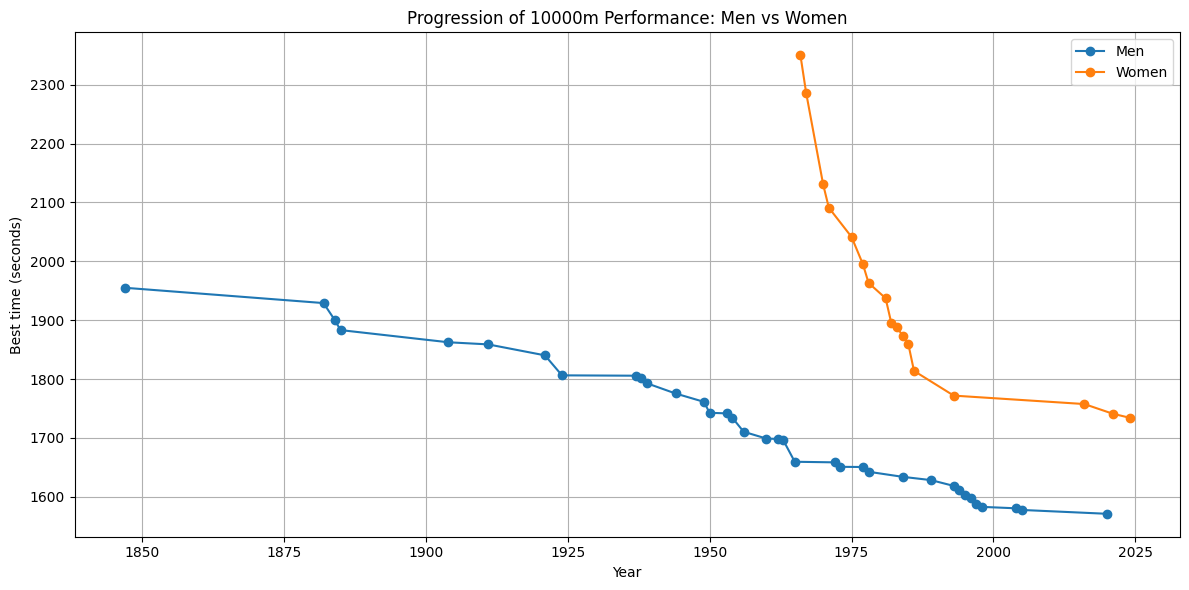

sex      men  women
year               
1847  1955.0    NaN
1848  1955.0    NaN
1849  1955.0    NaN
1850  1955.0    NaN
1851  1955.0    NaN


Regression slopes on forward-filled series:
  Men regression slope: -2.61111 seconds/year
  Women regression slope: -7.67860 seconds/year


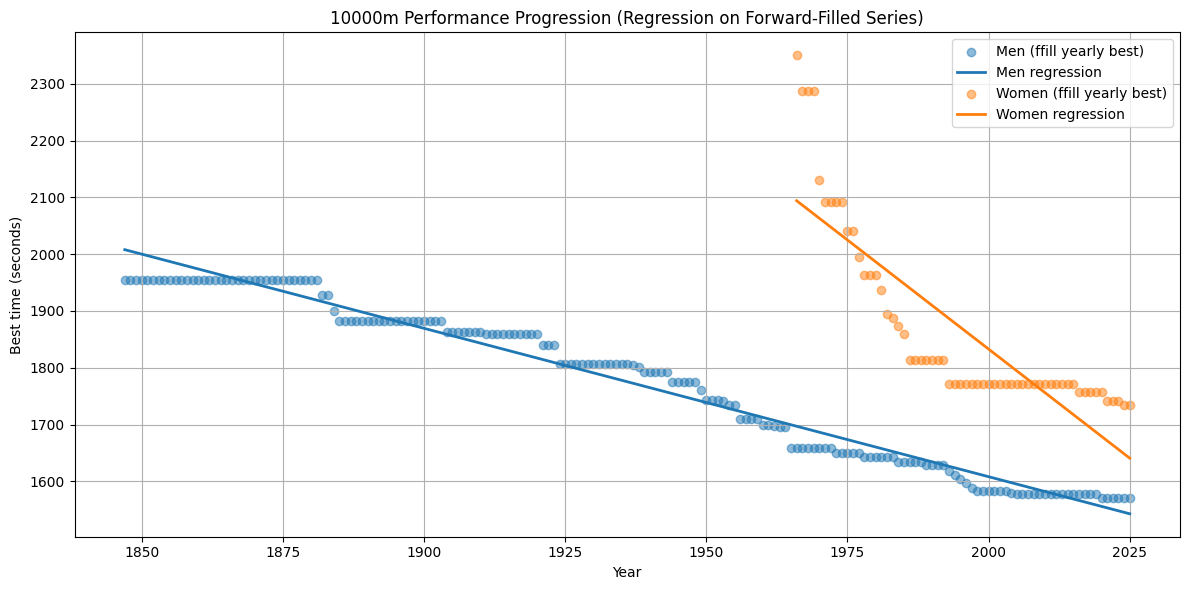


===== Event: 100m | Sexes: ['men', 'women'] =====


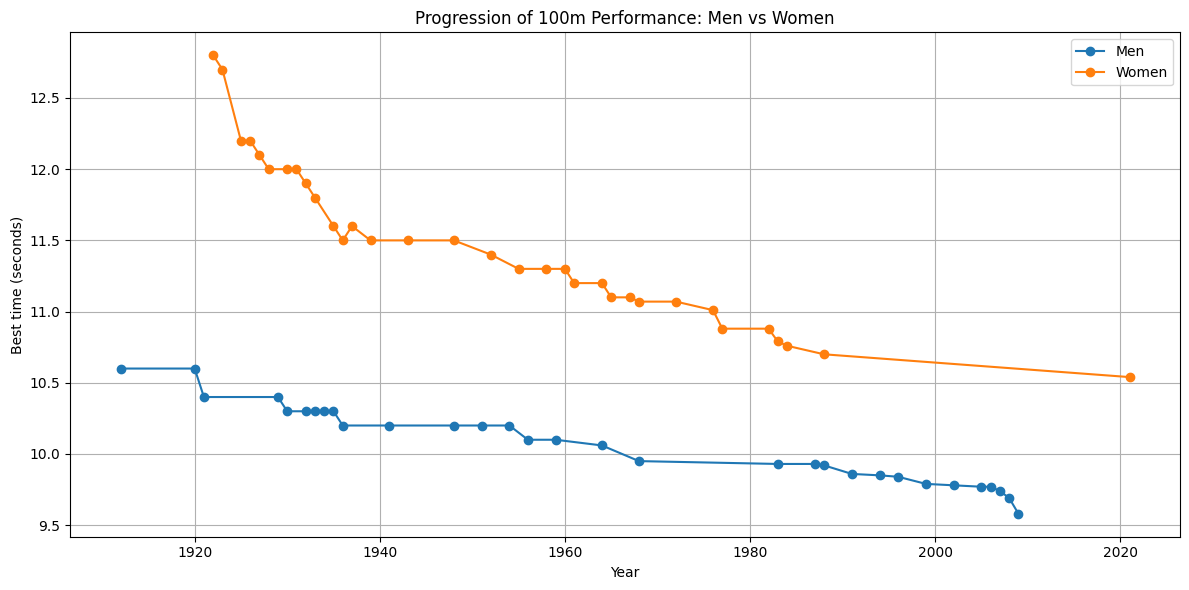

sex    men  women
year             
1912  10.6    NaN
1913  10.6    NaN
1914  10.6    NaN
1915  10.6    NaN
1916  10.6    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.00875 seconds/year
  Women regression slope: -0.01575 seconds/year


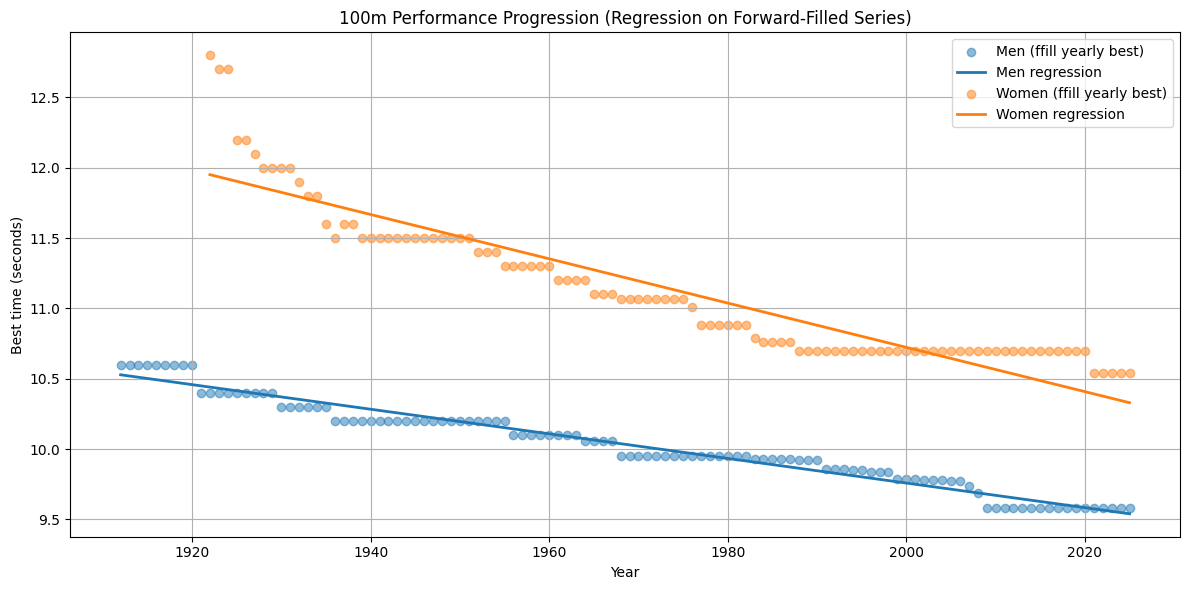


===== Event: 1500m | Sexes: ['men', 'women'] =====


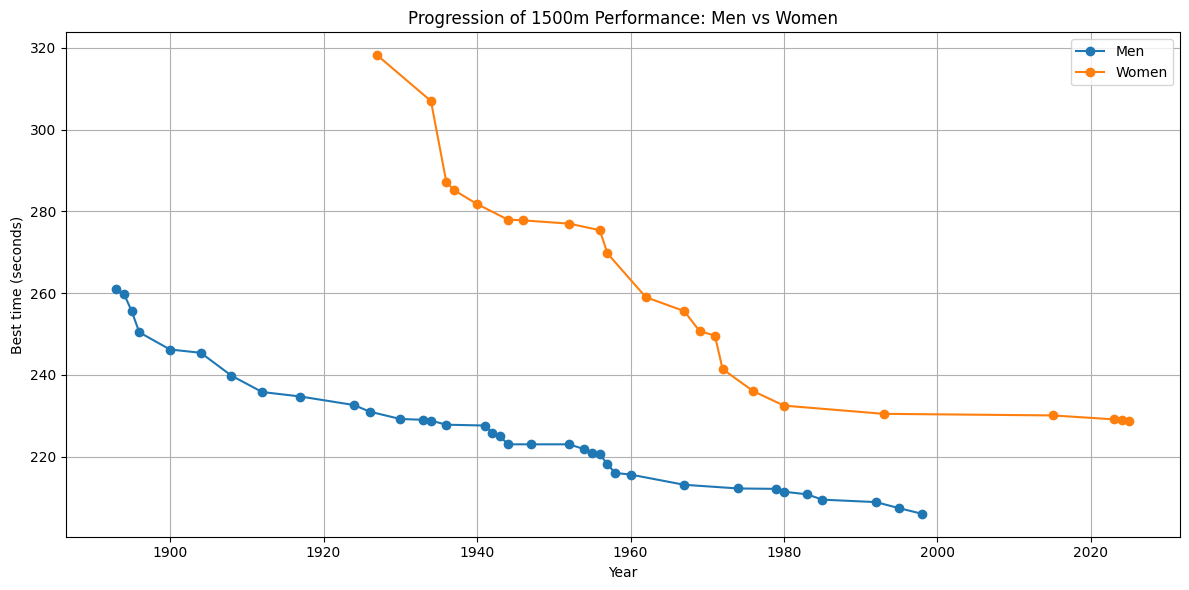

sex     men  women
year              
1893  261.0    NaN
1894  259.8    NaN
1895  255.6    NaN
1896  250.4    NaN
1897  250.4    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.36167 seconds/year
  Women regression slope: -0.89170 seconds/year


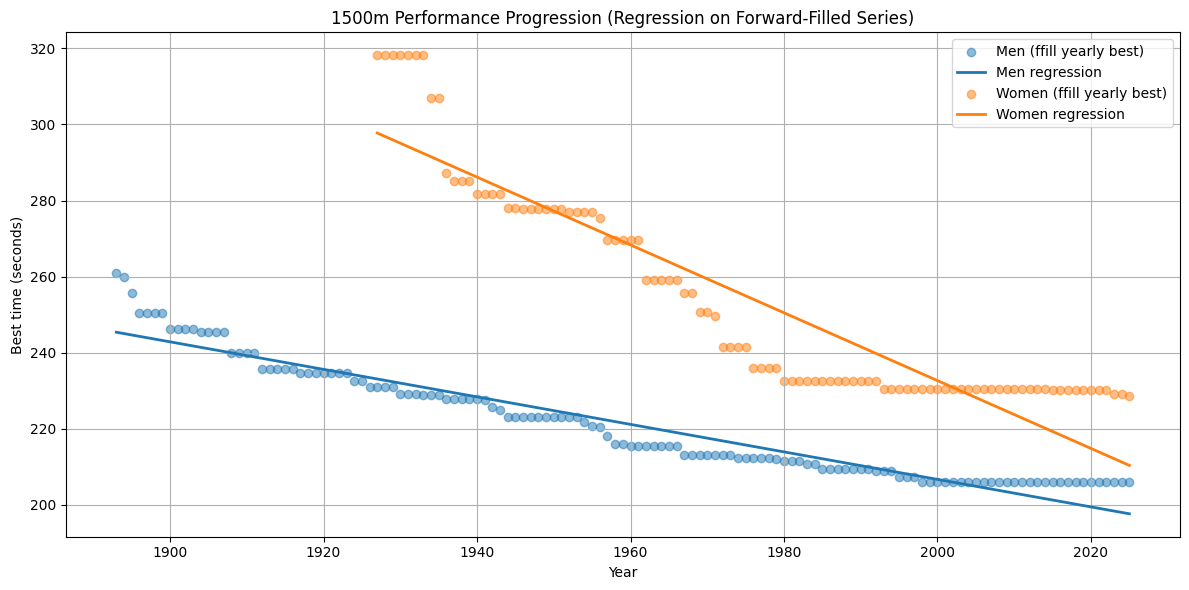


===== Event: 200m | Sexes: ['men', 'women'] =====


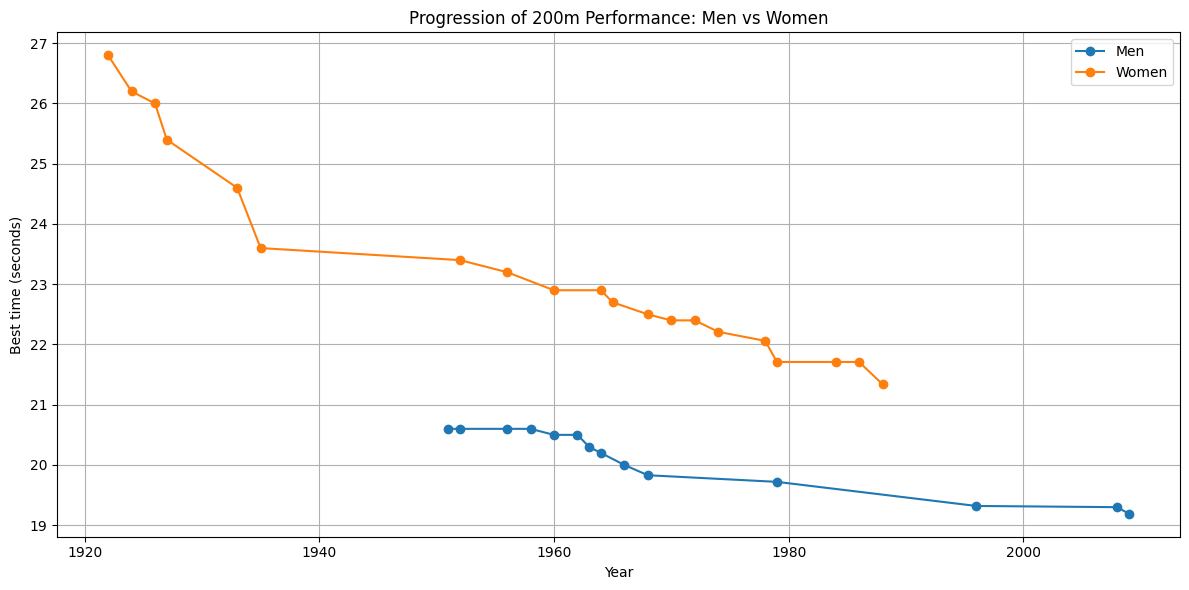

sex   men  women
year            
1922  NaN   26.8
1923  NaN   26.8
1924  NaN   26.2
1925  NaN   26.2
1926  NaN   26.0


Regression slopes on forward-filled series:
  Men regression slope: -0.02066 seconds/year
  Women regression slope: -0.04418 seconds/year


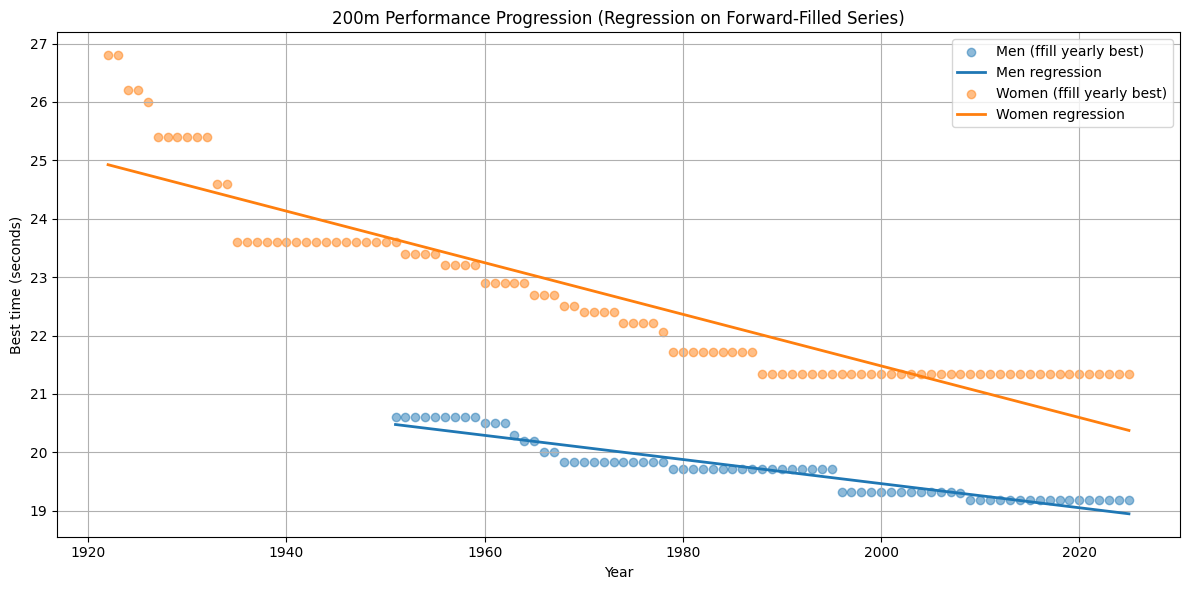


===== Event: 3000m | Sexes: ['men', 'women'] =====


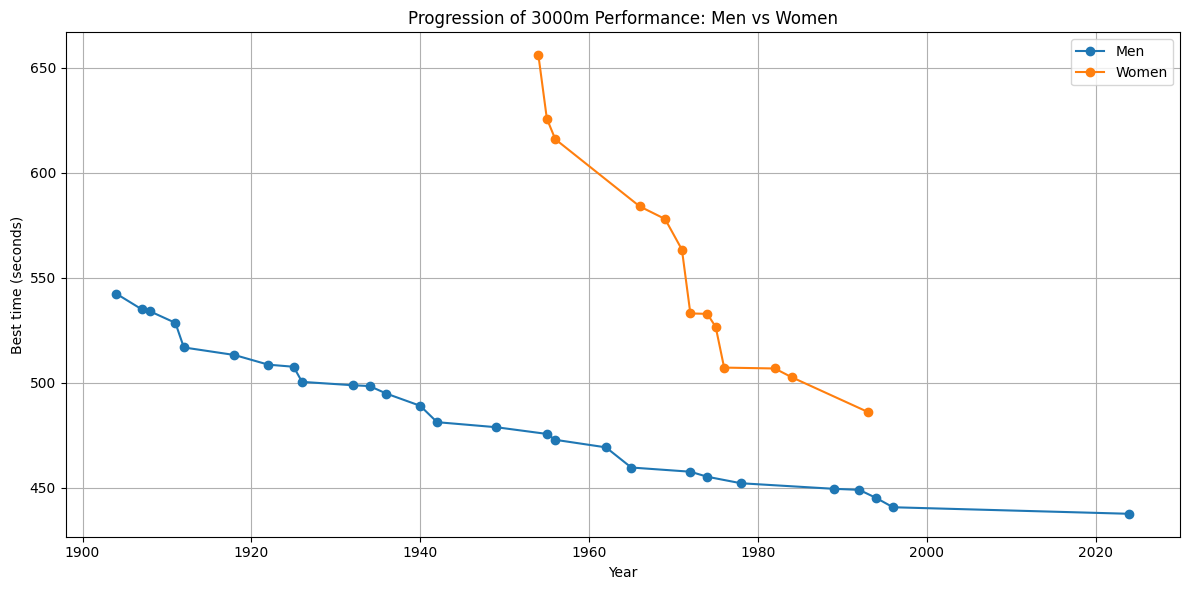

sex     men  women
year              
1904  542.4    NaN
1905  542.4    NaN
1906  542.4    NaN
1907  535.0    NaN
1908  534.0    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.82257 seconds/year
  Women regression slope: -2.09148 seconds/year


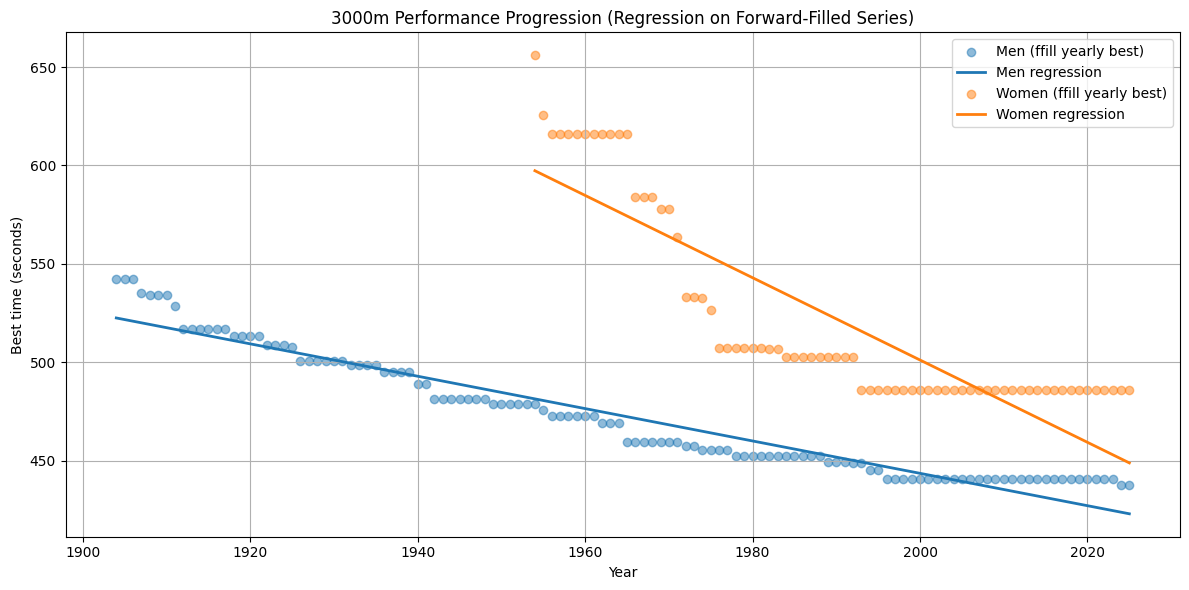


===== Event: 400m | Sexes: ['men', 'women'] =====


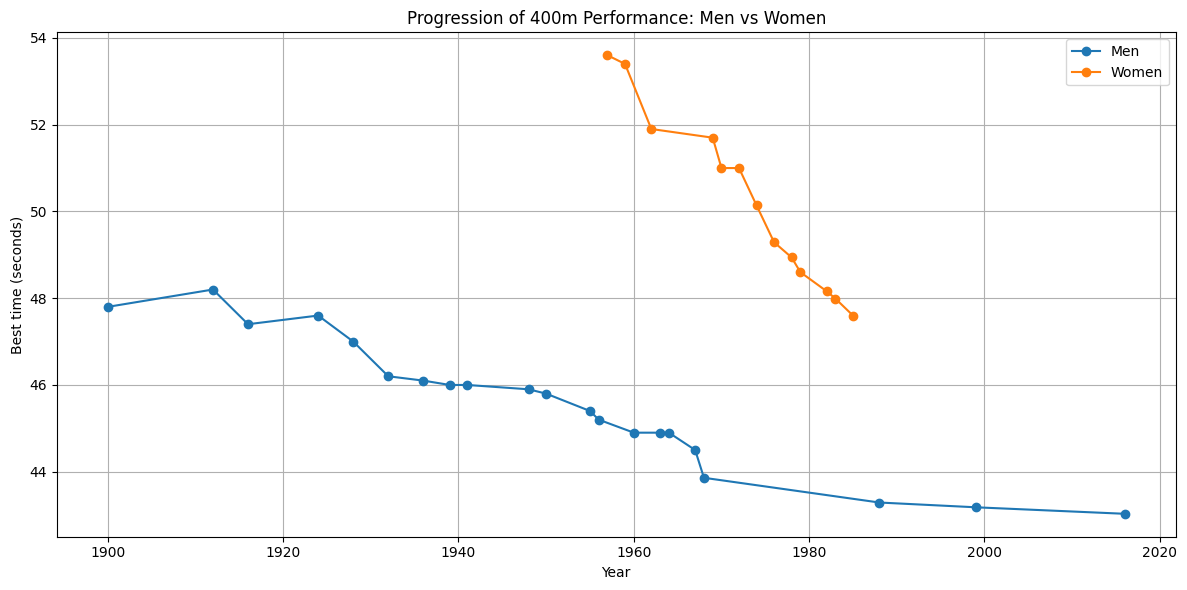

sex    men  women
year             
1900  47.8    NaN
1901  47.8    NaN
1902  47.8    NaN
1903  47.8    NaN
1904  47.8    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.04756 seconds/year
  Women regression slope: -0.08307 seconds/year


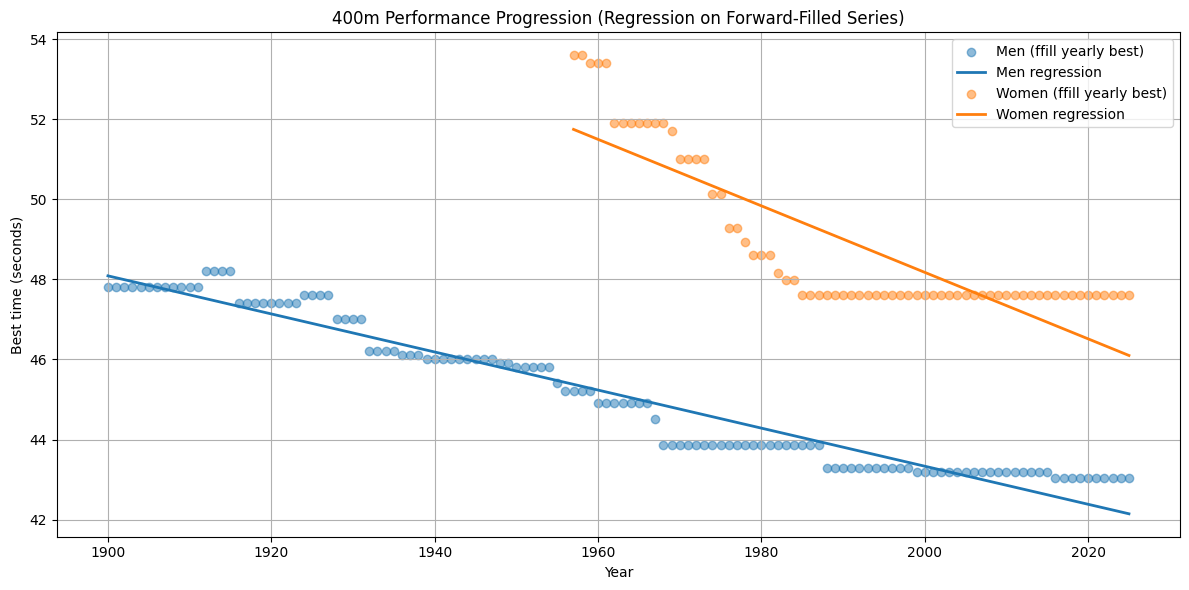


===== Event: 4x100m_relays | Sexes: ['men', 'women'] =====


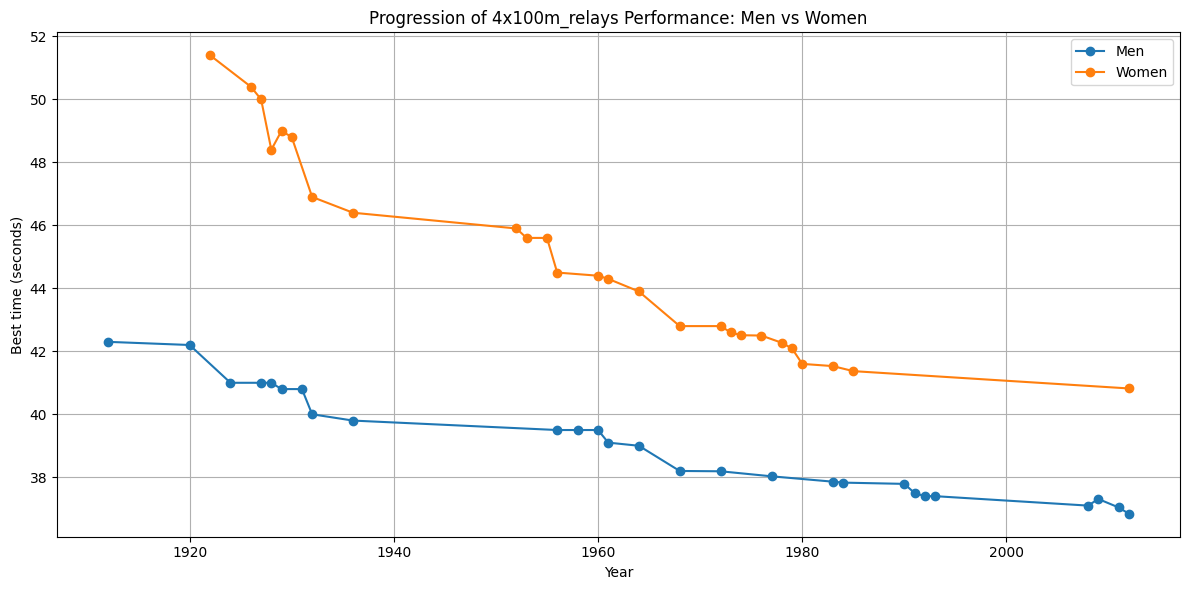

sex    men  women
year             
1912  42.3    NaN
1913  42.3    NaN
1914  42.3    NaN
1915  42.3    NaN
1916  42.3    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.04912 seconds/year
  Women regression slope: -0.09120 seconds/year


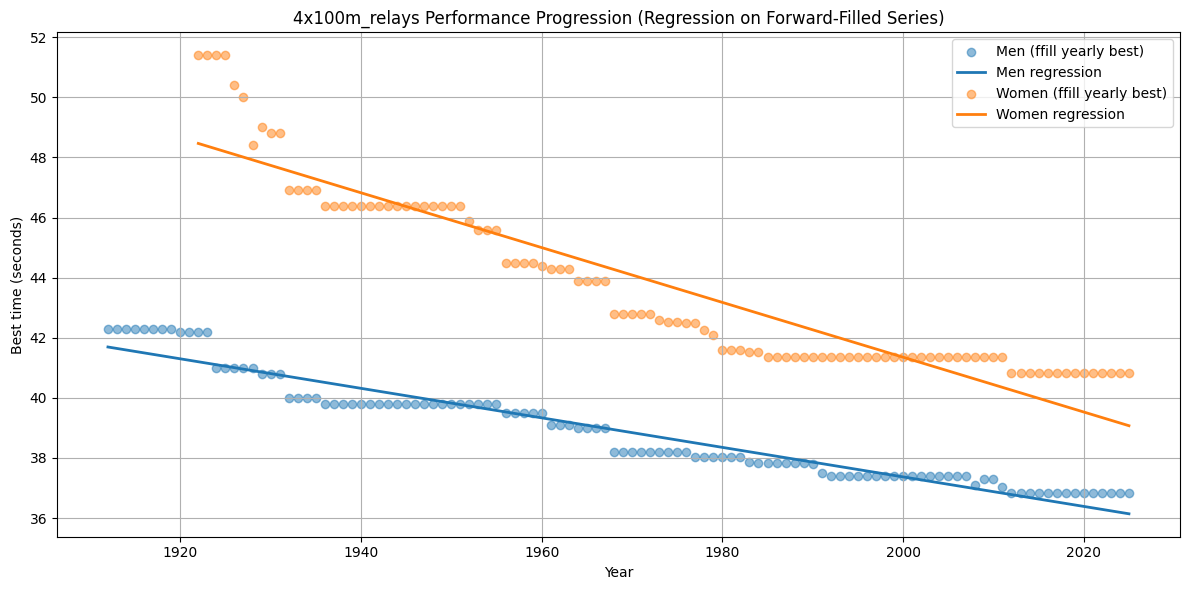


===== Event: 4x400m_relays | Sexes: ['men', 'women'] =====


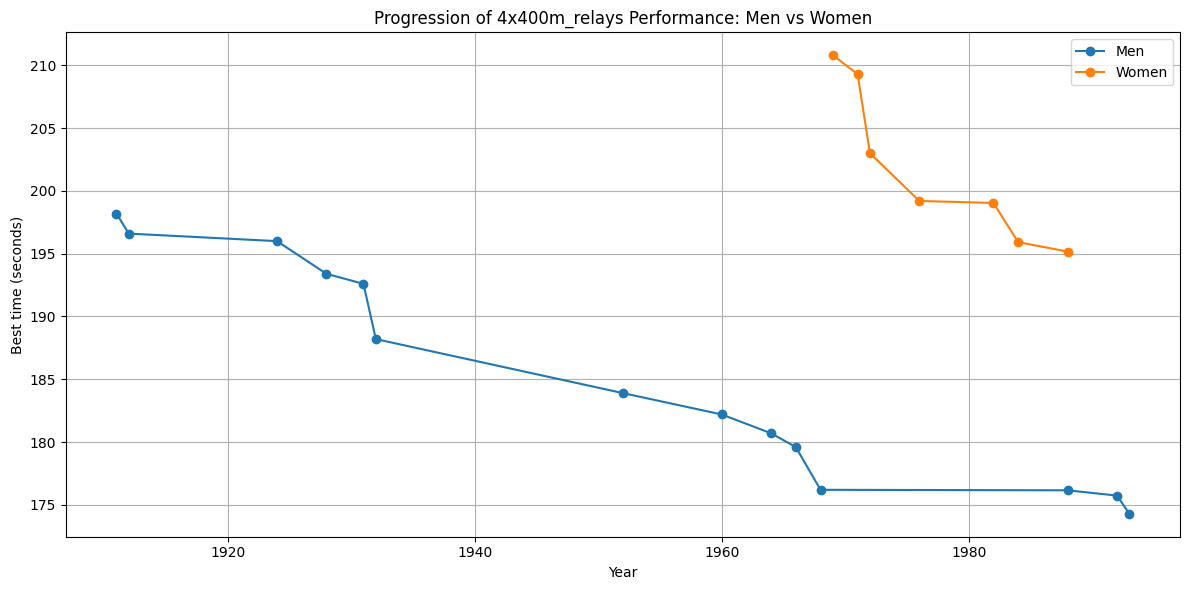

sex     men  women
year              
1911  198.2    NaN
1912  196.6    NaN
1913  196.6    NaN
1914  196.6    NaN
1915  196.6    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.23300 seconds/year
  Women regression slope: -0.16574 seconds/year


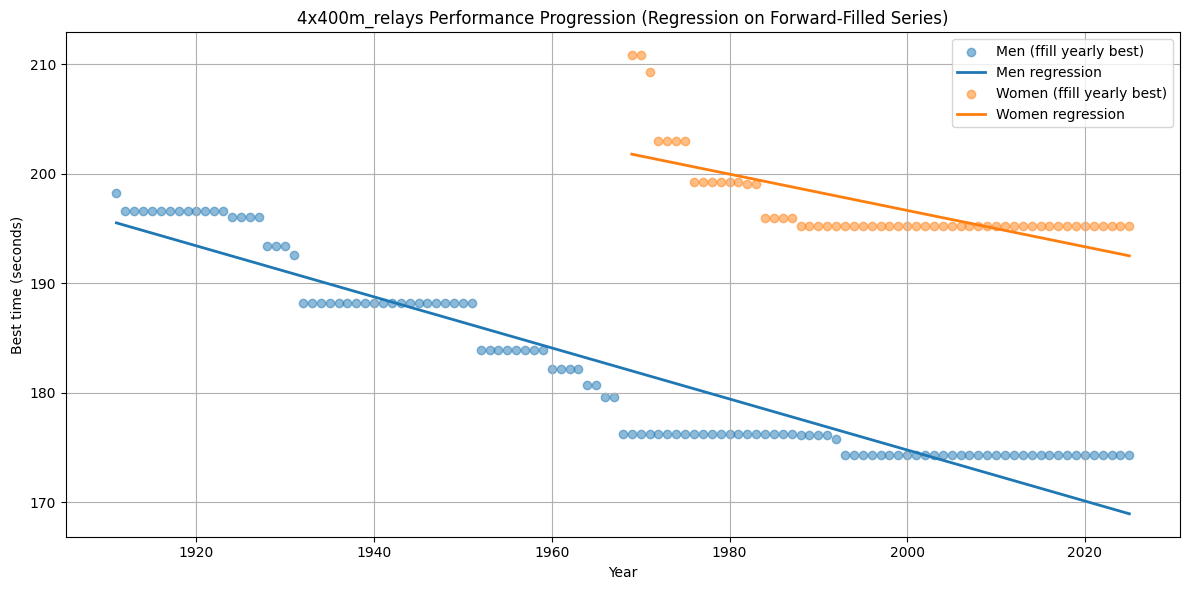


===== Event: 5000m | Sexes: ['men', 'women'] =====


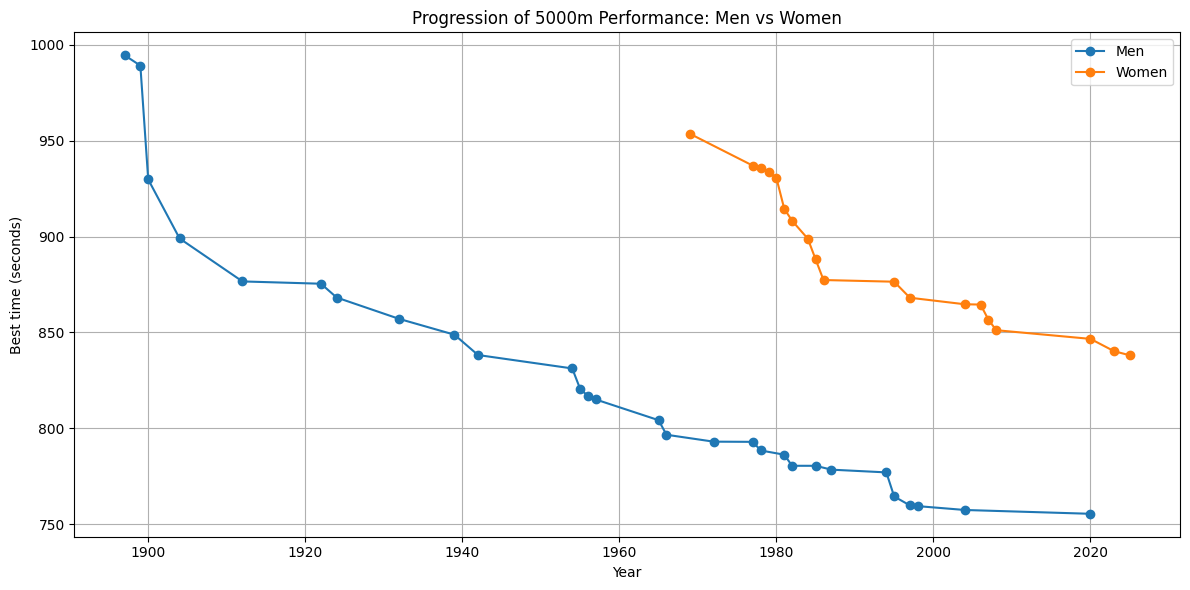

sex     men  women
year              
1897  994.6    NaN
1898  994.6    NaN
1899  989.2    NaN
1900  929.8    NaN
1901  929.8    NaN


Regression slopes on forward-filled series:
  Men regression slope: -1.46177 seconds/year
  Women regression slope: -2.08945 seconds/year


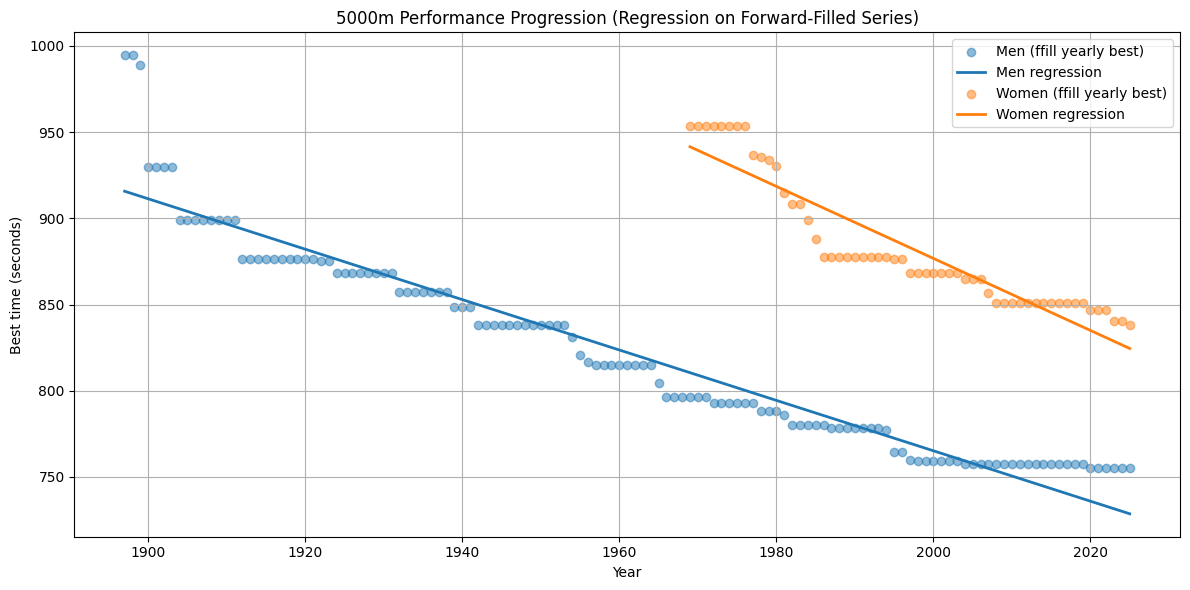


===== Event: 60m_hurdles | Sexes: ['women'] =====


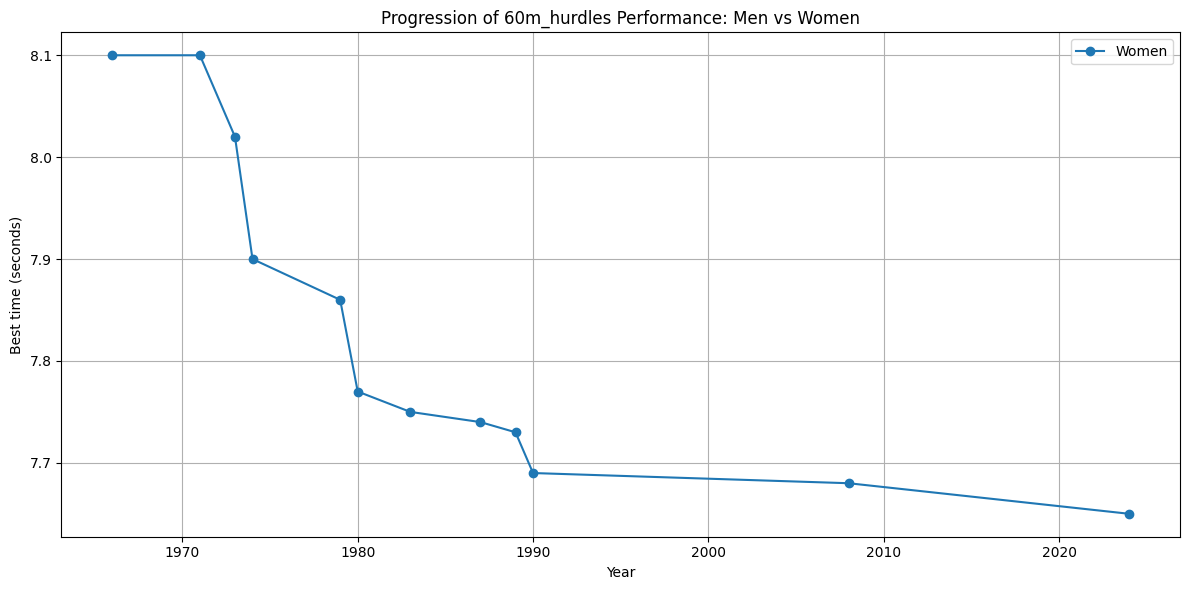

sex   women
year       
1966    8.1
1967    8.1
1968    8.1
1969    8.1
1970    8.1


===== Event: 800m | Sexes: ['men', 'women'] =====


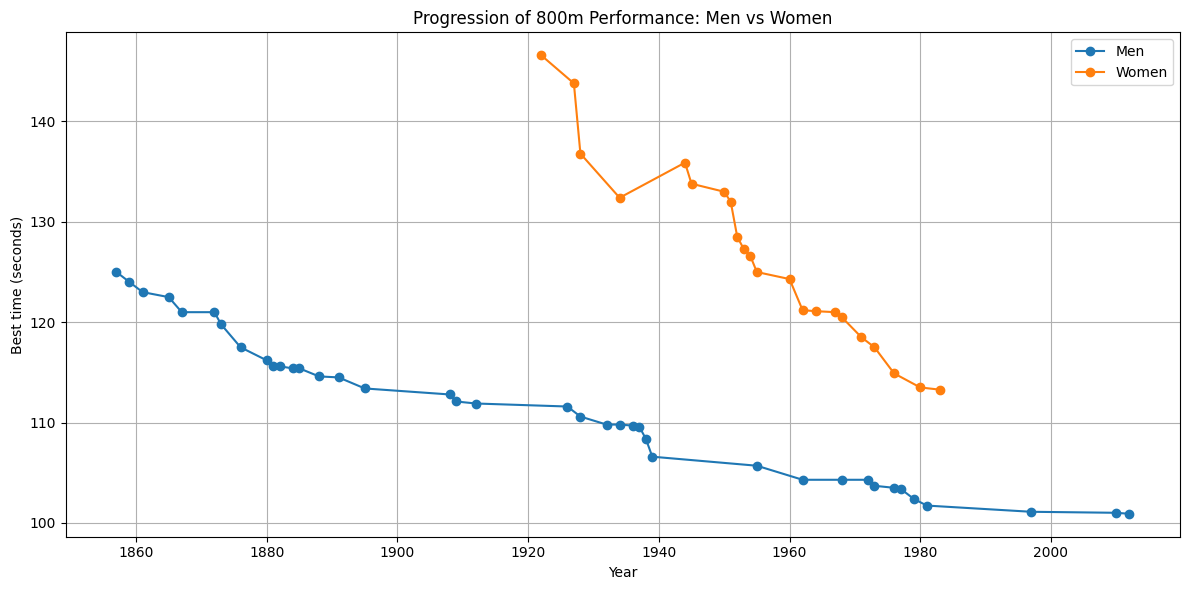

sex     men  women
year              
1857  125.0    NaN
1858  125.0    NaN
1859  124.0    NaN
1860  124.0    NaN
1861  123.0    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.13710 seconds/year
  Women regression slope: -0.31292 seconds/year


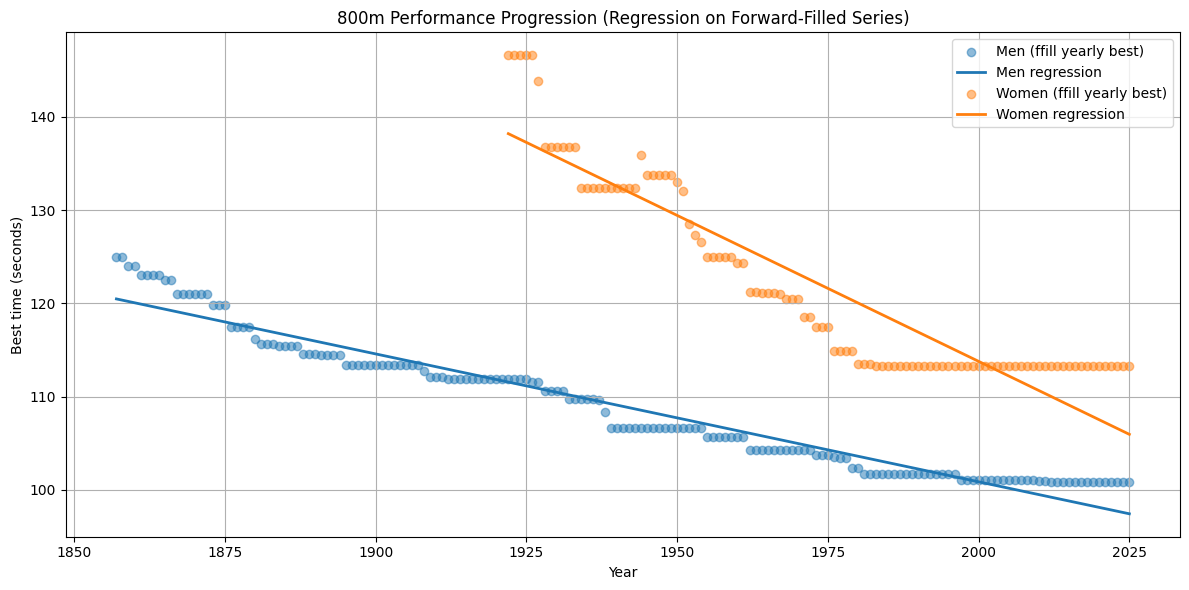


===== Event: half_marathon | Sexes: ['men', 'women'] =====


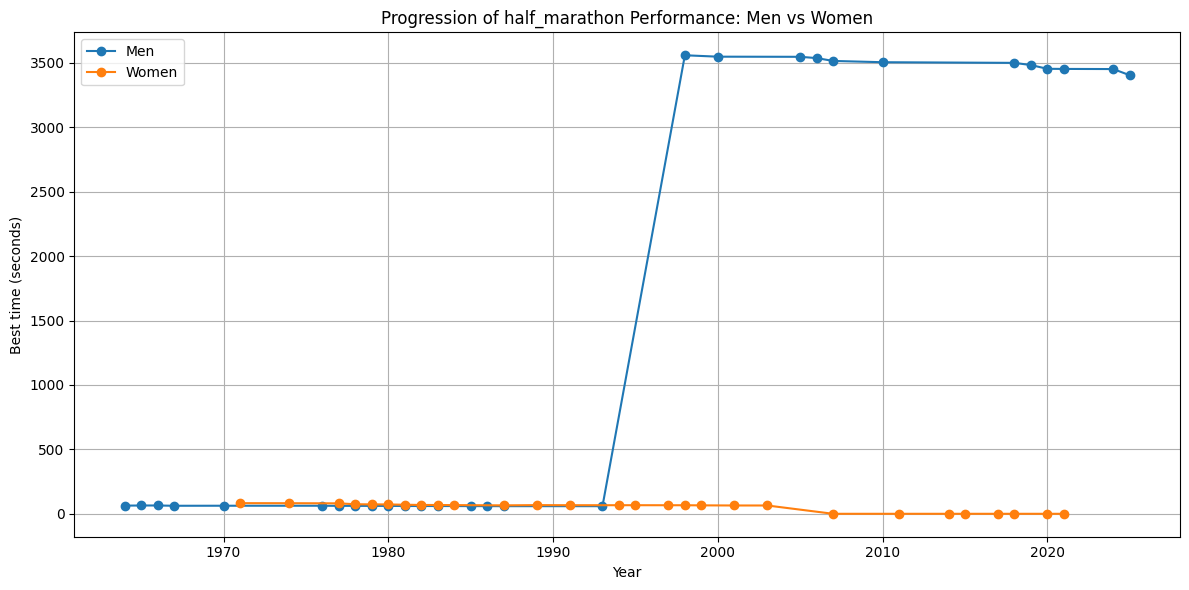

sex     men  women
year              
1964  64.28    NaN
1965  65.44    NaN
1966  65.42    NaN
1967  63.22    NaN
1968  63.22    NaN


Regression slopes on forward-filled series:
  Men regression slope: 82.08171 seconds/year
  Women regression slope: -1.87453 seconds/year


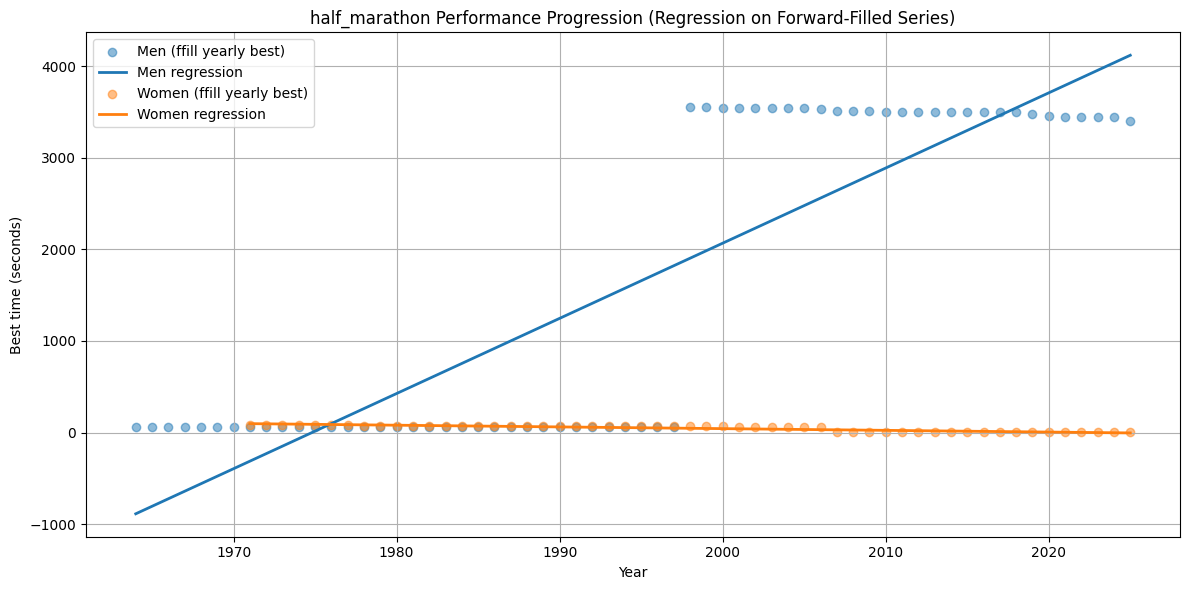


===== Event: marathon | Sexes: ['men', 'women'] =====


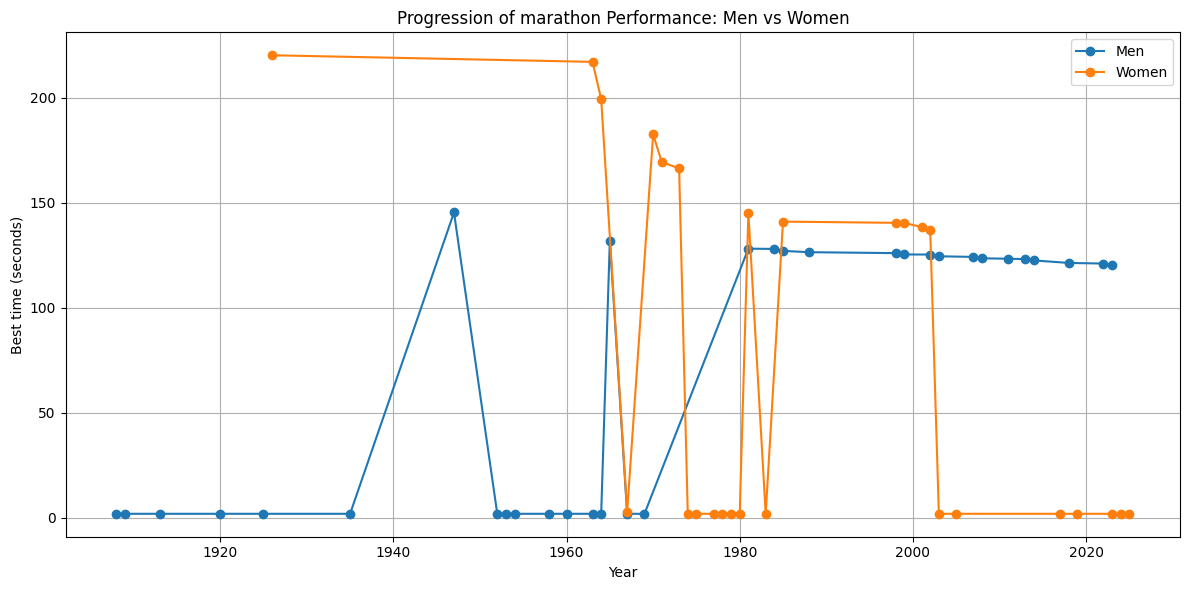

sex   men  women
year            
1908  2.0    NaN
1909  2.0    NaN
1910  2.0    NaN
1911  2.0    NaN
1912  2.0    NaN


Regression slopes on forward-filled series:
  Men regression slope: 1.36775 seconds/year
  Women regression slope: -2.63358 seconds/year


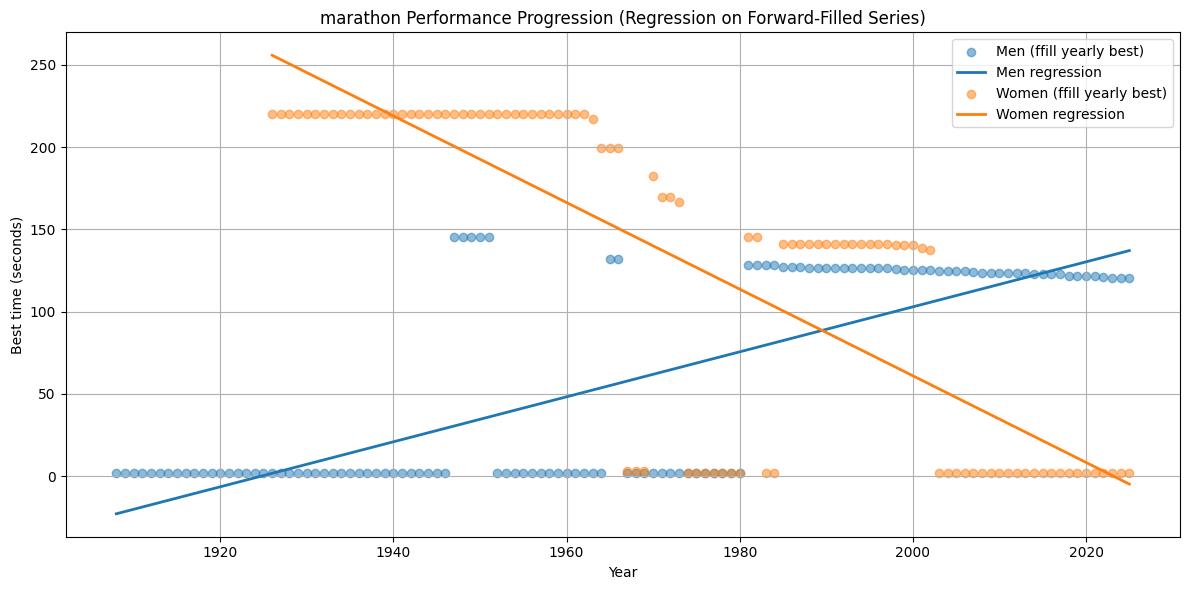


===== Event: swimming_backstroke_100m | Sexes: ['men', 'women'] =====


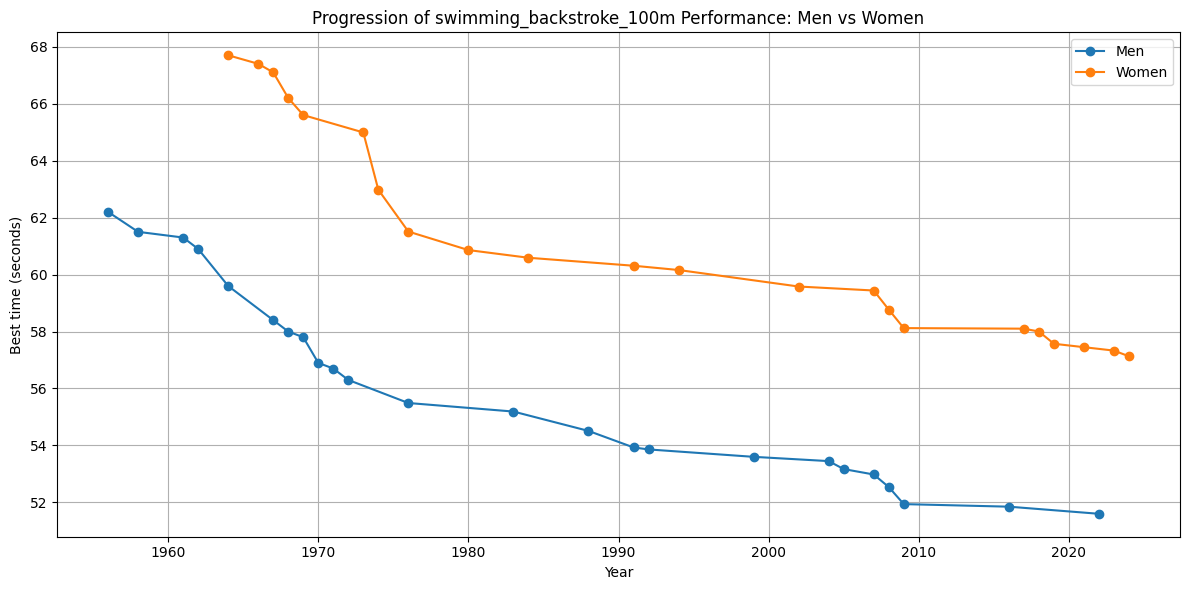

sex    men  women
year             
1956  62.2    NaN
1957  62.2    NaN
1958  61.5    NaN
1959  61.5    NaN
1960  61.5    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.14288 seconds/year
  Women regression slope: -0.14530 seconds/year


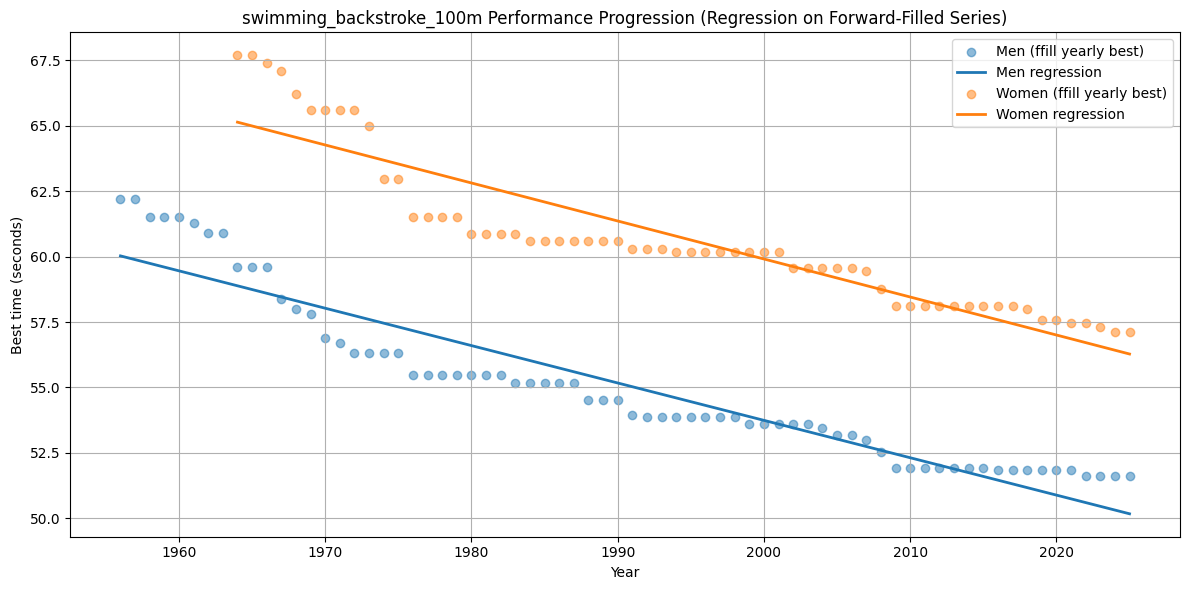


===== Event: swimming_backstroke_200m | Sexes: ['men', 'women'] =====


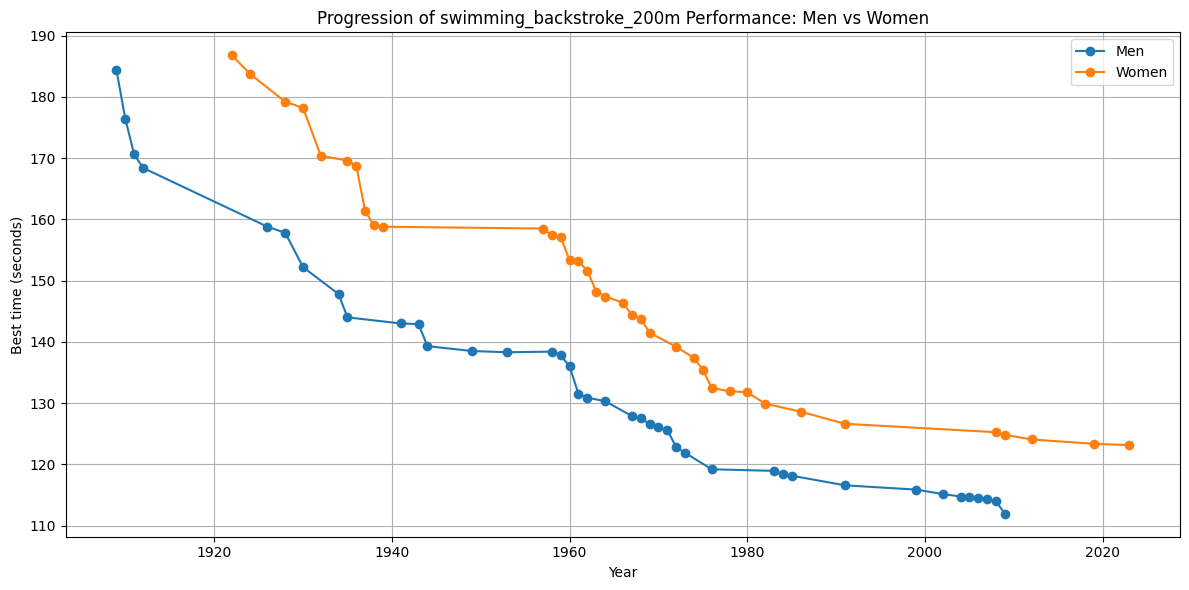

sex     men  women
year              
1909  184.4    NaN
1910  176.4    NaN
1911  170.6    NaN
1912  168.4    NaN
1913  168.4    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.56083 seconds/year
  Women regression slope: -0.61405 seconds/year


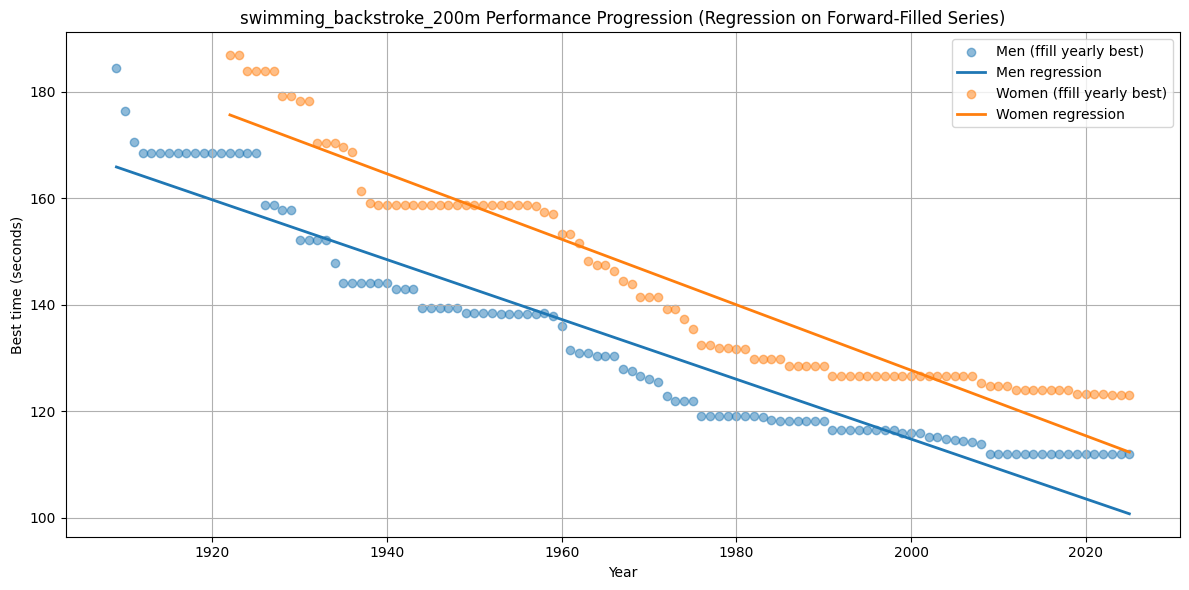


===== Event: swimming_backstroke_50m | Sexes: ['men', 'women'] =====


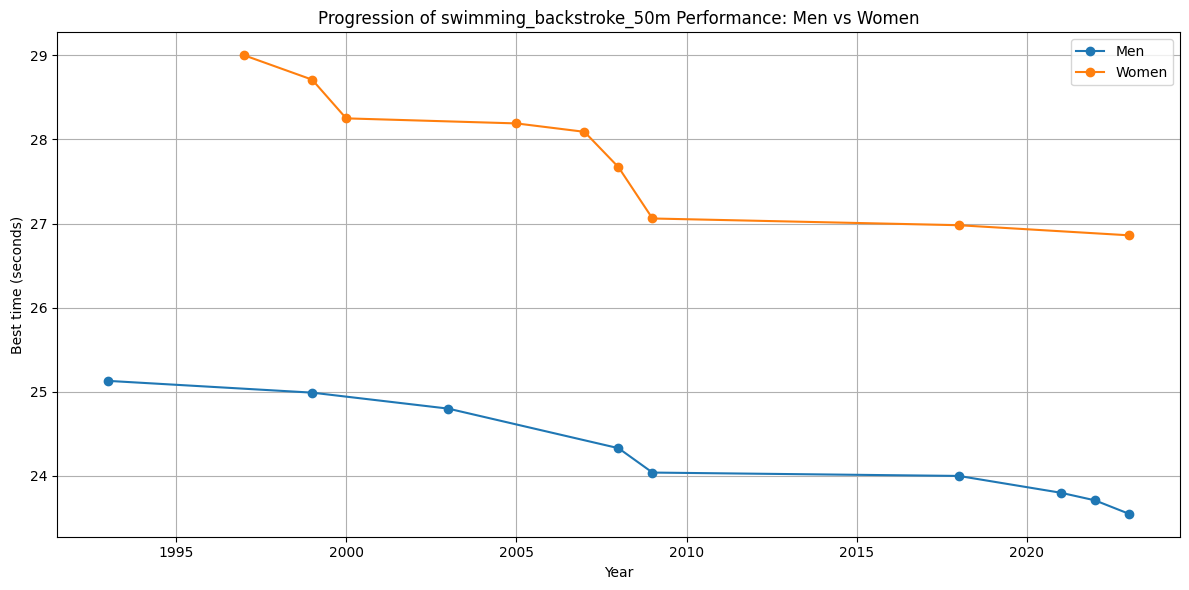

sex     men  women
year              
1993  25.13    NaN
1994  25.13    NaN
1995  25.13    NaN
1996  25.13    NaN
1997  25.13   29.0


Regression slopes on forward-filled series:
  Men regression slope: -0.05565 seconds/year
  Women regression slope: -0.07661 seconds/year


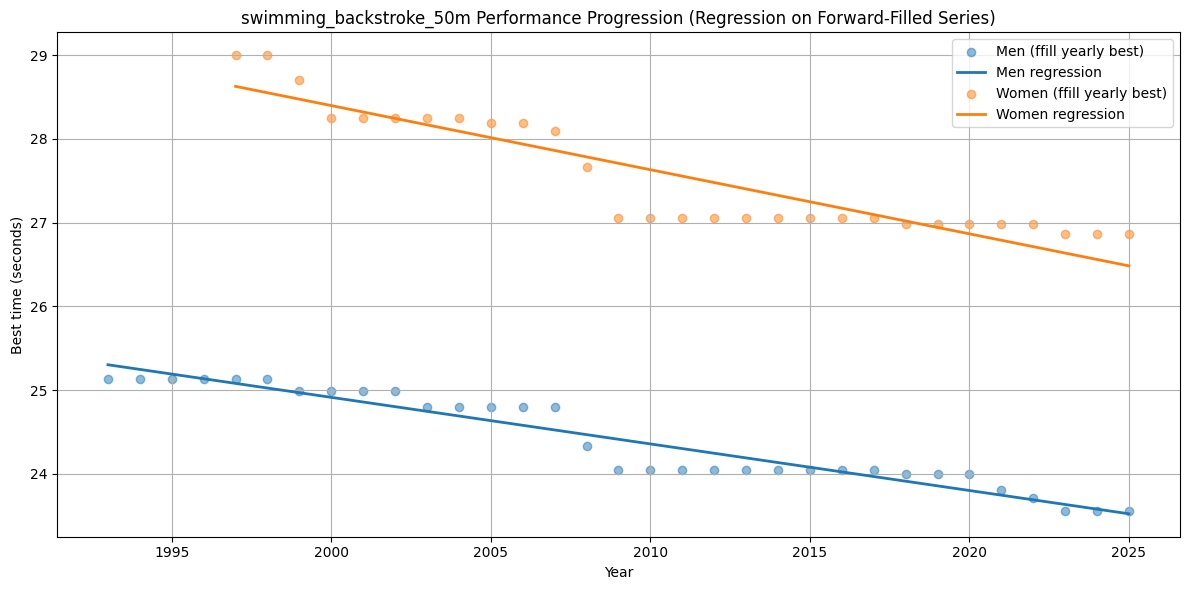


===== Event: swimming_breaststroke_100m | Sexes: ['men', 'women'] =====


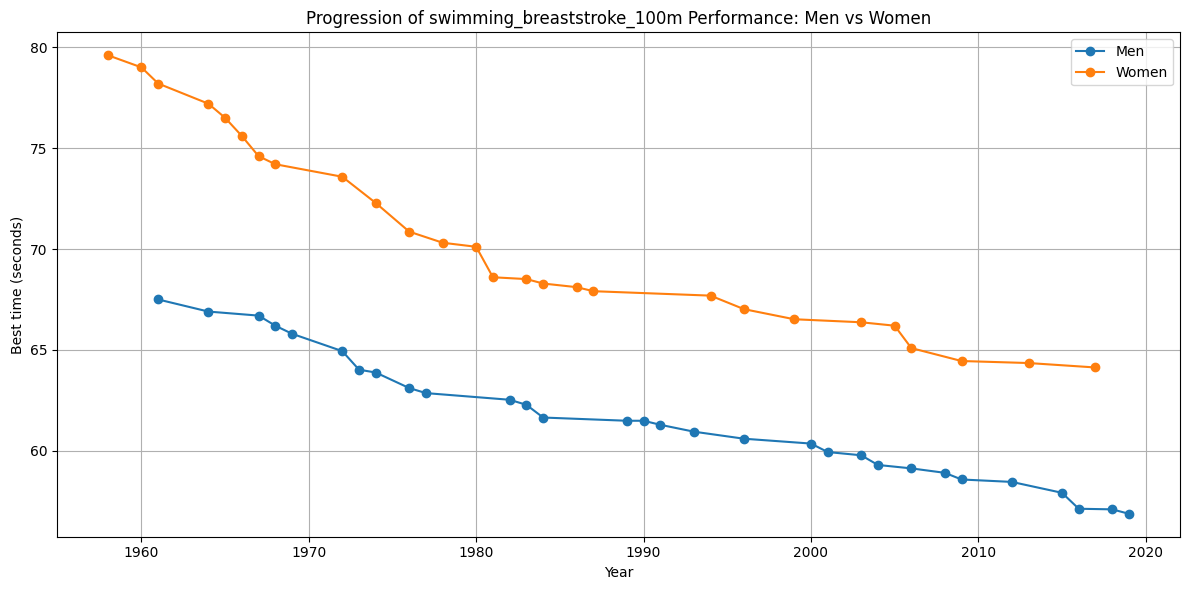

sex    men  women
year             
1958   NaN   79.6
1959   NaN   79.6
1960   NaN   79.0
1961  67.5   78.2
1962  67.5   78.2


Regression slopes on forward-filled series:
  Men regression slope: -0.16627 seconds/year
  Women regression slope: -0.22312 seconds/year


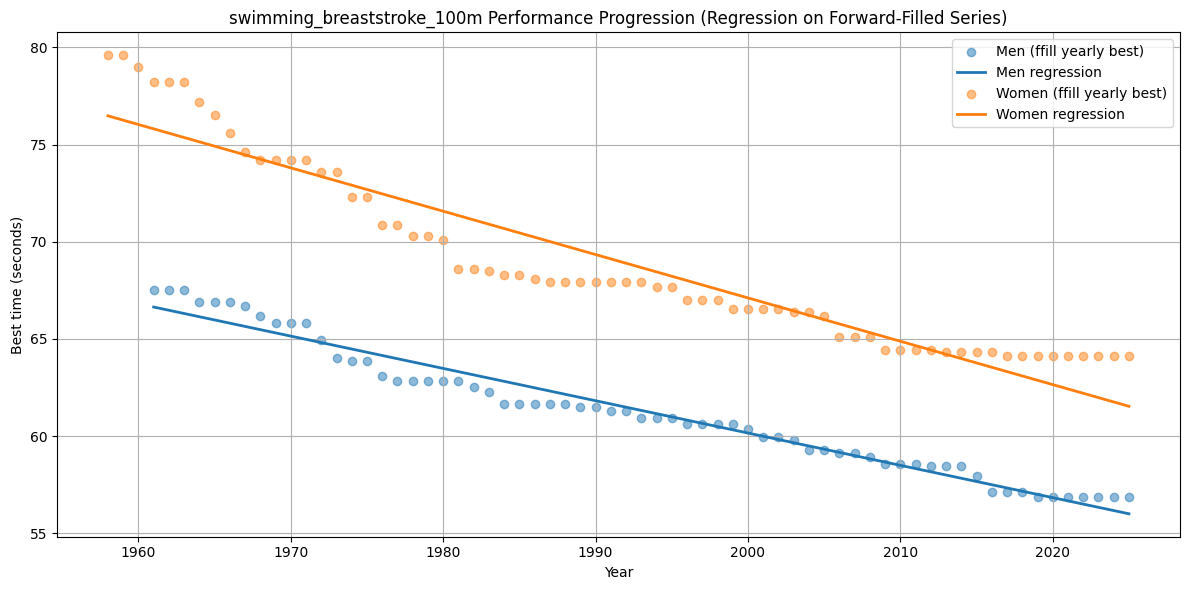


===== Event: swimming_breaststroke_200m | Sexes: ['men', 'women'] =====


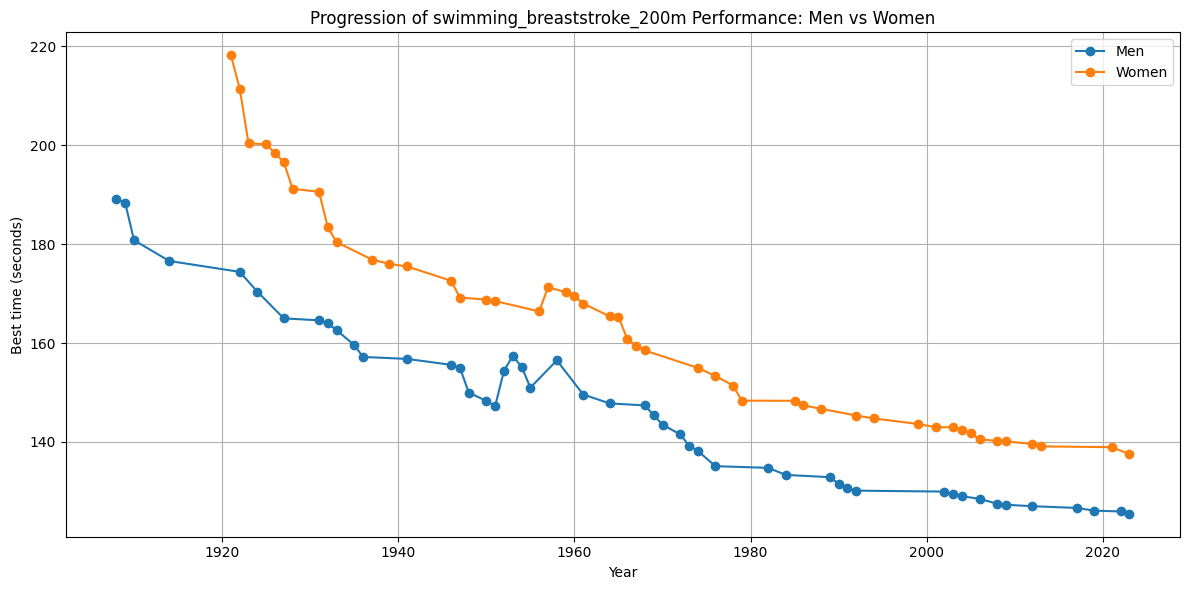

sex     men  women
year              
1908  189.2    NaN
1909  188.3    NaN
1910  180.8    NaN
1911  180.8    NaN
1912  180.8    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.51033 seconds/year
  Women regression slope: -0.60038 seconds/year


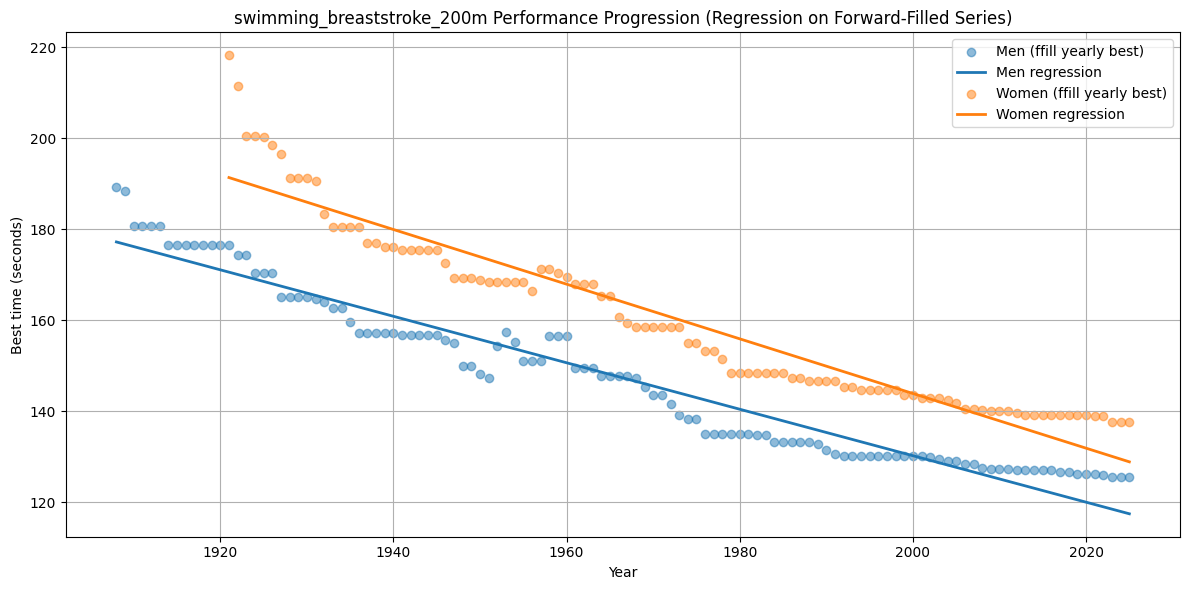


===== Event: swimming_breaststroke_50m | Sexes: ['men', 'women'] =====


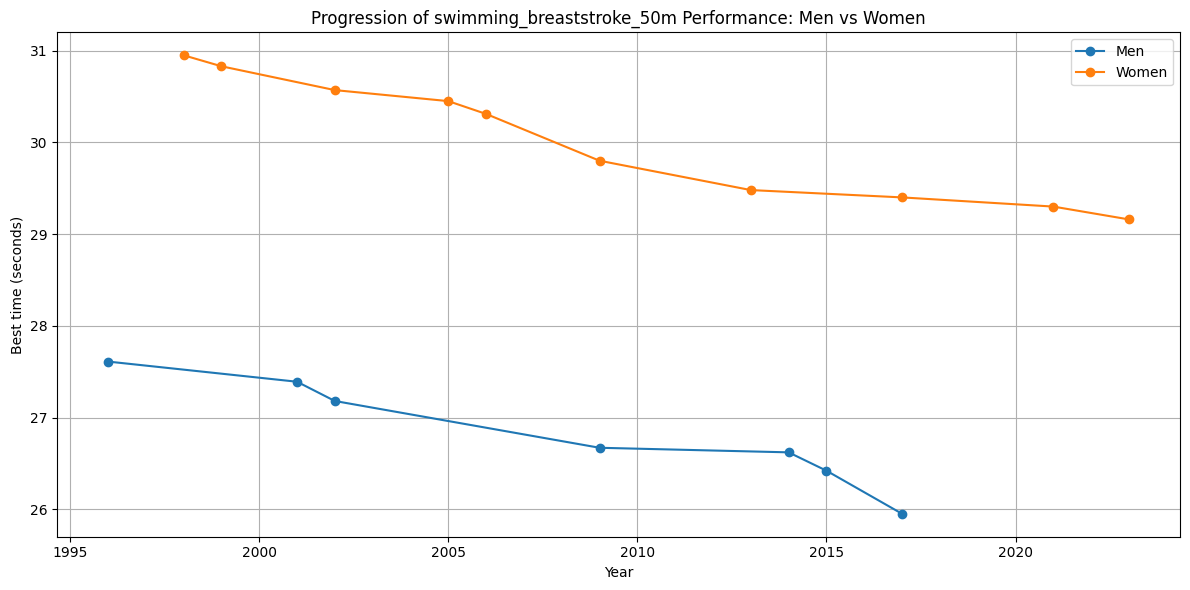

sex     men  women
year              
1996  27.61    NaN
1997  27.61    NaN
1998  27.61  30.95
1999  27.61  30.83
2000  27.61  30.83


Regression slopes on forward-filled series:
  Men regression slope: -0.06938 seconds/year
  Women regression slope: -0.07162 seconds/year


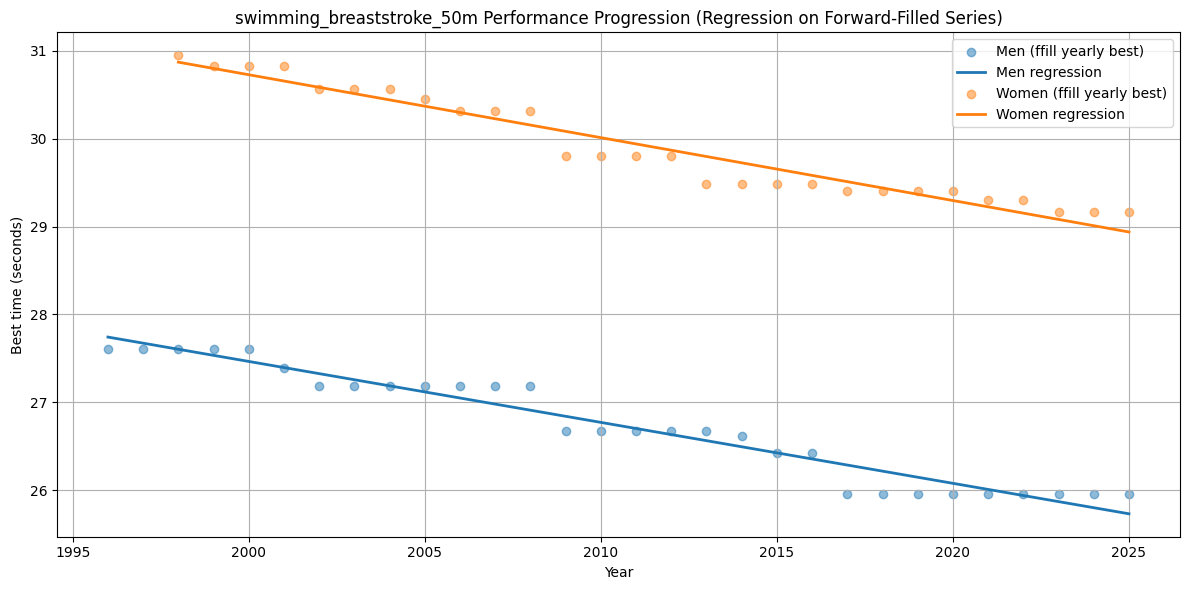


===== Event: swimming_butterfly_100m | Sexes: ['men', 'women'] =====


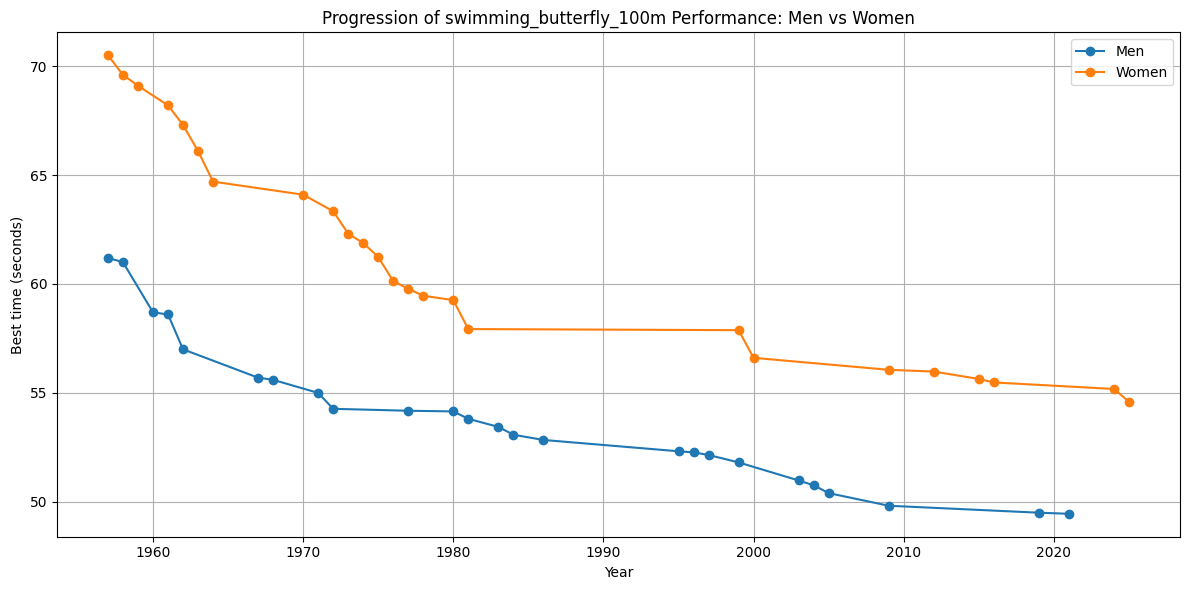

sex    men  women
year             
1957  61.2   70.5
1958  61.0   69.6
1959  61.0   69.1
1960  58.7   69.1
1961  58.6   68.2


Regression slopes on forward-filled series:
  Men regression slope: -0.14268 seconds/year
  Women regression slope: -0.18977 seconds/year


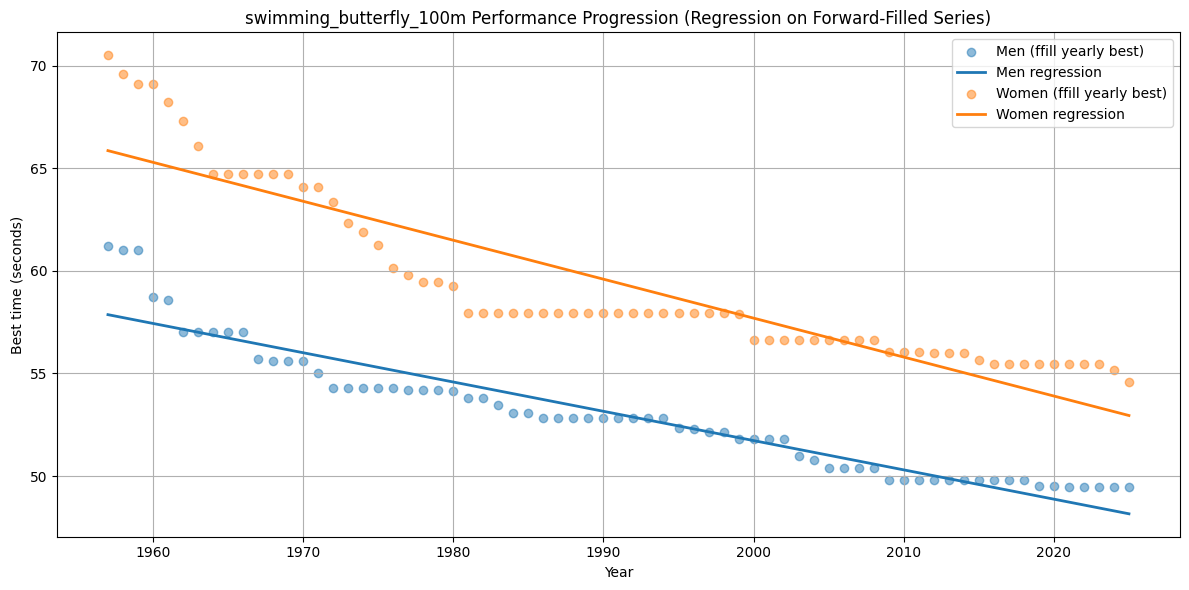


===== Event: swimming_butterfly_200m | Sexes: ['men', 'women'] =====


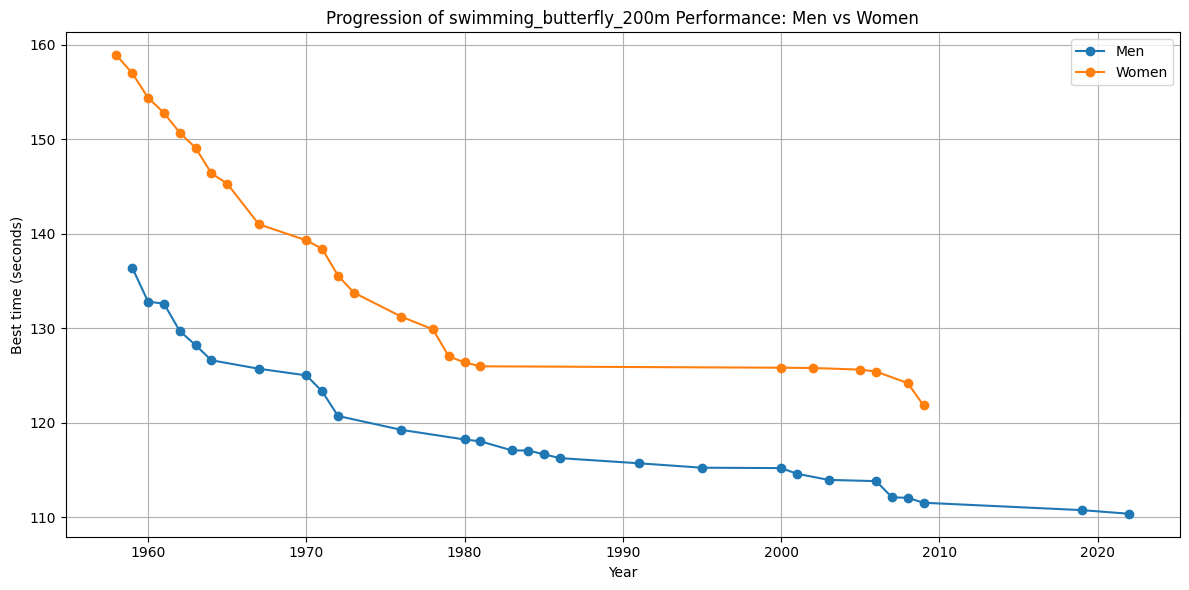

sex     men  women
year              
1958    NaN  158.9
1959  136.4  157.0
1960  132.8  154.4
1961  132.6  152.8
1962  129.7  150.7


Regression slopes on forward-filled series:
  Men regression slope: -0.29659 seconds/year
  Women regression slope: -0.42257 seconds/year


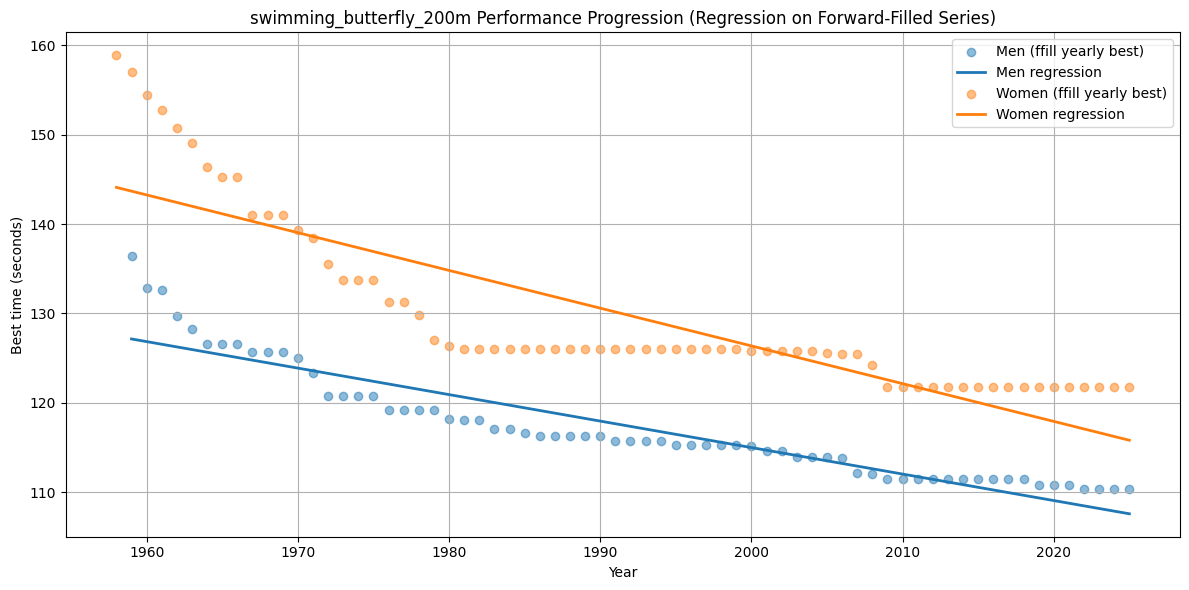


===== Event: swimming_butterfly_50m | Sexes: ['men', 'women'] =====


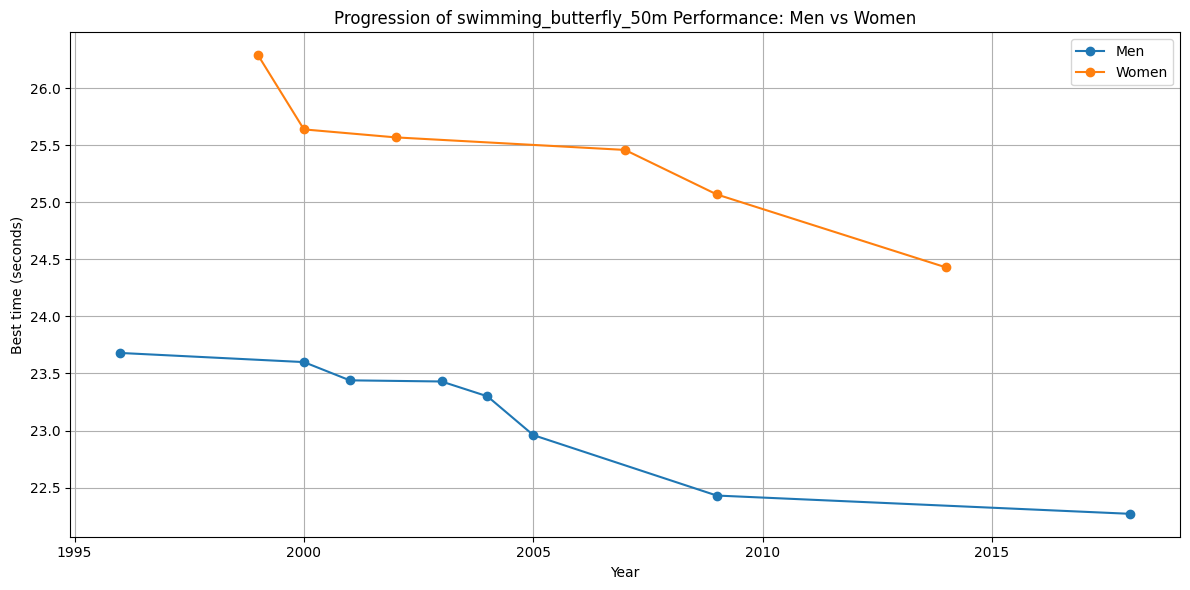

sex     men  women
year              
1996  23.68    NaN
1997  23.68    NaN
1998  23.68    NaN
1999  23.68  26.29
2000  23.60  25.64


Regression slopes on forward-filled series:
  Men regression slope: -0.05837 seconds/year
  Women regression slope: -0.06720 seconds/year


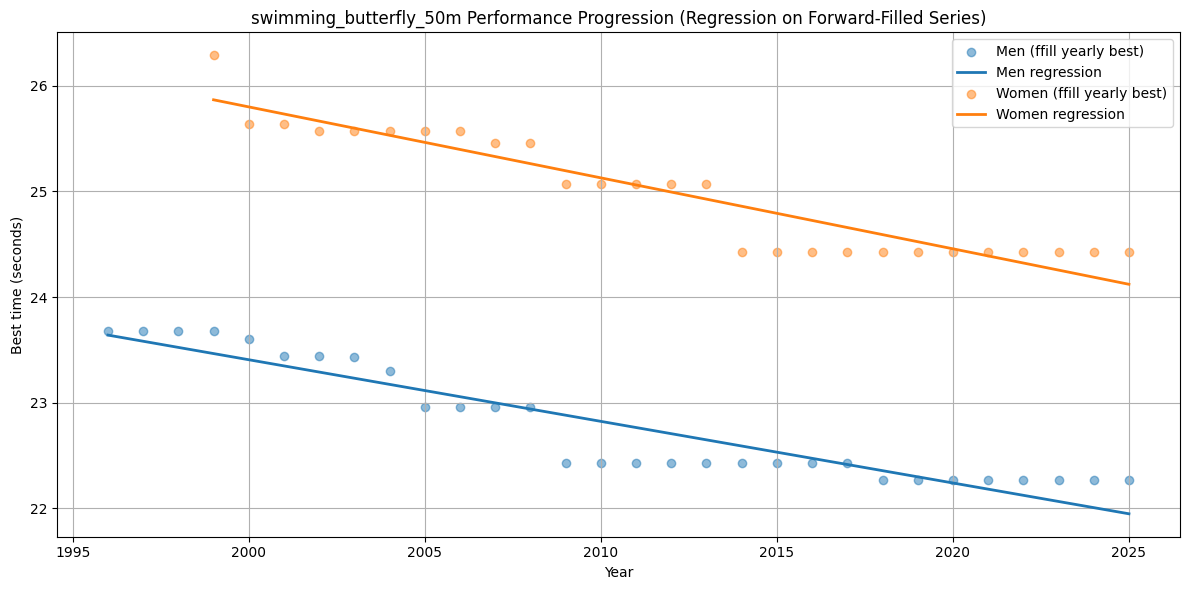


===== Event: swimming_freestyle_100m | Sexes: ['men', 'women'] =====


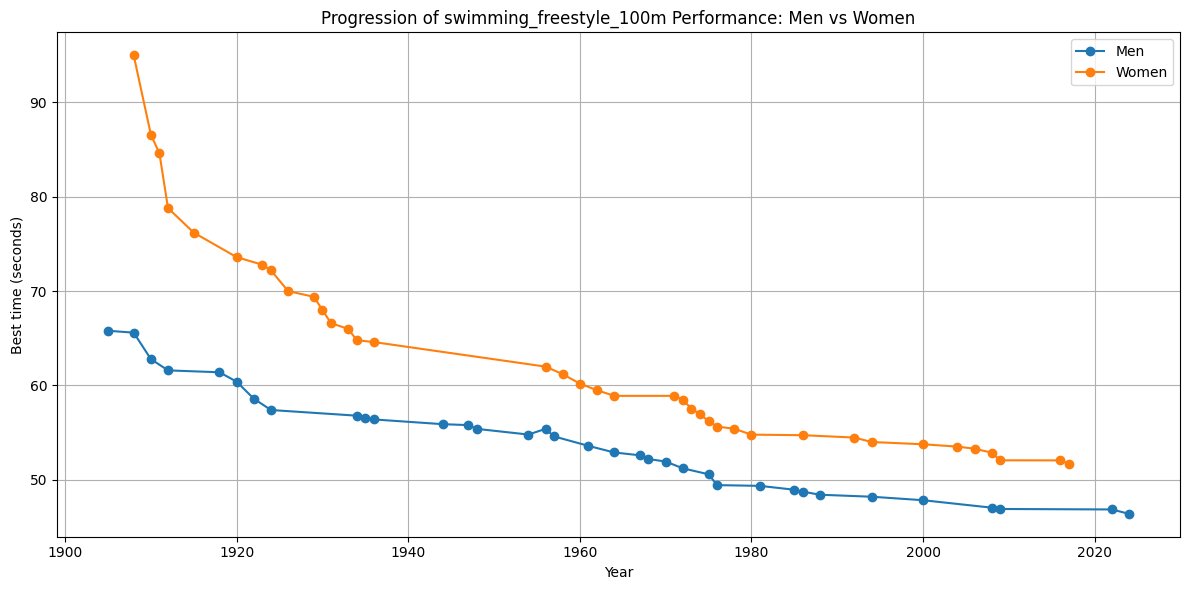

sex    men  women
year             
1905  65.8    NaN
1906  65.8    NaN
1907  65.8    NaN
1908  65.6   95.0
1909  65.6   95.0


Regression slopes on forward-filled series:
  Men regression slope: -0.14958 seconds/year
  Women regression slope: -0.24987 seconds/year


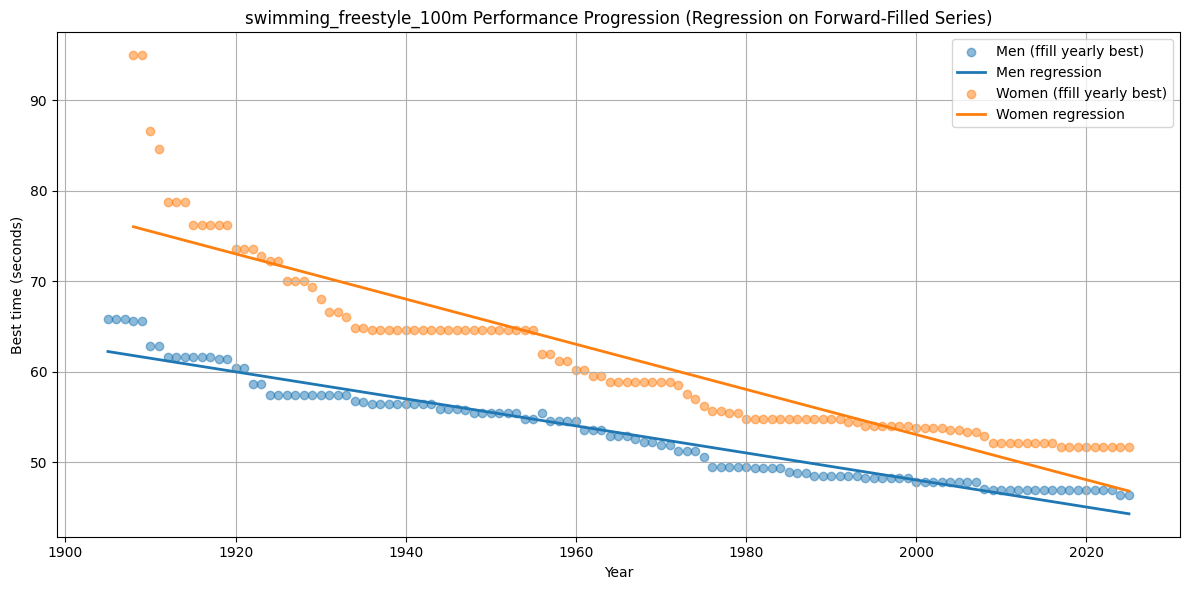


===== Event: swimming_freestyle_1500m | Sexes: ['men', 'women'] =====


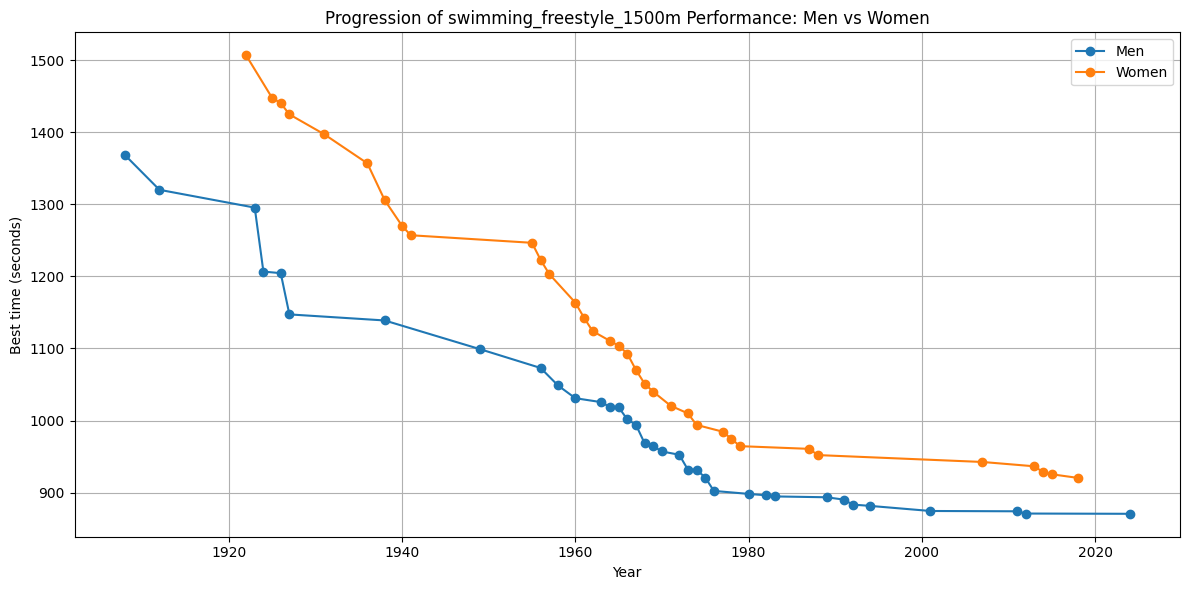

sex      men  women
year               
1908  1368.4    NaN
1909  1368.4    NaN
1910  1368.4    NaN
1911  1368.4    NaN
1912  1320.0    NaN


Regression slopes on forward-filled series:
  Men regression slope: -4.46938 seconds/year
  Women regression slope: -5.73501 seconds/year


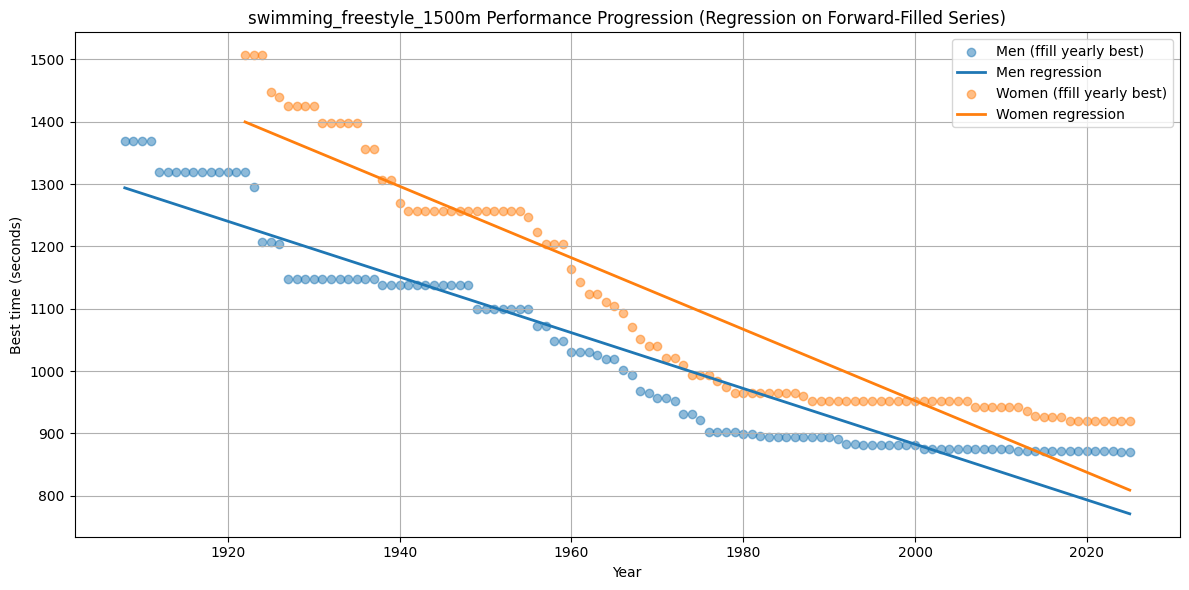


===== Event: swimming_freestyle_200m | Sexes: ['men', 'women'] =====


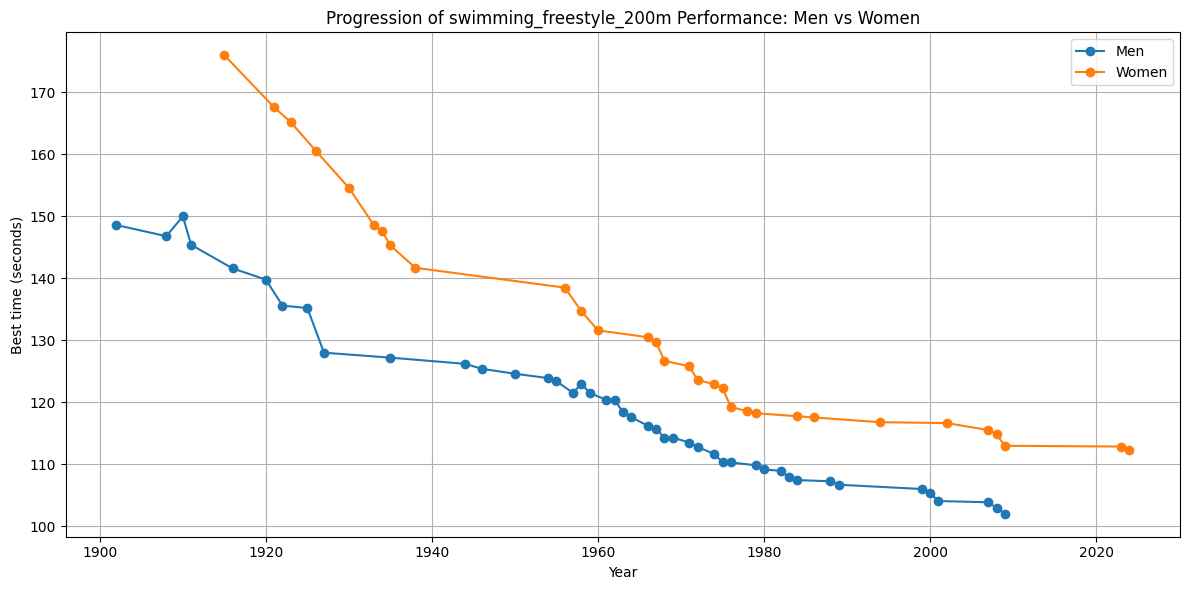

sex     men  women
year              
1902  148.6    NaN
1903  148.6    NaN
1904  148.6    NaN
1905  148.6    NaN
1906  148.6    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.40543 seconds/year
  Women regression slope: -0.54902 seconds/year


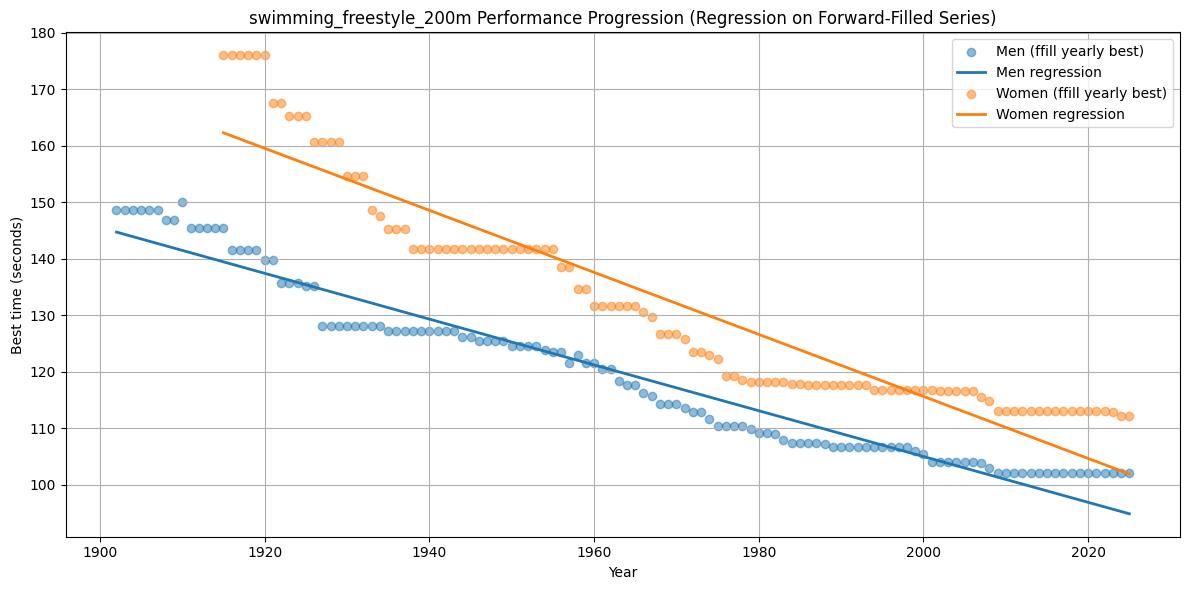


===== Event: swimming_freestyle_400m | Sexes: ['men', 'women'] =====


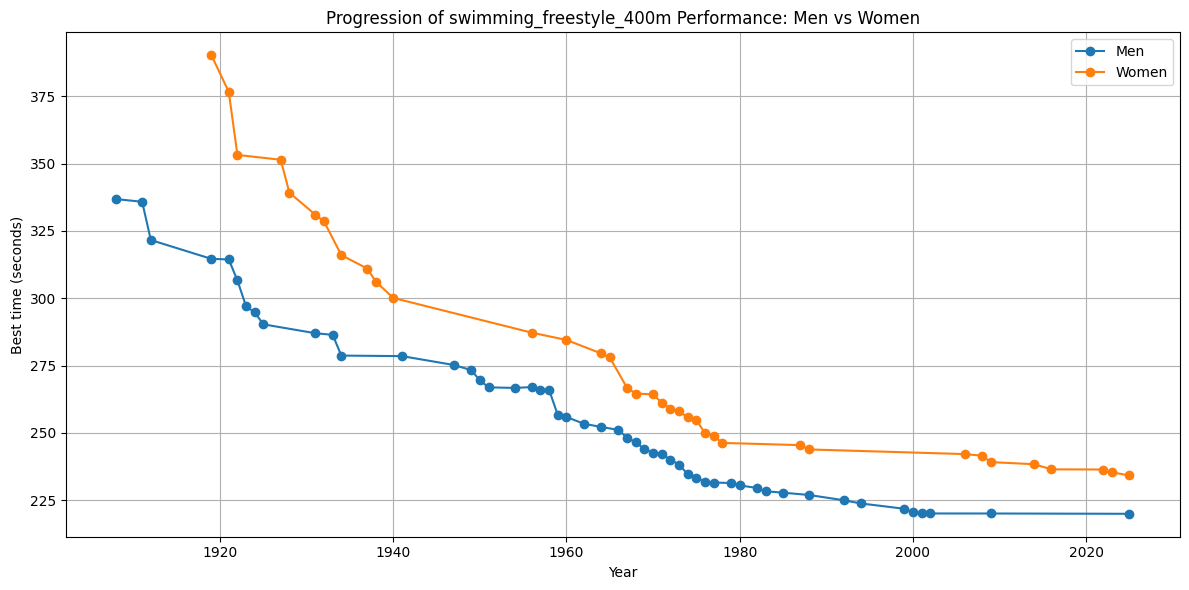

sex     men  women
year              
1908  336.8    NaN
1909  336.8    NaN
1910  336.8    NaN
1911  335.8    NaN
1912  321.6    NaN


Regression slopes on forward-filled series:
  Men regression slope: -0.99127 seconds/year
  Women regression slope: -1.20173 seconds/year


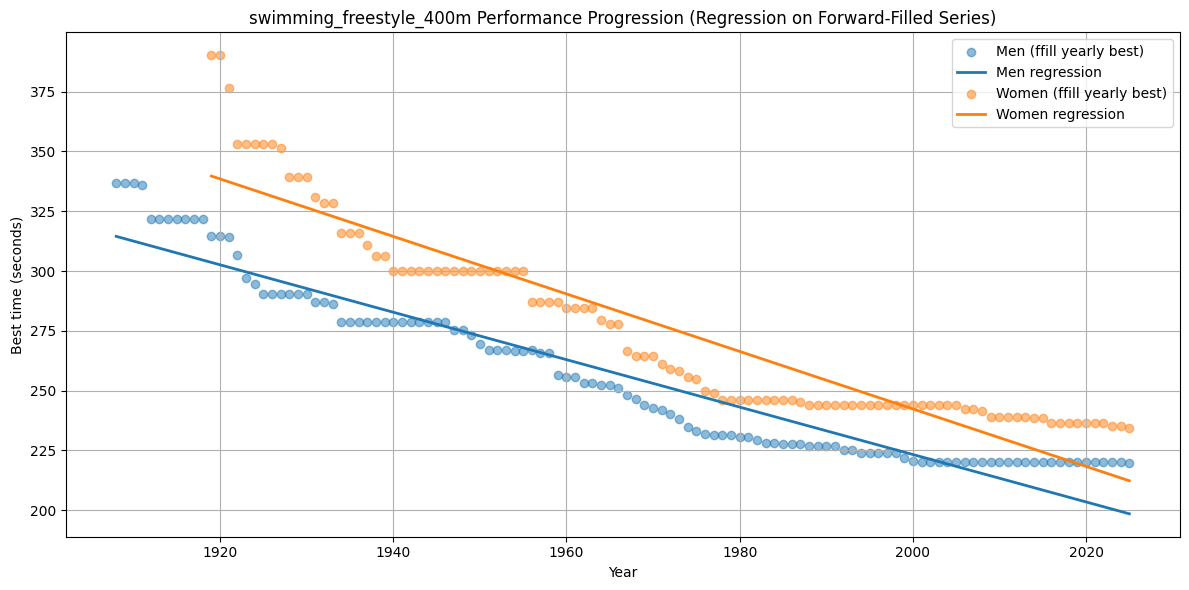


===== Event: swimming_freestyle_50m | Sexes: ['men', 'women'] =====


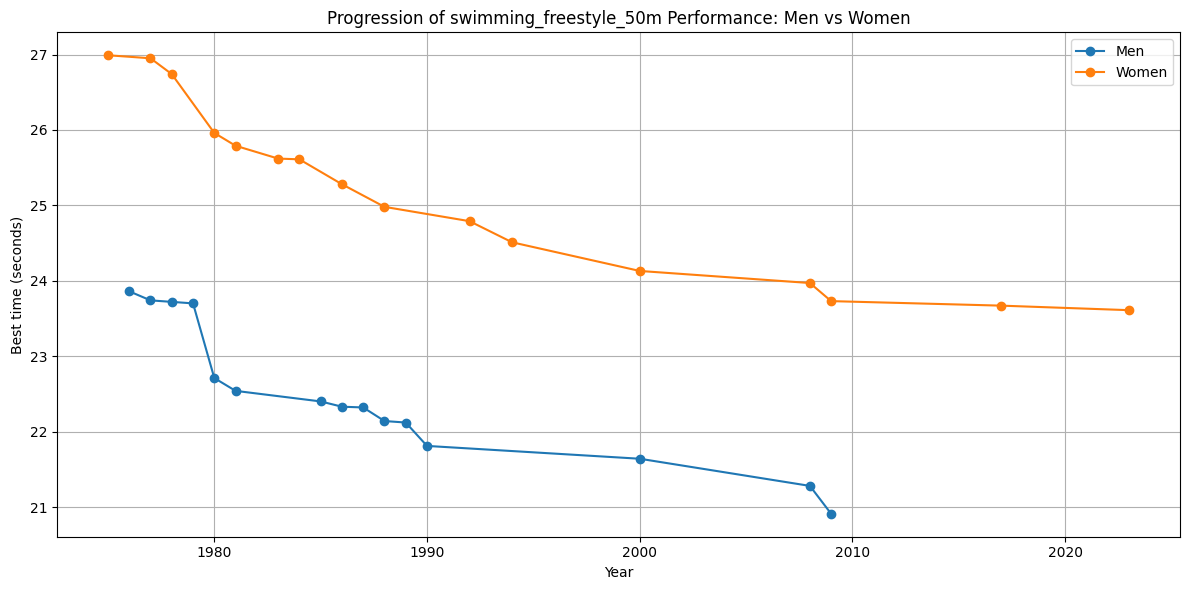

sex     men  women
year              
1975    NaN  26.99
1976  23.86  26.99
1977  23.74  26.95
1978  23.72  26.74
1979  23.70  26.74


Regression slopes on forward-filled series:
  Men regression slope: -0.05205 seconds/year
  Women regression slope: -0.06368 seconds/year


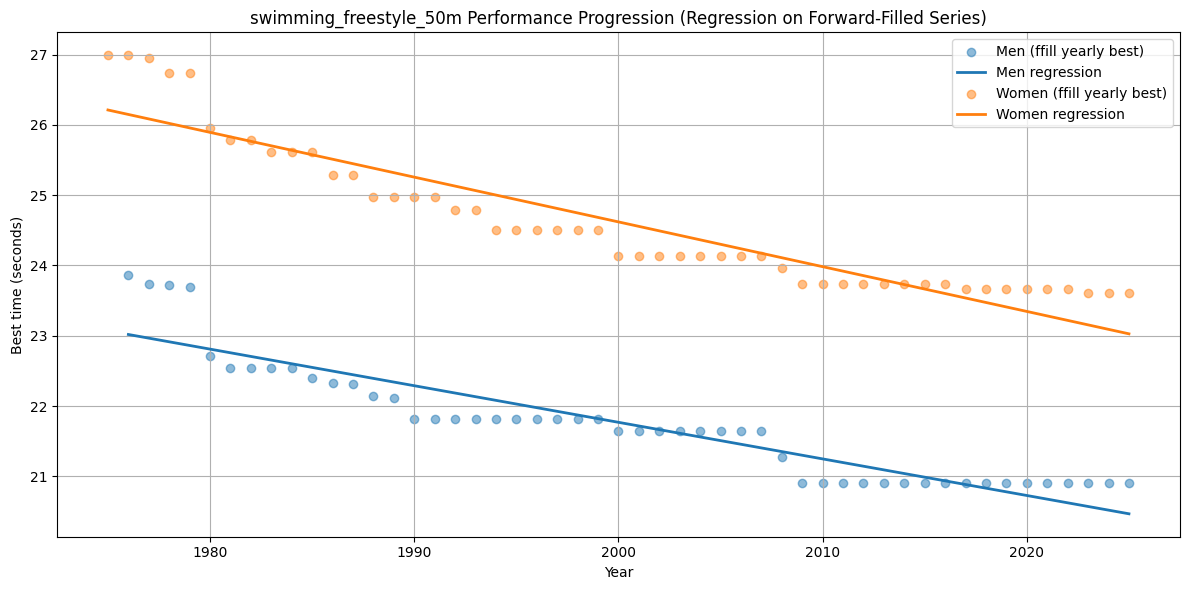


===== Event: swimming_freestyle_800m | Sexes: ['men', 'women'] =====


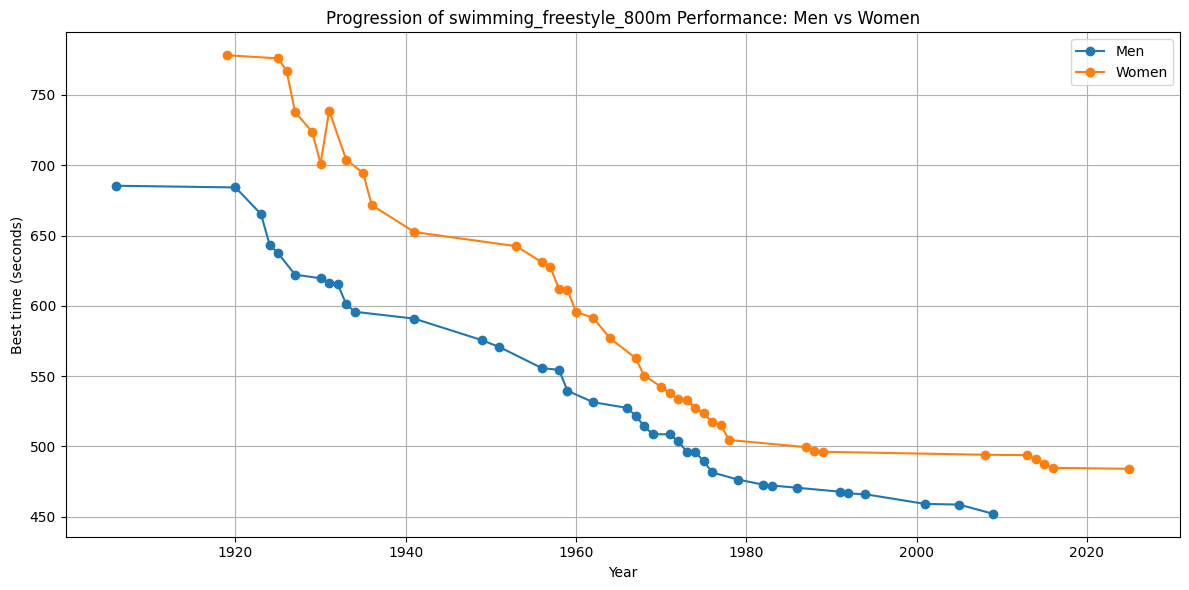

sex     men  women
year              
1906  685.4    NaN
1907  685.4    NaN
1908  685.4    NaN
1909  685.4    NaN
1910  685.4    NaN


Regression slopes on forward-filled series:
  Men regression slope: -2.29597 seconds/year
  Women regression slope: -2.92769 seconds/year


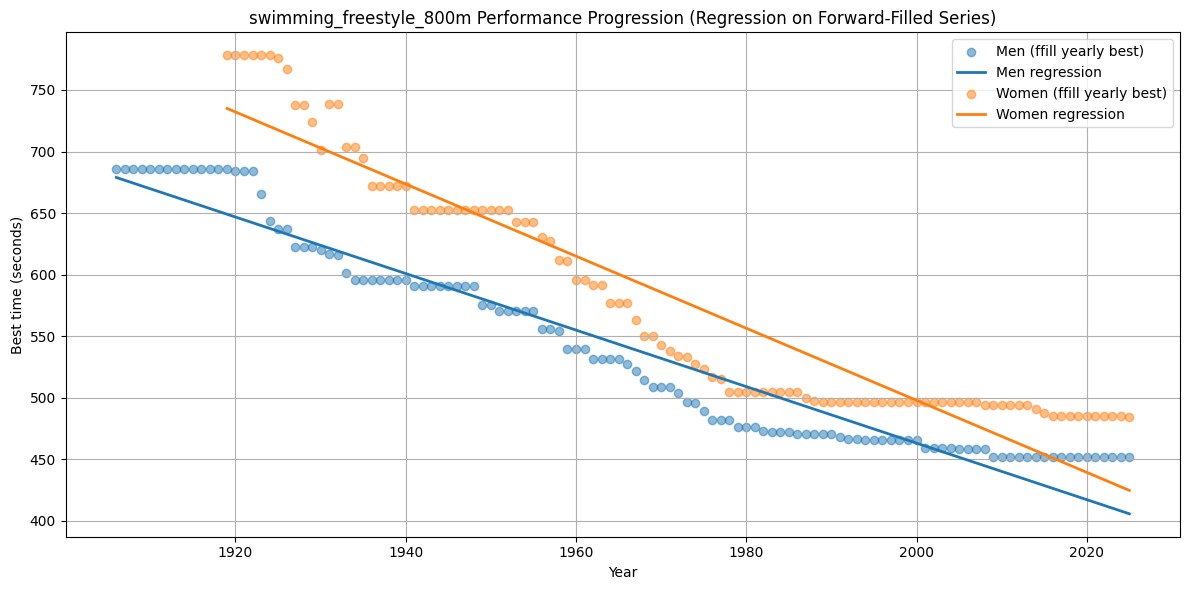


===== Event: swimming_freestyle_relay_4x100m | Sexes: ['men', 'women'] =====


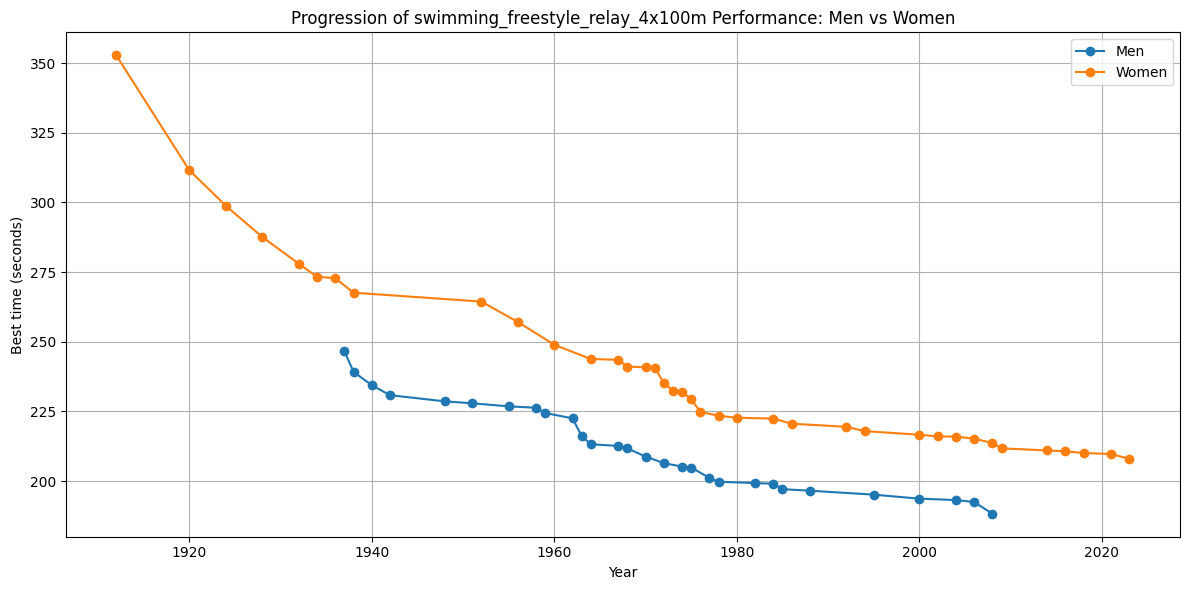

sex   men  women
year            
1912  NaN  352.8
1913  NaN  352.8
1914  NaN  352.8
1915  NaN  352.8
1916  NaN  352.8


Regression slopes on forward-filled series:
  Men regression slope: -0.62344 seconds/year
  Women regression slope: -1.12841 seconds/year


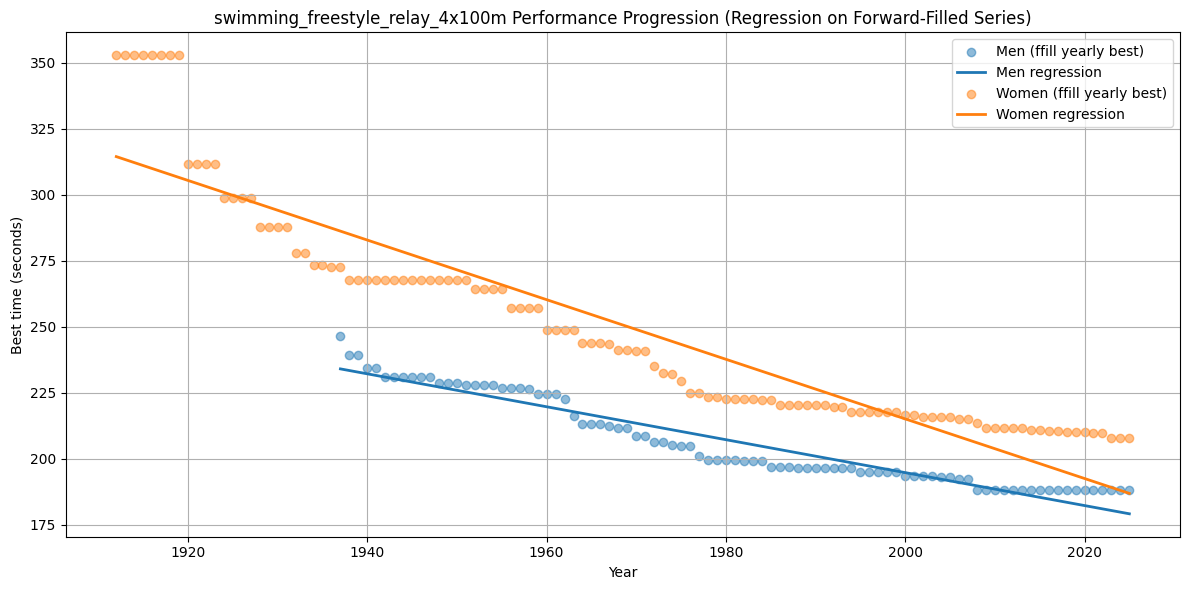


===== Event: swimming_freestyle_relay_4x200m | Sexes: ['men', 'women'] =====


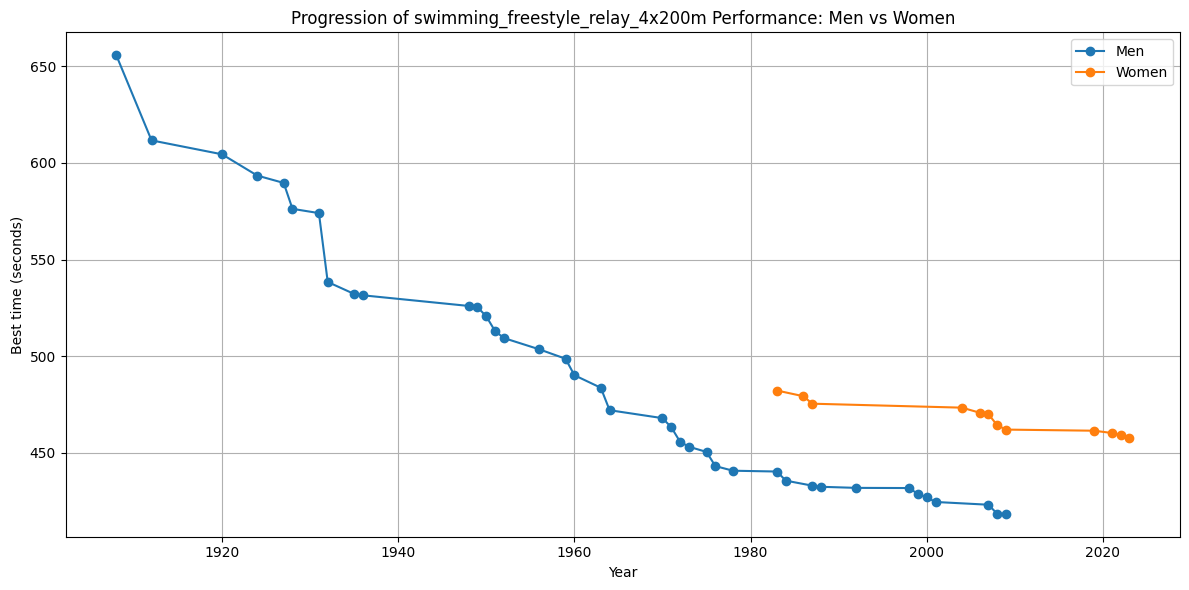

sex     men  women
year              
1908  655.6    NaN
1909  655.6    NaN
1910  655.6    NaN
1911  655.6    NaN
1912  611.6    NaN


Regression slopes on forward-filled series:
  Men regression slope: -1.99151 seconds/year
  Women regression slope: -0.58616 seconds/year


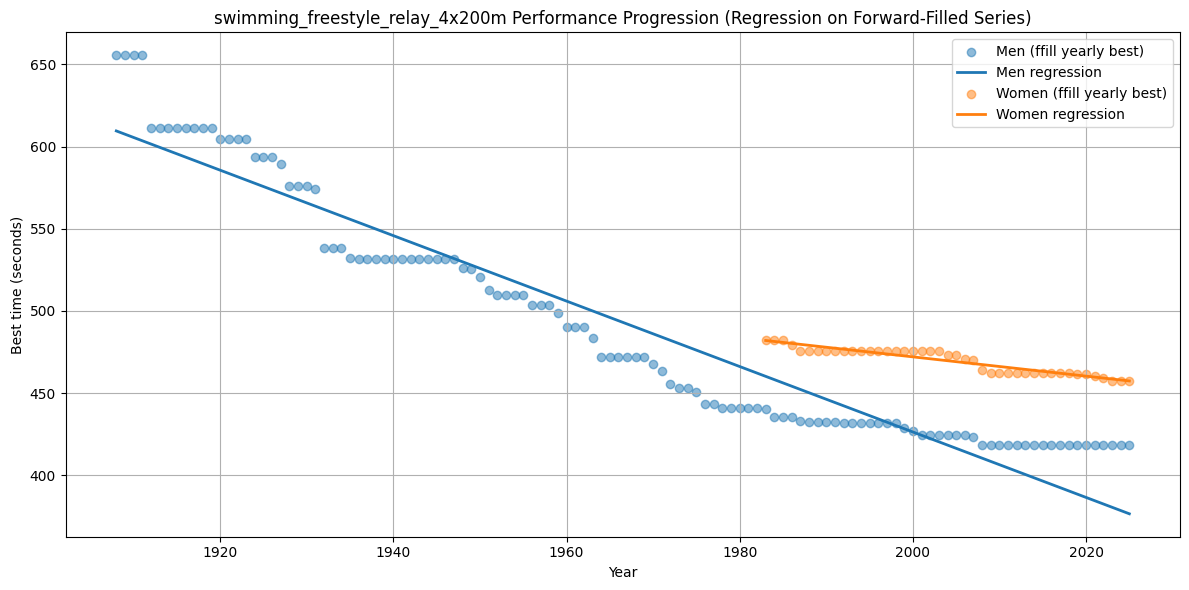


===== Event: swimming_medley_200m | Sexes: ['men', 'women'] =====


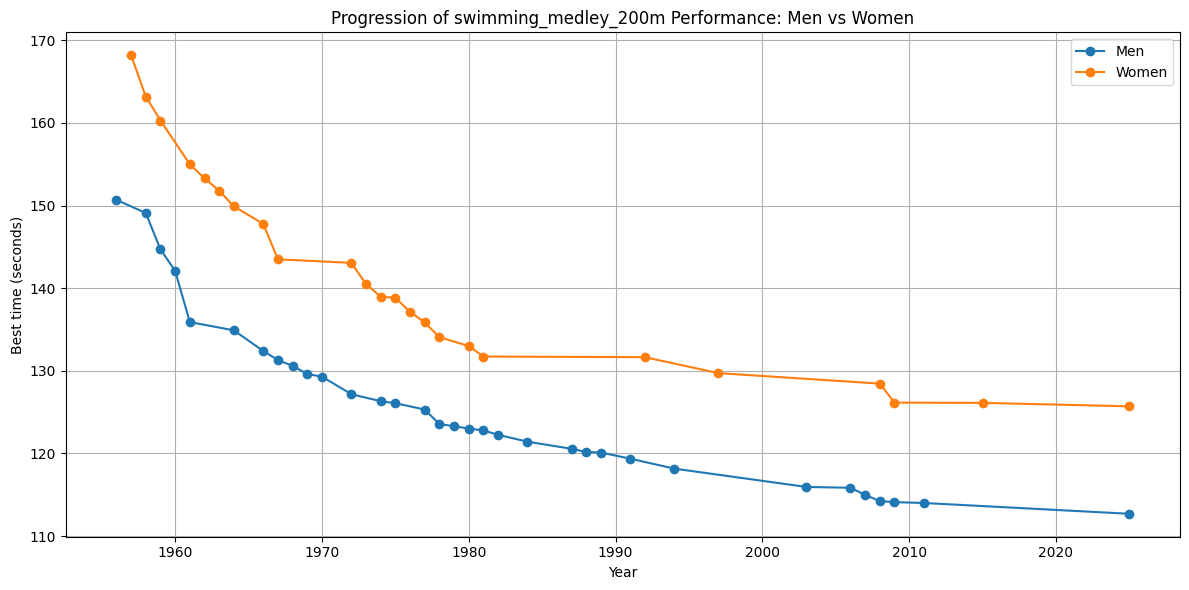

sex     men  women
year              
1956  150.7    NaN
1957  150.7  168.2
1958  149.1  163.2
1959  144.7  160.3
1960  142.1  160.3


Regression slopes on forward-filled series:
  Men regression slope: -0.42373 seconds/year
  Women regression slope: -0.44703 seconds/year


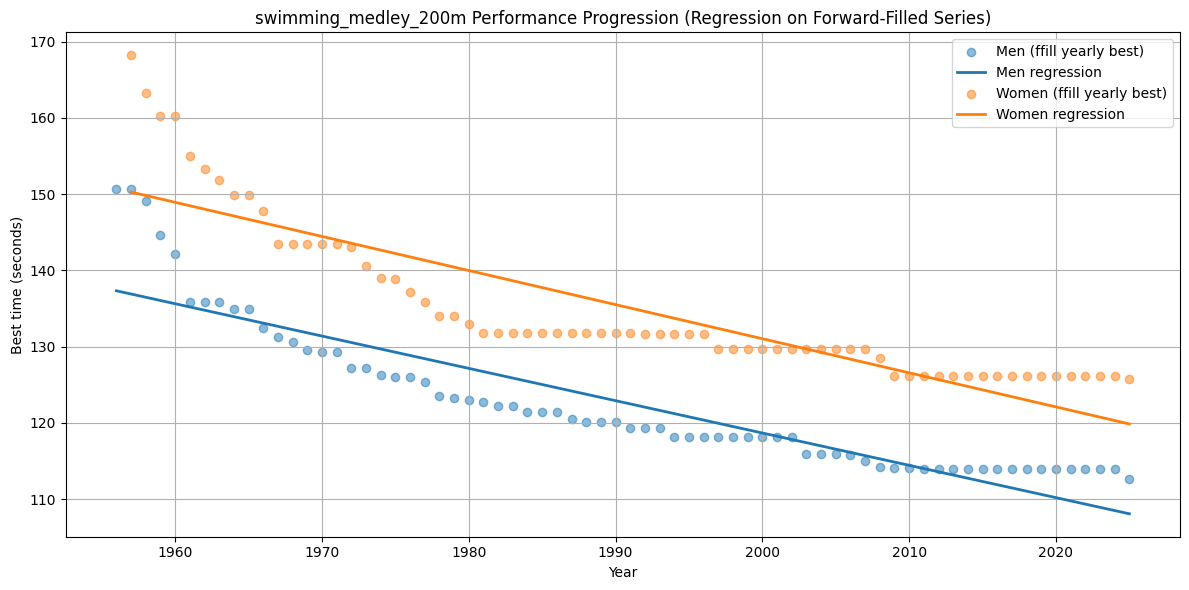


===== Event: swimming_medley_400m | Sexes: ['men', 'women'] =====


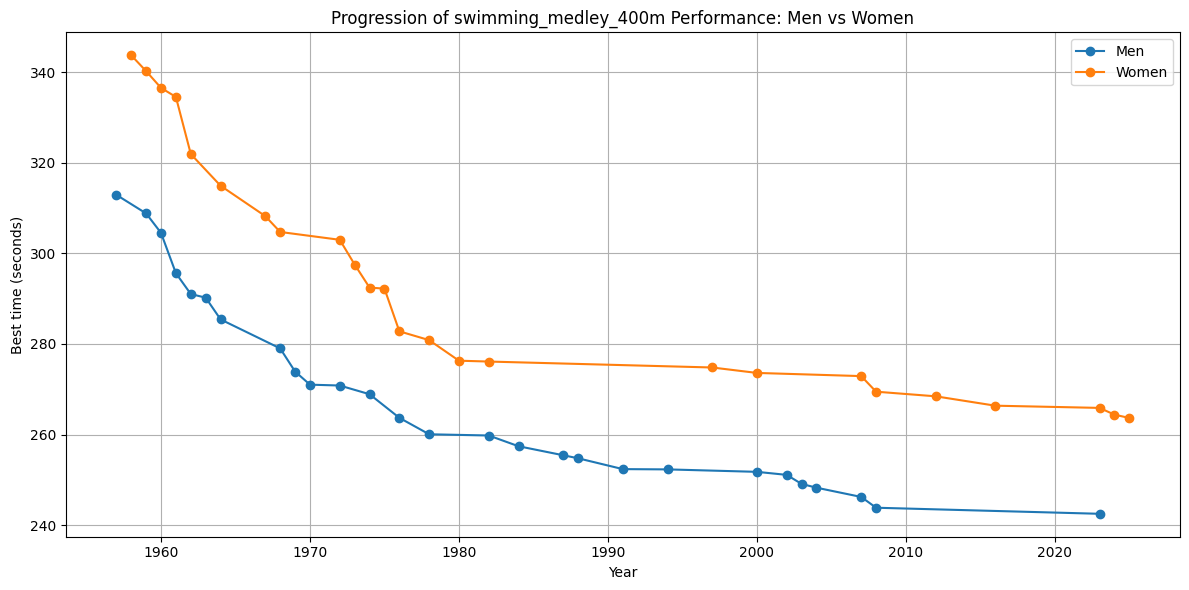

sex     men  women
year              
1957  312.9    NaN
1958  312.9  343.7
1959  308.8  340.2
1960  304.5  336.5
1961  295.6  334.5


Regression slopes on forward-filled series:
  Men regression slope: -0.82978 seconds/year
  Women regression slope: -0.88944 seconds/year


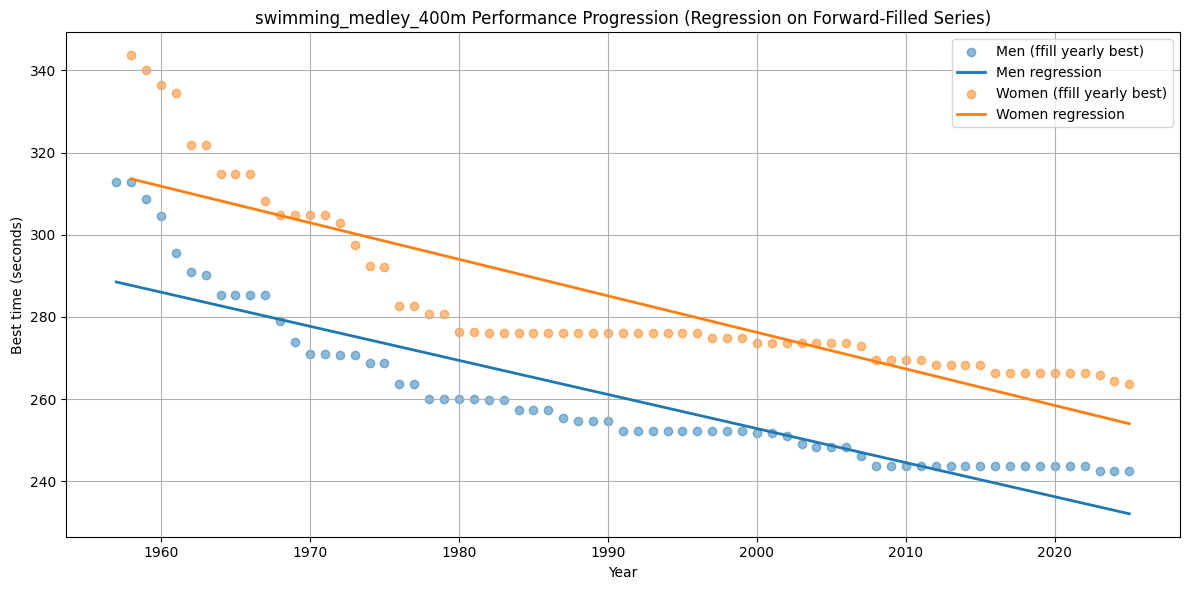


===== Event: swimming_medley_relay_4x100m | Sexes: ['men', 'women'] =====


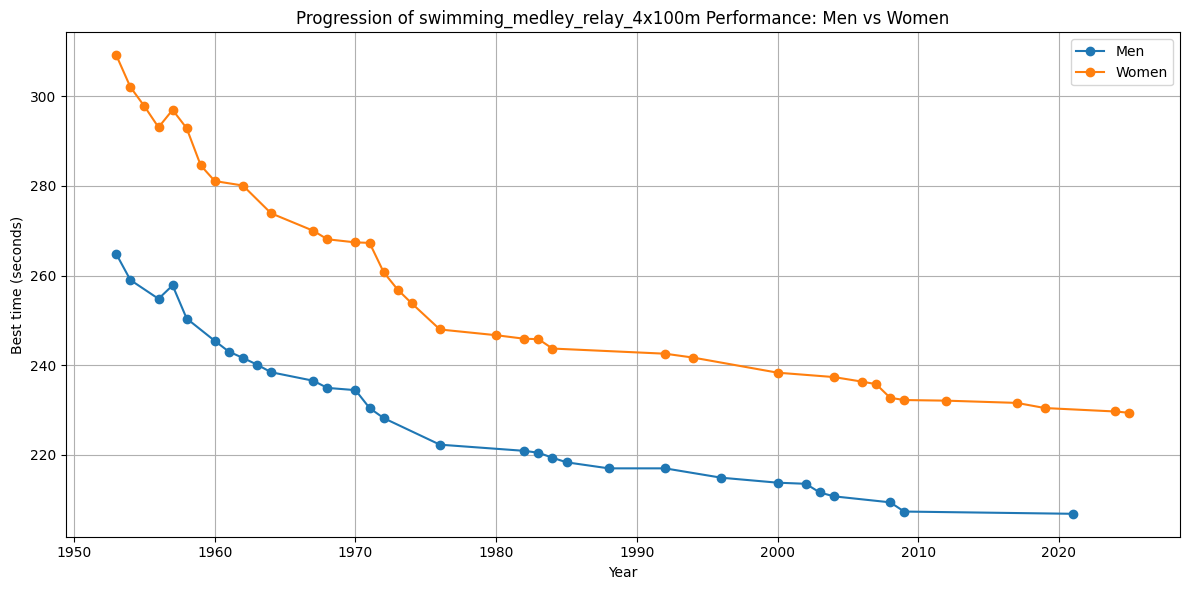

sex     men  women
year              
1953  264.8  309.2
1954  259.0  302.1
1955  259.0  297.8
1956  254.8  293.1
1957  257.8  297.0


Regression slopes on forward-filled series:
  Men regression slope: -0.67688 seconds/year
  Women regression slope: -0.89911 seconds/year


In [12]:
# Loop over all unique events and plot
events = sorted(df["event"].unique())
print("Events found:", events)

for ev in events:
    plot_event_progression(df, ev, end_year=2025)


### OLD CODE

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Project root = parent directory of notebooks/
PROJECT_ROOT = Path().resolve().parent

# Data directories
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

# Prepare data for plotting
df = pd.read_csv(DATA_PROCESSED / "100m_results_clean.csv", parse_dates=["date"])
df["time_seconds"] = pd.to_numeric(df["time_seconds"], errors="coerce")
df = df.dropna(subset=["time_seconds", "sex", "date"])

# Create a 'year' column
df["year"] = df["date"].dt.year


In [2]:
import matplotlib.pyplot as plt

# Compute yearly best time (minimum) for each sex
yearly_best = (
    df.groupby(["sex", "year"])["time_seconds"]
      .min()
      .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
for sex, group in yearly_best.groupby("sex"):
    plt.plot(group["year"], group["time_seconds"], marker="o", label=sex.capitalize())

plt.title("Progression of 100m Performance: Men vs Women")
plt.xlabel("Year")
plt.ylabel("Best time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 6))

for sex, group in yearly_best.groupby("sex"):
    group = group.sort_values("year")

    # Raw points
    plt.scatter(group["year"], group["time_seconds"], alpha=0.4, label=f"{sex.capitalize()} (raw)")

    # LOESS smoothing
    smoothed = lowess(
        endog=group["time_seconds"],
        exog=group["year"],
        frac=0.3  # smoothing parameter (0.2–0.4 usually looks good)
    )
    plt.plot(smoothed[:, 0], smoothed[:, 1], linewidth=2, label=f"{sex.capitalize()} (LOESS)")

plt.title("100m Performance Progression (LOESS smoothing)")
plt.xlabel("Year")
plt.ylabel("Best time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
### Build a continuous yearly series and forward-fill

# Determine the full range of years
start_year = int(yearly_best["year"].min())
end_year = 2025  # current year

years = pd.Index(range(start_year, end_year + 1), name="year")

# Pivot: year as index, one column per sex
pivot = (
    yearly_best
    .pivot(index="year", columns="sex", values="time_seconds")
    .reindex(years)          # ensure all years are present
    .sort_index()
)

# Forward-fill each sex separately: propagate last known record
pivot = pivot.ffill()

display(pivot)


sex     men  women
year              
1912  10.60    NaN
1913  10.60    NaN
1914  10.60    NaN
1915  10.60    NaN
1916  10.60    NaN
...     ...    ...
2021   9.58  10.54
2022   9.58  10.54
2023   9.58  10.54
2024   9.58  10.54
2025   9.58  10.54

[114 rows x 2 columns]